# Regression

This project is to practice various experiments with regression. The dataset we are using is taken from a real estate dataset:

https://www.kaggle.com/datasets/mirbektoktogaraev/madrid-real-estate-market

The objective of this project is to become familiar with the underlying techniques of machine learning, and implement some of the techniques yourself. 

You will write code and discussion texts into code and text cells in this notebook.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk

## Setup for the first part of the project

For problems P1 to P6 we are using a simple dataset where we extract one 
explanatory variable ``sq_mt_built`` to predict the price of the house ``buy_price``

The lenght 21742
The columns of the database Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',


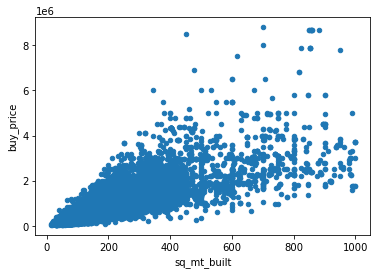

In [2]:
df = pd.read_csv("houses_Madrid.csv")
print(f"The lenght {len(df.index)}")
print(f"The columns of the database {df.columns}")
df[["sq_mt_built", "buy_price"]].plot.scatter(x="sq_mt_built", y="buy_price")
## FIXME: add here the creation of the training data and test data

df_shuffled = df.sample(frac=1) # shuffle the rows

In [3]:
x = df_shuffled["sq_mt_built"].to_numpy(dtype=np.float64)
y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)
training_data_x = x[:16000]
training_data_y = y[:16000]
test_data_x = x[16000:]
test_data_y = y[16000:]

In [4]:
# Showcase usage and shapes of training and test data.
print("Training data")
print("X")
print(training_data_x)
print(training_data_x.shape)
print("Y")
print(training_data_y)
print(training_data_y.shape)
print("\n")

print("Testing data")
print(test_data_x)
print("X")
print(test_data_x.shape)
print("Y")
print(test_data_y)
print(test_data_y.shape)

Training data
X
[ 86.  75. 117. ... 100.  90.  60.]
(16000,)
Y
[297000. 139000. 246506. ... 160000. 185000. 125000.]
(16000,)


Testing data
[ 77.  47.  67. ... 444. 161.  68.]
X
(5742,)
Y
[ 249900.  195000.  178000. ... 2950000.  565000.  485000.]
(5742,)


In [5]:
# Showcase of the masking feature for a numpy array.

# Make two arrays for testing here.
a = np.array([1, 2, float('nan')])
b = np.array([2, 3, 4])
mask = np.array([True, False, True])
print(a[mask])

# Print an array of NAN values with the negation for a.
print(~np.isnan(a))
print(a[~np.isnan(a)])
print(b[~np.isnan(a)])

[ 1. nan]
[ True  True False]
[1. 2.]
[2 3]


In [6]:
# Get rid of the NAN values for the training data by masking.
# If x value is NAN, remove that index entirely from both x and y data set.
masked_training_x = training_data_x[~np.isnan(training_data_x)]
masked_training_y = training_data_y[~np.isnan(training_data_x)]

# Reshape cleaned training data.
reshaped_training_x = masked_training_x.reshape(-1, 1)
reshaped_training_y = masked_training_y.reshape(-1, 1)

print("Training x")
print(reshaped_training_x)
print("Training x shape")
print(reshaped_training_x.shape)
print("\n")
print("Training y")
print(reshaped_training_y)
print("Training y shape")
print(reshaped_training_y.shape)
print("\n")

# Get rid of the NAN values for the testing data by masking.
# If x value is NAN, remove that index entirely from both x and y data set.
masked_test_x = test_data_x[~np.isnan(test_data_x)]
masked_test_y = test_data_y[~np.isnan(test_data_x)]

# Reshape cleaned testing data.
reshaped_test_x = masked_test_x.reshape(-1, 1)
reshaped_test_y = masked_test_y.reshape(-1, 1)

print("Test x")
print(reshaped_test_x)
print("Test x shape")
print(reshaped_test_x.shape)
print("\n")
print("Test y")
print(reshaped_test_y)
print("Test y shape")
print(reshaped_test_y.shape)
print("\n")

Training x
[[ 86.]
 [ 75.]
 [117.]
 ...
 [100.]
 [ 90.]
 [ 60.]]
Training x shape
(15907, 1)


Training y
[[297000.]
 [139000.]
 [246506.]
 ...
 [160000.]
 [185000.]
 [125000.]]
Training y shape
(15907, 1)


Test x
[[ 77.]
 [ 47.]
 [ 67.]
 ...
 [444.]
 [161.]
 [ 68.]]
Test x shape
(5709, 1)


Test y
[[ 249900.]
 [ 195000.]
 [ 178000.]
 ...
 [2950000.]
 [ 565000.]
 [ 485000.]]
Test y shape
(5709, 1)




## P1: Loss function (3 pts)
Implement a root-mean-square error (RMSE) loss function between the prediction $\hat{y}$ and $y$ value using Python operations. Run some experiments to validate that this works as expected. 
Then, look up the same in the sklearn library
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
and implement it based on what is there. 

In [7]:
# TODO: implement the loss function here using Python math ops and sklearn
def loss_RMSE(y, yhat):
    mse = np.sqrt(((yhat - y) ** 2).mean())
    return mse

def loss_RMSE_sk(y, yhat):
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y, yhat, squared=False)
    return mse

In [8]:
# TODO: Now, run some experiments with your function, with the one taken with sklearn 
# Compare their outputs.

import time
from sklearn import linear_model

# This is the model instance object.
regressor = linear_model.LinearRegression()

# Fit our independent values to dependent values.
# Take sq_mt and buy_price of house and produce a linear model y = mx + b
# that “predicts” the buy price, y, given sq_mt, x.
regressor.fit(reshaped_training_x, reshaped_training_y)

# The r squared is the percentage of data that fits according to the linear model.
# A higher percentage means that our model can use new x values and produce appropriate y values
# Based on the model that was created with accurate data.
# Score is calculated with 1 - (residual sum of squares / total sum of squares).
r_squared = regressor.score(reshaped_test_x, reshaped_test_y)
print("Percentage of test data that fits on model created by training data")
print(r_squared)
print("\n")

# The predict method maps the dependent values to a list of predicted independent values based on the
# scikit model instance that was produced by using the fit method.
y_buy_pred = regressor.predict(reshaped_test_x)
print("Buy price (y) predictions")
print(y_buy_pred)
print(y_buy_pred.shape)

# The percentage of x values that map properly to the y values.
# The score function is now using the new predicted y value.
score_with_new_y = regressor.score(reshaped_test_x, y_buy_pred)
print("Percentage of data that fits with the new y predictions and the test data")
print(score_with_new_y)
print("\n")

#################################################################################

print("My function result: ")

# Measure how long the training takes.
start = time.time()

print(loss_RMSE(reshaped_test_y, y_buy_pred))

# Finish timer.
end = time.time()
print("Time in seconds for loss_RMSE function: ")
print(end - start)
print("\n")

#################################################################################

print("Scikit-learn function result: ")

# Measure how long the training takes.
start = time.time()

print(loss_RMSE_sk(reshaped_test_y, y_buy_pred))

# Finish timer.
end = time.time()
print("Time in seconds for loss_RMSE_sk function: ")
print(end - start)
print("\n")

# There is no difference in output between my python math operations and scikit learn.
# The scikit learn loss function is faster than the math operation loss function.

Percentage of test data that fits on model created by training data
0.6780286408762803


Buy price (y) predictions
[[ 312631.26775402]
 [ 174433.16727895]
 [ 266565.23426233]
 ...
 [2003254.69689905]
 [ 699585.94908422]
 [ 271171.8376115 ]]
(5709, 1)
Percentage of data that fits with the new y predictions and the test data
1.0


My function result: 
412521.4078648169
Time in seconds for loss_RMSE function: 
0.0004031658172607422


Scikit-learn function result: 
412521.4078648169
Time in seconds for loss_RMSE_sk function: 
0.0014989376068115234




## P2: Implement a linear predictor (3 pts)
Implement a function of type ``predict(x, theta) --> y_hat`` which implements a linear model of the type $\hat{y} = \theta_1 \cdot x + \theta_0$

In [9]:
# TODO: implement the predictor function here
def predict(x, theta):
    # y = mx + b
    y_hat = theta[1] * x + theta[0]
    return y_hat

In [10]:
# TODO: now, run some experiments with it

from sklearn import linear_model

# This is the model instance object.
regressor = linear_model.LinearRegression()

# Fit our independent values to dependent values.
# Take sq_mt and buy_price of house and produce a linear model y = mx + b
# that “predicts” the buy price, y, given sq_mt, x.
regressor.fit(reshaped_training_x, reshaped_training_y)

print("Buy price (y) predictions")

# Test using the square meter of the test data and two random theta values to
# Predict the buy price of a house.
# y_pred is a prediction of the buy price of a house given the square footage.
theta = [-40000, 4000]
y_pred_1 = predict(reshaped_training_x, theta)
theta = [-40100, 4100]
y_pred_2 = predict(reshaped_training_x, theta)
theta = [-40150, 4200]
y_pred_3 = predict(reshaped_training_x, theta)
theta = [-40200, 4300]
y_pred_4 = predict(reshaped_training_x, theta)
theta = [-40225, 4400]
y_pred_5 = predict(reshaped_training_x, theta)
theta = [-40250, 4500]
y_pred_6 = predict(reshaped_training_x, theta)
theta = [-40300, 4600]
y_pred_7 = predict(reshaped_training_x, theta)
theta = [-40350, 4700]
y_pred_8 = predict(reshaped_training_x, theta)
theta = [-40400, 4800]
y_pred_9 = predict(reshaped_training_x, theta)

# Prints the actual slope and y-intercept coefficients for the linear regression.
print("Regressor slope for original linear regression function")
print(regressor.coef_)
print("Regressor y-intercept for original linear regression function")
print(regressor.intercept_)
print("\n")

# The r squared is the percentage of data that fits according to the linear model.
# A higher percentage means that our model can use new x values and produce appropriate y values
# Based on the model that was created with accurate data.
# Score is calculated with 1 - (residual sum of squares / total sum of squares).
# Print out the percentage of fit for each different theta set to see which is the highest score
# for the best slope and y that map the square footage to predict a buy price value.
r_squared_1 = regressor.score(reshaped_training_x, y_pred_1)
print("r_squared_1 ")
print(r_squared_1)

r_squared_2 = regressor.score(reshaped_training_x, y_pred_2)
print("r_squared_2 ")
print(r_squared_2)

r_squared_3 = regressor.score(reshaped_training_x, y_pred_3)
print("r_squared_3 ")
print(r_squared_3)

r_squared_4 = regressor.score(reshaped_training_x, y_pred_4)
print("r_squared_4 ")
print(r_squared_4)

r_squared_5 = regressor.score(reshaped_training_x, y_pred_5)
print("r_squared_5 ")
print(r_squared_5)

r_squared_6 = regressor.score(reshaped_training_x, y_pred_6)
print("r_squared_6 ")
print(r_squared_6)

r_squared_7 = regressor.score(reshaped_training_x, y_pred_7)
print("r_squared_7 ")
print(r_squared_7)

r_squared_8 = regressor.score(reshaped_training_x, y_pred_8)
print("r_squared_8 ")
print(r_squared_8)

r_squared_9 = regressor.score(reshaped_training_x, y_pred_9)
print("r_squared_9 ")
print(r_squared_9)

print(f'loss: {loss_RMSE_sk(reshaped_training_y, y_pred_7)}')

print("\nr_squared 7 with theta = [-40350, 4700] results in the least loss for the linear model.")

Buy price (y) predictions
Regressor slope for original linear regression function
[[4606.60334917]]
Regressor y-intercept for original linear regression function
[-42077.19013199]


r_squared_1 
0.9513319917670118
r_squared_2 
0.9678046090214435
r_squared_3 
0.9803575962631673
r_squared_4 
0.9894525277110017
r_squared_5 
0.9955206876593895
r_squared_6 
0.9989264707956697
r_squared_7 
0.9999962676402349
r_squared_8 
0.9990193631410038
r_squared_9 
0.9962461440609602
loss: 412257.2643115185

r_squared 7 with theta = [-40350, 4700] results in the least loss for the linear model.


## P3: Implement a "grid search" function (3 pts)
Implement a function grid_search() which returns an estimate of the best $\theta$ by trying out all the combinations of possibilities on a grid and returning the values that give you the most values. 
gridx and gridy define the range of numbers that we want to explore. For instance, grid0 might be [0, 0.25, 0.5, 0.75, 1.0] 

In [11]:
# mse = np.sqrt(((yhat - y) ** 2).mean()).
# Values can range from 0 (no loss) to infinity (terrible loss)
def loss(y, yhat):
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y, yhat, squared=False)
    return mse

In [12]:
# TODO: implement the grid search function here
def grid_search(training_data_x, training_data_y, grid0, grid1):
    
    # The theta value is the y-intercept and slope parameters that we're trying to predict.
    bestTheta = [0, 0]
    
    # Set an arbitrarily high loss which will gradually come down to a better loss.
    # Loss is the difference between the predicted output and the true output.
    # The lower the loss, the better because our model predicts appropriate output with input.
    bestLoss = 1000000000.0
    
    for i in grid0:
        for j in grid1:
            
            # Create a prediction using the training data.
            # Pass every combination of the given grid values to determine the best loss.
            # Predict = y_pred = j * x + i
            yhat = predict(training_data_x, [i, j])
            
            # Loss is the difference between the actual value and the predicted value.
            current_loss = loss(training_data_y, yhat)
            
            if (current_loss < bestLoss):
                
                # The current loss is better than the previous loss.
                bestLoss = current_loss
                
                # Keep track of which theta values cause this loss.
                bestTheta = [i, j]
            
    print(f'Final loss: {bestLoss}\n')
    
    return bestTheta

In [13]:
# TODO: run some experiments with grid_search
# Define some grid values. Train it on the data set. Test it on the test set. 
# Print the loss on the data set and the test set. Measure and print how long the training takes.

import time

grid0 = [0, 0.25, 0.5, 0.75, 0.85, 0.99]
grid1 = [0, 1, 10, 100, 1000, 10000]

#############################################################################
# TRAINING SET
#############################################################################

# Measure how long the training takes.
start = time.time()

# Get the optimal theta values using the predetermined grids.
theta = grid_search(reshaped_training_x, reshaped_training_y, grid0, grid1)

# Finish timer.
end = time.time()
print(f'Training time in seconds with grid_search(): {end - start}\n')

print("TRAINING SET")

# Holds slope value.
print(f'Predicted slope value retrieved from grid search {theta[0]}')

# Holds Y-intercept value.
print(f'Predicted y-intercept value retrieved from grid search {theta[1]}\n')


#############################################################################
# TEST SET
#############################################################################

# Measure how long the training takes.
start = time.time()

# Get the optimal theta values using the predetermined grids.
theta = grid_search(reshaped_test_x, reshaped_test_y, grid0, grid1)

# Finish timer.
end = time.time()
print(f'Training time in seconds with grid_search(): {end - start}\n')

print("TEST SET")

# Holds slope value.
print(f'Predicted slope value retrieved from grid search {theta[0]}')

# Holds Y-intercept value.
print(f'Predicted y-intercept value retrieved from grid search {theta[1]}\n')

Final loss: 804632.229918149

Training time in seconds with grid_search(): 0.01613593101501465

TRAINING SET
Predicted slope value retrieved from grid search 0.99
Predicted y-intercept value retrieved from grid search 1000

Final loss: 796536.2489523062

Training time in seconds with grid_search(): 0.01254415512084961

TEST SET
Predicted slope value retrieved from grid search 0.99
Predicted y-intercept value retrieved from grid search 1000



In [14]:
# TODO: repeat the experimentation from above with different grids. 
# Finally, print the grid that provides the best value while still running faster 
# than 10 seconds.

import time

grid0 = [0, 0.05, 0.1, 0.15, 0.25, 0.3, 0.35, 0.6, 0.7, 0.99]
grid1 = [1000, 4200, 4250, 4300, 4400, 4450, 4500, 4550, 4600, 7000]

#############################################################################
# TRAINING SET
#############################################################################

# Measure how long the training takes.
start = time.time()

# Get the optimal theta values using the predetermined grids.
theta = grid_search(reshaped_training_x, reshaped_training_y, grid0, grid1)

# Finish timer.
end = time.time()
print(f'Training time in seconds with grid_search(): {end - start}\n')

print("TRAINING SET")

# Holds slope value.
print(f'Predicted slope value retrieved from grid search {theta[0]}')

# Holds Y-intercept value.
print(f'Predicted y-intercept value retrieved from grid search {theta[1]}\n')


#############################################################################
# TEST SET
#############################################################################

# Measure how long the training takes.
start = time.time()

# Get the optimal theta values using the predetermined grids.
theta = grid_search(reshaped_test_x, reshaped_test_y, grid0, grid1)

# Finish timer.
end = time.time()
print(f'Training time in seconds with grid_search(): {end - start}\n')

print("TEST SET")

# Holds slope value.
print(f'Predicted slope value retrieved from grid search {theta[0]}')

# Holds Y-intercept value.
print(f'Predicted y-intercept value retrieved from grid search {theta[1]}\n')

print("The previous grid is 50% less accurate with a 4x efficiency gain")
print("The grid in this section is 50% more accurate with a 4x efficiency loss")

Final loss: 413244.0254487795

Training time in seconds with grid_search(): 0.05742692947387695

TRAINING SET
Predicted slope value retrieved from grid search 0
Predicted y-intercept value retrieved from grid search 4450

Final loss: 413254.7922680513

Training time in seconds with grid_search(): 0.061112165451049805

TEST SET
Predicted slope value retrieved from grid search 0
Predicted y-intercept value retrieved from grid search 4450

The previous grid is 50% less accurate with a 4x efficiency gain
The grid in this section is 50% more accurate with a 4x efficiency loss


## P4: Implement a random search function (3 pts)
Implement a function that returns the estimate for the best $\theta$ by trying out random 
$\theta=[\theta_0, \theta_1]$ values, and returning the one that minimizes the error on the training set passed to it. The number of tries is described in the ``trials`` parameter.

In [15]:
# TODO: implement the random search function here
def grid_search(training_data_x, training_data_y, trials):
    
    yint = 0.1
    
    # The theta value is the y-intercept and slope parameters that we're trying to predict.
    bestTheta = [0, 0]
    
    # Set an arbitrarily high loss which will gradually come down to a better loss.
    # Loss is the difference between the predicted output and the true output.
    # The lower the loss, the better because our model predicts appropriate output with input.
    bestLoss = 1000000000.0
    
    for i in range(trials):
        for j in range(trials):
            
            # Generate a random slope and y-intercept value.
            slope = random.randint(-1000000, 1000000)
            yint = random.randint(-1000000, 1000000)
            
            # Create a prediction using the training data.
            # Pass every combination of the given grid values to determine the best loss.
            yhat = predict(training_data_x, [slope, yint])
            
            # Loss is the difference between the actual value and the predicted value.
            current_loss = loss(training_data_y, yhat)
            
            if (current_loss < bestLoss):
                
                # The current loss is better than the previous loss.
                bestLoss = current_loss
                
                # Keep track of which theta values cause this loss.
                bestTheta = [slope, yint]
    
    return bestTheta

In [16]:
# TODO: run some experiments with random_search
# Choose some value for trial. Train it on the data set. Test it on the test set. 
# Print the loss on the data set and the test set. Measure and print how long the training takes.

import time
import random

trials = 6

# Measure how long the training takes.
start = time.time()

# Create an appropriate y-intercept and slope that accurately models training data.
theta = grid_search(reshaped_training_x, reshaped_training_y, trials)

# Finish timer.
end = time.time()
print("Time in seconds: ")
print(end - start)
print("\n")

# Holds slope value.
print("Predicted y-intercept value retrieved from grid search")
print(theta[0])

# Holds Y-intercept value.
print("Predicted slope value retrieved from grid search")
print(theta[1])
print("\n")

Time in seconds: 
0.015120983123779297


Predicted y-intercept value retrieved from grid search
990861
Predicted slope value retrieved from grid search
20958




# P5: Bonus: Improvements (3 pts)
Propose an improvement to the algorithms you have implemented for 4 and 5 and show that your improvements perform better than the original. Some examples of what you might try:
* Choose values for $\theta_0$ and $\theta_1$ on a non-uniform grid
* First find one of them, and fix it, and then refine on the other one
* For random: sample according to a non-uniform distribution
* First use a low resolution search to find the approximate values of  $\theta_0$ and $\theta_1$, then search for a more precise value

In [17]:
# TODO: implement your improvements here

# What's wrong with my function:
# grid_search only works efficiently for small trial numbers because the function is O(n^n) runtime.
# Furthermore, we are trying to randomly get a slope and a y-intercept value,
# which isn't effective as the coefficient of determination is terrible.
# In order to fix the function above we have to try doing a low resolution search
# first to see what approximates our model closer to a r_squared (variance) value of 1.
# This can be done by automating a grid that begins somewhere along -100000 and ends at 100000
# incrementally like [-100000, -10000, -1000, -100, -10, 0, 10, 100, 1000, 10000, 100000].
# This is done by pre-making a list before hand in the function or dividing by 10 from -100,000 until value is -1
# and multiplying by 10 until value reaches 100,000.
# We can keep track which value that is closest to a value of 1 for the coefficient of determination.
# And then just randomly keep trying slopes until we get a value which causes the coefficient of determination
# To yield a value close to 1.

# New grid_search
def grid_search(training_data_x, grid):
    
    # theta[0] = slope, theta[1] = y-intercept.
    theta = [0, 0]
    current_score = -sys.maxsize
    score = -sys.maxsize
    
    for i in range(len(y_intercept_grid)):
        for j in range(3):
            
            random_slope = random.random()
            y_pred = random_slope * training_data_x + y_intercept_grid[i]
            
            # Generate a score for the training data and prediction
            current_score = regressor.score(training_data_x, y_pred)
            
            if (current_score > score):
                
                # Update the score to the slope and y-int that generate lower r_squared.
                score = current_score
                
                # Collect optimal pair of slope and y-intercept for lowest variance in a linear model.
                theta = [random_slope, y_intercept_grid[i]]
                
                # Update the score to match the newest score.
                score = current_score
            
    return theta

In [18]:
import time
import sys
import random
from sklearn import linear_model

y_intercept_grid = [0, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000]

# Measure how long the training takes.
start = time.time()

# Create an appropriate y-intercept and slope that accurately models training data.
theta = grid_search(reshaped_training_x, y_intercept_grid)

# Finish timer.
end = time.time()
print("Time in seconds to find optimized y-intercept for grid_search: ")
print(end - start)
print("\n")

# theta[0] = y-intercept, theta[1] = slope.

# Holds slope value.
print("Predicted slope value retrieved from grid search")
print(theta[0])

# Holds Y-intercept value.
print("Predicted y-intercept value retrieved from grid search")
print(theta[1])
print("\n")

# Training data predictions
y_pred = theta[0] * reshaped_training_x + theta[1]

# Loss on data set.
r_squared = regressor.score(reshaped_training_x, y_pred)
print("Loss on data set ")
print(r_squared)

# Test data predictions.
y_pred = theta[0] * reshaped_test_x + theta[1]

# Loss on test set.
r_squared = regressor.score(reshaped_test_x, y_pred)
print("Loss on test set ")
print(r_squared)

# Now that we have the scores for the data and test set and the closest y-intercept value
# Producing a coefficient of determination of 1, we can try producing a more accurate slope
# Value by randomly attempting to get a more optimized slope for a linear model.

current_score = -sys.maxsize
score = -sys.maxsize

print("\nOptimizing the slope\n")

# Measure how long the training takes.
start = time.time()

# Optimize the slope.
for i in range(20):
    
    print("In slope optimizer")
    
    random_slope = random.random()
    y_pred = random_slope * reshaped_training_x + theta[1]        
    
    # Generate a score for the training data and prediction
    current_score = regressor.score(reshaped_training_x, y_pred)
            
    print("current score")
    print(current_score)
            
    if (current_score > score):
        
        # Update the score to the slope and y-int that generate lower r_squared.
        score = current_score
                
        # Collect optimal pair of slope and y-intercept for lowest variance in a linear model.
        theta = [random_slope, theta[1]]
                
        # Update the score to match the newest score.
        score = current_score
        print("updated score: ")
        print(score)
    print("\n")

# Finish timer.
end = time.time()
print("Time in seconds to find optimized y-intercept for grid_search: ")
print(end - start)
print("\n")

print("\n")

print("New slope value: ")
print(theta[0])

# Training data predictions
y_pred = theta[0] * reshaped_training_x + theta[1]

# Loss on data set.
r_squared = regressor.score(reshaped_training_x, y_pred)
print("R_squared on data set ")
print(r_squared)
print(f'loss: {loss_RMSE_sk(reshaped_training_y, y_pred)}')

# Test data predictions.
y_pred = theta[0] * reshaped_test_x + theta[1]

# Loss on test set.
r_squared = regressor.score(reshaped_test_x, y_pred)
print("R_squared on test set ")
print(r_squared)
print(f'loss: {loss_RMSE_sk(reshaped_test_y, y_pred)}')


print(f'Our optimal theta values are {theta[0]} and {theta[1]}')

Time in seconds to find optimized y-intercept for grid_search: 
0.04534506797790527


Predicted slope value retrieved from grid search
0.8343942177572861
Predicted y-intercept value retrieved from grid search
1000000


Loss on data set 
-40890554.96901307
Loss on test set 
-41824054.1217488

Optimizing the slope

In slope optimizer
current score
-67317017.655168
updated score: 
-67317017.655168


In slope optimizer
current score
-55213368.26592848
updated score: 
-55213368.26592848


In slope optimizer
current score
-427981605.7641926


In slope optimizer
current score
-35979508.58083916
updated score: 
-35979508.58083916


In slope optimizer
current score
-227367661.4842323


In slope optimizer
current score
-151438475.4288522


In slope optimizer
current score
-28841233.390269
updated score: 
-28841233.390269


In slope optimizer
current score
-1632212937.22593


In slope optimizer
current score
-77723690.5898612


In slope optimizer
current score
-103888453.86773892


In slope optim

TODO: Describe in one paragraph the conclusions you have drawn from your improvement experiments

## Conclusions

The final loss for the previous grid search function was:
``` 
Final loss: 13969435.698863477

Time in seconds: 
0.054121971130371094
```
While the final loss and time finished for this improved grid search function was:
```
Final loss: 994322.3678164484

Time in seconds:


## P6: Using the sklearn library (3 pts)

Use ``sklearn.linear_model.LinearRegression`` to solve the same problem you previously solved using the grid search and random search.

Compare the returned values with what you have achieved. Compare the parameters that had been found to the parameters you have found. Compare the speed. 

In [19]:
# This is the same grid_search function used in P4 for random search.
def grid_search(training_data_x, training_data_y, trials):
    
    yint = 0.1
    
    # The theta value is the y-intercept and slope parameters that we're trying to predict.
    bestTheta = [0, 0]
    
    # Set an arbitrarily high loss which will gradually come down to a better loss.
    # Loss is the difference between the predicted output and the true output.
    # The lower the loss, the better because our model predicts appropriate output with input.
    bestLoss = 1000000000.0
    
    for i in range(trials):
        for j in range(trials):
            
            # Generate a random slope and y-intercept value.
            slope = random.randint(-1000000, 1000000)
            yint = random.randint(-1000000, 1000000)
            
            # Create a prediction using the training data.
            # Pass every combination of the given grid values to determine the best loss.
            yhat = predict(training_data_x, [slope, yint])
            
            # Loss is the difference between the actual value and the predicted value.
            current_loss = loss(training_data_y, yhat)
            
            if (current_loss < bestLoss):
                
                # The current loss is better than the previous loss.
                bestLoss = current_loss
                
                # Keep track of which theta values cause this loss.
                bestTheta = [slope, yint]
    
    return bestTheta

In [20]:
# TODO: Implement here

# Using sklearn for grid search or random search
# Compare returned parameters with the returned parameters from my function
# Compare parameters scikit learn used vs the parameters I found

from sklearn.linear_model import LinearRegression

start = time.time()
reg = LinearRegression().fit(reshaped_training_x, reshaped_training_y)
end = time.time()

y_pred = reg.predict(reshaped_training_x)

print("Using scikit learn to find theta:\n==============================")
print(f'slope {reg.coef_}')
print(f'yint {reg.intercept_}')
print("Parameters used: training_x, training_y")
print(f'loss: {loss(reshaped_training_y, y_pred)}')
print(f'Training time in seconds with scikit learn\'s .fit(): {end - start}\n')

# Use my functions and compare parameters and return values to scikit learn.

start = time.time()
theta = grid_search(reshaped_training_x, reshaped_training_y, trials=4)
end = time.time()

y_pred = theta[1] * reshaped_training_x + theta[0]

print("Using grid_search to find theta:\n==============================")
print(f'slope theta[0]: {theta[0]}')
print(f'yint theta[1]: {theta[1]}')
print("Parameters used: training_x, training_y, trials")
print(f'loss: {loss(reshaped_training_y, y_pred)}')
print(f'Training time in seconds with grid_search(): {end - start}\n')


Using scikit learn to find theta:
slope [[4606.60334917]]
yint [-42077.19013199]
Parameters used: training_x, training_y
loss: 412255.49884247466
Training time in seconds with scikit learn's .fit(): 0.00427699089050293

Using grid_search to find theta:
slope theta[0]: 691433
yint theta[1]: 43093
Parameters used: training_x, training_y, trials
loss: 8261064.804854774
Training time in seconds with grid_search(): 0.0143280029296875



In [21]:
# TODO: Run performance experiments here.

from sklearn.linear_model import LinearRegression

start = time.time()
reg = LinearRegression().fit(reshaped_test_x, reshaped_test_y)
end = time.time()

y_pred = reg.predict(reshaped_test_x)

print("Using scikit learn to find theta:\n==============================")
print(f'slope {reg.coef_}')
print(f'yint {reg.intercept_}')
print("Parameters used: training_x, training_y")
print(f'loss: {loss(reshaped_test_y, y_pred)}')
print(f'Training time in seconds with scikit learn\'s .fit(): {end - start}\n')

# Use my functions and compare parameters and return values to scikit learn.

start = time.time()
theta = grid_search(reshaped_test_x, reshaped_test_y, trials=4)
end = time.time()

y_pred = theta[1] * reshaped_test_x + theta[0]

print("Using grid_search to find theta:\n==============================")
print(f'slope theta[0]: {theta[0]}')
print(f'yint theta[1]: {theta[1]}')
print("Parameters used: training_x, training_y, trials")
print(f'loss: {loss(reshaped_test_y, y_pred)}')
print(f'Training time in seconds with grid_search(): {end - start}\n')



Using scikit learn to find theta:
slope [[4617.0349588]]
yint [-37724.19934886]
Parameters used: training_x, training_y
loss: 412477.1751644335
Training time in seconds with scikit learn's .fit(): 0.0016219615936279297

Using grid_search to find theta:
slope theta[0]: -687721
yint theta[1]: -43011
Parameters used: training_x, training_y, trials
loss: 9845005.716763126
Training time in seconds with grid_search(): 0.005524158477783203



## Performance of sklearn versus self implementation of grid search

Overall, scikit learn is 3x more efficient than my function with a roughly ~10-35x loss improvement. 

# Setup for the second part of the project
For the questions P7-P10 we use linear regression on a multivariate setting. This time, there are 7 explanatory variables: ``sq_mt_built``, ``n_rooms``, ``n_bathrooms``, ``is_renewal_needed``, ``is_new_development`` and ``has_fitted_wardrobes``. 

We will first create the training and test data while doing some minimal data cleaning.

In [22]:
# replacing the NA values with some sensible defaults
# the way I was investigating these is by printing
# print(df["has_individual_heating"].value_counts(dropna=False))

df_shuffled["has_individual_heating"] = df_shuffled["has_individual_heating"].fillna(False)
df_shuffled["n_bathrooms"] = df_shuffled["n_bathrooms"].fillna(1)
df_shuffled["has_individual_heating"] = df_shuffled["has_individual_heating"].fillna(False)
df_shuffled["is_new_development"] = df_shuffled["is_new_development"].fillna(False)
df_shuffled["has_fitted_wardrobes"] = df_shuffled["has_fitted_wardrobes"].fillna(False)

xfields = ["sq_mt_built", "n_rooms", "n_bathrooms", "has_individual_heating", \
           "is_renewal_needed", "is_new_development", "has_fitted_wardrobes"]

x = df_shuffled[xfields].to_numpy(dtype=np.float64)
y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)

print(f'X:\n{x}')
print(f'X shape:\n{x.shape}')
print(f'Y:\n{y}')
print(f'Y shape:\n{y.shape}\n')

training_data_x = x[:16000]
training_data_y = y[:16000]

print(f'training_data_x:\n{training_data_x}')
print(f'training_data_x shape:\n{training_data_x.shape}')
print(f'training_data_y:\n{training_data_y}')
print(f'training_data_y shape:\n{training_data_y.shape}\n')

test_data_x = x[16000:]
test_data_y = y[16000:]

print(f'test_data_x:\n{test_data_x}')
print(f'test_data_x shape:\n{test_data_x.shape}')
print(f'test_data_y:\n{test_data_y}')
print(f'test_data_y shape:\n{test_data_y.shape}\n')

X:
[[ 86.   2.   2. ...   0.   0.   1.]
 [ 75.   2.   1. ...   1.   0.   1.]
 [117.   3.   2. ...   0.   1.   0.]
 ...
 [444.   5.   4. ...   0.   0.   1.]
 [161.   4.   2. ...   0.   0.   1.]
 [ 68.   1.   1. ...   0.   0.   1.]]
X shape:
(21742, 7)
Y:
[ 297000.  139000.  246506. ... 2950000.  565000.  485000.]
Y shape:
(21742,)

training_data_x:
[[ 86.   2.   2. ...   0.   0.   1.]
 [ 75.   2.   1. ...   1.   0.   1.]
 [117.   3.   2. ...   0.   1.   0.]
 ...
 [100.   3.   1. ...   0.   0.   1.]
 [ 90.   3.   1. ...   0.   0.   0.]
 [ 60.   3.   2. ...   0.   0.   0.]]
training_data_x shape:
(16000, 7)
training_data_y:
[297000. 139000. 246506. ... 160000. 185000. 125000.]
training_data_y shape:
(16000,)

test_data_x:
[[ 77.   2.   1. ...   1.   0.   0.]
 [ 47.   0.   1. ...   0.   0.   0.]
 [ 67.   2.   1. ...   0.   0.   1.]
 ...
 [444.   5.   4. ...   0.   0.   1.]
 [161.   4.   2. ...   0.   0.   1.]
 [ 68.   1.   1. ...   0.   0.   1.]]
test_data_x shape:
(5742, 7)
test_data_y:
[

## Cleaning and displaying training data
Using masking to get rid of invalid indeces from feature columns and corresponding y index.

In [23]:
print("Training_data_x")
print(training_data_x)
print("\n")

print("Printing column 0 with training_data_x[:,0]")
print(training_data_x[:,0])
print("\n")

print("Printing column 1 with training_data_x[:,1]")
print(training_data_x[:,1])
print("\n")

print("Printing column 2 with training_data_x[:,2]")
print(training_data_x[:,2])
print("\n")

print("~np.isnan(training_data_x)")
print(~np.isnan(training_data_x))
print("\n")

masked = training_data_x[~np.isnan(training_data_x)]
print("training_data_x[~np.isnan(training_data_x)]")
print(masked)
print("\n")

masked_training_data_x = training_data_x[~np.isnan(training_data_x[:,0])]
print("training_data_x[~np.isnan(training_data_x[:,0])]")
print(masked_training_data_x)
print("\n")

masked_training_data_y = training_data_y[~np.isnan(training_data_x[:,0])]
print("training_data_y[~np.isnan(training_data_x[:,0])]")
print(masked_training_data_y)
print("\n")

masked_test_data_x = test_data_x[~np.isnan(test_data_x[:,0])]
print("masked_test_data_x = test_data_x[~np.isnan(test_data_x[:,0])]")
print(masked_test_data_x)
print("\n")

masked_test_data_y = test_data_y[~np.isnan(test_data_x[:,0])]
print("masked_test_data_y = test_data_y[~np.isnan(test_data_x[:,0])]")
print(masked_test_data_y)
print("\n")

print("training_data_x.shape")
print(training_data_x.shape)
print("\n")

print("training_data_y.shape")
print(training_data_y.shape)
print("\n")

print("masked_training_data_x.shape")
print(masked_training_data_x.shape)
print("\n")

print("masked_training_data_y.shape")
print(masked_training_data_y.shape)
print("\n")

print("masked_test_data_x.shape")
print(masked_test_data_x.shape)
print("\n")

print("masked_test_data_y.shape")
print(masked_test_data_y.shape)
print("\n")

print("training_data_x")
print(training_data_x)
print("\n")

Training_data_x
[[ 86.   2.   2. ...   0.   0.   1.]
 [ 75.   2.   1. ...   1.   0.   1.]
 [117.   3.   2. ...   0.   1.   0.]
 ...
 [100.   3.   1. ...   0.   0.   1.]
 [ 90.   3.   1. ...   0.   0.   0.]
 [ 60.   3.   2. ...   0.   0.   0.]]


Printing column 0 with training_data_x[:,0]
[ 86.  75. 117. ... 100.  90.  60.]


Printing column 1 with training_data_x[:,1]
[2. 2. 3. ... 3. 3. 3.]


Printing column 2 with training_data_x[:,2]
[2. 1. 2. ... 1. 1. 2.]


~np.isnan(training_data_x)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


training_data_x[~np.isnan(training_data_x)]
[86.  2.  2. ...  0.  0.  0.]


training_data_x[~np.isnan(training_data_x[:,0])]
[[ 86.   2.   2. ...   0.   0.   1.]
 [ 75.   2.   1. ...   1.   0.   1.]
 [117.   3.   2. ...   0.   1.   0.]
 ..

## P7: Implement grid search for multiple variables (3 pts)
Implement the linear predictor model for multiple variables. Note that this time ``x`` will be an array of 7 values, and ``theta`` will be an array of 8 values. 

Then, implement a grid search function (similar to P3) but this time for the 7 explanatory variables. Pass the grids as an array into the grid variable. 

## Implementing grids

In [24]:
# Retrieve the predictions and loss for a given data set.
def calculate_loss_yhat(training_data_x, training_data_y, theta):
    # Generate the prediction using y = mx + b for multiple regressions.
    yhat = predict_multi(training_data_x, theta)
    
    # Generate the loss for the training data.
    loss = loss_RMSE_sk(training_data_y, yhat)
    return yhat, loss

# Retrieve the prediction for a data set.
def predict_multi(x, theta):
    # Theta is a list of 7 slopes + 1 yint, x is a 2D array containing the columns of each feature.
    # Theta 0-6 contains the slope of each respective linear regression.
    # Theta 7 contains the sum of all the y-intercept coefficients.
    # x contains an array of 7 independent variables.
    # A formula for a single value looks like this:
    # buy_price = (slope=38)(sq_mt=386) + (y-int=-149)
    # However all 7 independent variables will be used to predict the value of a home
    # with more accuracy.
    
    # y_hat = (theta[0] * x[0]) + (theta[1] * x[1]) + (theta[2] * x[2]) + (theta[3] * x[3]) + \
    # (theta[4] * x[4]) + (theta[5] * x[5]) + (theta[6] * x[6]) + theta[7]
    
    # y-intercept
    y_hat = theta[0]
    
    # returns a list of the slopes from 1-7 in the theta array.
    theta_slopes = theta[1:]

    # Iterate through the last 7 values which are slopes.
    for i in range(len(theta_slopes)):
        # Add the y-intercept to the product of the feature and slope array, for every feature.
        y_hat = y_hat + np.multiply(x[:, i], theta_slopes[i])
    
    return y_hat

# Search for the optimized training value.
def grid_search(training_data_x, training_data_y, grids):
    num_columns = len(grids)
    bestTheta = np.zeros(num_columns)
    
    # A terrible loss is set by default.
    bestLoss = 100000000

    testGrid = np.array(np.meshgrid(*grids)).T.reshape(-1, num_columns)

    print(f'testGrid: {testGrid}\n')

    # Sends every grid permutation to be tested with training data.
    for i in testGrid:
        
        # Retrieve the loss and prediction of training data.
        yhat, loss = calculate_loss_yhat(training_data_x, training_data_y, i)
        
        # Keep track of the best loss.
        if bestLoss > loss:
            bestLoss = loss
            bestTheta = i

    return bestTheta

In [25]:
# Creating some test grids for to test on linear regression.
grid1 = np.array([[0, 200], [0, 200], [0, 200], [0, 200], [0, 200], [0, 200], [0, 200], [0, 200]], dtype='float32')
grid2 = np.array([[0, 200, 400], [0, 200, 400], [0, 200, 400], [0, 200, 400], [0, 200, 400], [0, 200, 400], [0, 200, 400], [0, 200, 400]], dtype='float32')
grid3 = np.array([[0, 100, 600, 800], [0, 100, 600, 800], [0, 100, 600, 800], [0, 100, 600, 800], [0, 100, 600, 800], [0, 100, 600, 800], [0, 100, 600, 800], [0, 100, 600, 800]], dtype='float32')

print(f'grid1:\n{grid1}')
print(f'grid2:\n{grid2}')
print(f'grid3:\n{grid3}')

grid1:
[[  0. 200.]
 [  0. 200.]
 [  0. 200.]
 [  0. 200.]
 [  0. 200.]
 [  0. 200.]
 [  0. 200.]
 [  0. 200.]]
grid2:
[[  0. 200. 400.]
 [  0. 200. 400.]
 [  0. 200. 400.]
 [  0. 200. 400.]
 [  0. 200. 400.]
 [  0. 200. 400.]
 [  0. 200. 400.]
 [  0. 200. 400.]]
grid3:
[[  0. 100. 600. 800.]
 [  0. 100. 600. 800.]
 [  0. 100. 600. 800.]
 [  0. 100. 600. 800.]
 [  0. 100. 600. 800.]
 [  0. 100. 600. 800.]
 [  0. 100. 600. 800.]
 [  0. 100. 600. 800.]]


## Experiments on multi-linear regression grid search

In [26]:
######################################################################
# Using grid1
######################################################################

start = time.time()
theta = grid_search(masked_training_data_x, masked_training_data_y, grid1)
end = time.time()

train_yhat, train_loss = calculate_loss_yhat(masked_training_data_x, masked_training_data_y, theta)
test_yhat, test_loss = calculate_loss_yhat(masked_test_data_x, masked_test_data_y, theta)

print(f'Training Time:  {end - start} seconds')
print(f'theta:          {theta}')
print(f'Training loss:  {train_loss}')
print(f'Testing loss:   {test_loss}')
print(f'train_yhat:     {train_yhat}')
print(f'test_yhat:      {test_yhat}\n\n')

######################################################################
# Using grid2
######################################################################

start = time.time()
theta = grid_search(masked_training_data_x, masked_training_data_y, grid2)
end = time.time()

train_yhat, train_loss = calculate_loss_yhat(masked_training_data_x, masked_training_data_y, theta)
test_yhat, test_loss = calculate_loss_yhat(masked_test_data_x, masked_test_data_y, theta)

print(f'Training Time:  {end - start} seconds')
print(f'theta:          {theta}')
print(f'Training loss:  {train_loss}')
print(f'Testing loss:   {test_loss}')
print(f'train_yhat:     {train_yhat}')
print(f'test_yhat:      {test_yhat}\n\n')

######################################################################
# Using grid3
######################################################################

start = time.time()
theta = grid_search(masked_training_data_x, masked_training_data_y, grid3)
end = time.time()

train_yhat, train_loss = calculate_loss_yhat(masked_training_data_x, masked_training_data_y, theta)
test_yhat, test_loss = calculate_loss_yhat(masked_test_data_x, masked_test_data_y, theta)

print(f'Training Time:  {end - start} seconds')
print(f'theta:          {theta}')
print(f'Training loss:  {train_loss}')
print(f'Testing loss:   {test_loss}\n\n')
print(f'train_yhat:     {train_yhat}')
print(f'test_yhat:      {test_yhat}')

testGrid: [[  0.   0.   0. ...   0.   0.   0.]
 [  0. 200.   0. ...   0.   0.   0.]
 [200.   0.   0. ...   0.   0.   0.]
 ...
 [  0. 200. 200. ... 200. 200. 200.]
 [200.   0. 200. ... 200. 200. 200.]
 [200. 200. 200. ... 200. 200. 200.]]

Training Time:  0.4636993408203125 seconds
theta:          [200. 200. 200. 200. 200. 200. 200. 200.]
Training loss:  944266.181653567
Testing loss:   932965.4794901023
train_yhat:     [18600. 16400. 24800. ... 21200. 19000. 13200.]
test_yhat:      [16400.  9800. 14400. ... 91000. 33800. 14600.]


testGrid: [[  0.   0.   0. ...   0.   0.   0.]
 [  0. 200.   0. ...   0.   0.   0.]
 [  0. 400.   0. ...   0.   0.   0.]
 ...
 [400.   0. 400. ... 400. 400. 400.]
 [400. 200. 400. ... 400. 400. 400.]
 [400. 400. 400. ... 400. 400. 400.]]

Training Time:  4.282374858856201 seconds
theta:          [400. 400. 400. 400. 400. 400. 400. 400.]
Training loss:  907255.9164801802
Testing loss:   896752.9959839559
train_yhat:     [37200. 32800. 49600. ... 42400. 38000. 

## Alternate version with improved theta search

In [27]:
# mse = np.sqrt(((yhat - y) ** 2).mean()).
# Values can range from 0 (no loss) to infinity (a lot of loss)
def loss(y, yhat):
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y, yhat, squared=False)
    return mse

In [28]:
def predict(x, theta):
    y_hat = theta[0] * x + theta[1]
    return y_hat

In [29]:
# TODO: implement the grid search function here
def grid_search(training_data_x, training_data_y, grids):
    
    # The theta value is the y-intercept and slope parameters that we're trying to predict.
    bestTheta = [0, 0]
    
    # Set an arbitrarily high loss which will gradually come down to a better loss.
    # Loss is the difference between the predicted output and the true output.
    # The lower the loss, the better because our model predicts appropriate output with input.
    bestLoss = 1000000000.0
    
    # 7 row 2 column matrix - each row contains (slope, y-int)
    # 1 row 8 column matrix - contains 7 slopes 1 combined y-intercept
    slope_store = np.zeros(shape=(7, 2))
    theta = np.zeros(shape=(8,1))
    
    for x in range(7):
        for i in grids[0]:
            for j in grids[1]:
            
                # Create a prediction using the training data.
                # Pass every combination of the given grid values to determine the best loss.
                # Predict = y_pred = j * x + i
                yhat = predict(training_data_x[:,x], [i, j])
            
                # Loss is the difference between the actual value and the predicted value.
                current_loss = loss(training_data_y, yhat)
            
                if (current_loss < bestLoss):
                
                    # The current loss is better than the previous loss.
                    bestLoss = current_loss
                
                    # Keep track of which theta values cause this loss.
                    slope_store[x] = [i, j]
        
        print(f'slope_store[{x}]: {slope_store[x]}')
        print(f'Final loss: {bestLoss}\n')

    # Extract the slope
    for i in range(7):
        theta[i] = slope_store[i][0]
    
    # Extract the y-int
    y_int_sum = 0
    for i in range(7):
        y_int_sum = y_int_sum + slope_store[i][1]

    theta[7] = y_int_sum    
    
    return theta

In [30]:
import numpy as np
import itertools

# Matrix: 7 x 12 = 84 cells
grids = np.array([[-1, -10, -100, -1000, -10000, -1000000, 1, 10, 100, 1000, 10000, 1000000], \
         [-100, 100, 200, 300, 400, 500, 600, 700, 1000, 10000, 10000, 100000]])

# Theta is a list of 7 slopes and 1 combined y-intercept
# from several single linear regressions.
theta = grid_search(masked_training_data_x, masked_training_data_y, grids)

print(f'theta: {theta}\n')

# Predict multi predicts buy price by calculating
# y = m1x1 + m2x2 + ... mNxN + b1 + b2 ... + bN
yhat = predict_multi(masked_training_data_x, theta)

print(f'loss: {loss(yhat, masked_training_data_y)}')

slope_store[0]: [  1000. 100000.]
Final loss: 748277.0802570434

slope_store[1]: [0. 0.]
Final loss: 748277.0802570434

slope_store[2]: [0. 0.]
Final loss: 748277.0802570434

slope_store[3]: [0. 0.]
Final loss: 748277.0802570434

slope_store[4]: [0. 0.]
Final loss: 748277.0802570434

slope_store[5]: [0. 0.]
Final loss: 748277.0802570434

slope_store[6]: [0. 0.]
Final loss: 748277.0802570434

theta: [[  1000.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [100000.]]

loss: 939287.7908889488


In [31]:
# TODO: run experiments with your implementation for the grid search

import numpy as np
import itertools

# Matrix: 7 x 12 = 84 cells
grids = np.array([[-1, -10, -100, -1000, -10000, -1000000, 1, 10, 100, 1000, 10000, 1000000], \
         [-100, 100, 200, 300, 400, 500, 600, 700, 1000, 10000, 10000, 100000]])

# Theta is a list of 7 slopes and 1 combined y-intercept
# from several single linear regressions.
theta = grid_search(masked_training_data_x, masked_training_data_y, grids)

print(f'Theta: {theta}\n')

# Predict multi predicts buy price by calculating
# y = m1x1 + m2x2 + ... mNxN + b1 + b2 ... + bN
# yhat = predict_multi(masked_training_data_x, theta)

# print(yhat.shape)
# print(yhat)

slope_store[0]: [  1000. 100000.]
Final loss: 748277.0802570434

slope_store[1]: [0. 0.]
Final loss: 748277.0802570434

slope_store[2]: [0. 0.]
Final loss: 748277.0802570434

slope_store[3]: [0. 0.]
Final loss: 748277.0802570434

slope_store[4]: [0. 0.]
Final loss: 748277.0802570434

slope_store[5]: [0. 0.]
Final loss: 748277.0802570434

slope_store[6]: [0. 0.]
Final loss: 748277.0802570434

Theta: [[  1000.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [100000.]]



### Conclusions for multivariate grid search
There is a 100x improvement in the predictive power using scikit-learn rather than a self-implementation.
Overview of what I did:
- Iteratively create different sized testing grids.
- Send these grids over to a grid search.
- The grid search iterates through the given test values and finds the one that results in the lowest loss, and keeps that theta.
- We use the returned optimized theta and test that against the actual y values to test how well the predictions are.

Using scikit-learn's r_squared function to determine the fit of the predicted y values against the actual values, we can see that the grid_search is not a great way to predict values since the loss is incredibly high.

## P8: Random search for multiple variables (3 pts)
Implement the random search technique for the multiple variables. 

In [32]:
# TODO: implement the random seeach function here 
def random_search(training_data_x, training_data_y, trials):

    # Make a terrible default loss.
    bestLoss = math.inf
    
    # Make a list of the array.
    bestTheta = np.zeros(len(training_data_x[0]) + 1)
    
    # Retrieve the number of columns.
    num_columns = len(training_data_x[0])

    # Generate random values for the number of trials.
    for i in range(trials):
        
        # Initialize an empty python list to place the random numbers.
        theta = []

        # Generate random slope values for theta.
        for j in range(num_columns):
            theta.append(np.random.randn() * 100000)

        # Make a numpy array that contains all the slopes.
        theta = np.array(theta)

        # Calculate the loss and the yhat using the training data.
        yhat, loss = calculate_loss_yhat(training_data_x, training_data_y, theta)
        
        # Keep track of the best loss.
        if bestLoss > loss:
            bestLoss = loss
            bestTheta = theta

    return bestTheta

In [33]:
import math

# Grid search training returns a theta with 8 values.
start = time.time()
theta = random_search(masked_training_data_x, masked_training_data_y, 20000)
end = time.time()

train_yhat, training_loss = calculate_loss_yhat(masked_training_data_x, masked_training_data_y, theta)
test_yhat, test_loss = calculate_loss_yhat(masked_test_data_x, masked_test_data_y, theta)

print(f'Training time:  {end - start} seconds')
print(f'theta:          {theta}')
print(f'Training loss:  {training_loss}')
print(f'Testing loss:   {test_loss}')
print(f'train_yhat:     {train_yhat}')
print(f'test_yhat:      {test_yhat}')


Training time:  11.82876992225647 seconds
theta:          [-26306.25198044   3531.59525061 -60940.73306655 140103.40160656
 -56884.638834    17991.5461736   76007.27832331]
Training loss:  412273.22063020477
Testing loss:   409945.66503397946
train_yhat:     [378851.63781824 217892.23462853 560282.27467798 ... 284134.47548769
 248818.52298157 282974.06706976]
test_yhat:      [ 281840.06396376  279782.1264049   228532.56528404 ... 1797431.9803849
  578724.45431505  236120.2547672 ]


## Conclusion for multi linear regression random search

Using the random search method is more effective than pre-determining a grid search because there is a higher probability that we get a random value that generates a lower loss than the grid search. In practice, I have learned that it is better to use a combination of grid search and random search when trying to find the optimized hyperparameter (theta) values for a model. To do this, you do random search to approximate the best model using the data set and then you perform grid search in a smaller range to make the approximation more accurate.

The data shows that random search works on large data sets more effectively and grid search works better for smaller data sets.

In total, random search had a training loss ~400,000 with an average time of ~33 seconds to train, while grid search had a training loss of ~45 seconds with a training loss of ~800,000.

## P9: Use sklearn for linear regression in multiple variables (3 pts)
Use ``sklearn.linear_model.LinearRegression`` to solve the same problem you previously solved using the grid search and random search.

Compare the returned values with what you have achieved. Compare the parameters that had been found to the parameters you have found. Compare the speed.

In [34]:
# Fit the multiple linear regression on a model.
reg = LinearRegression().fit(masked_training_data_x, masked_training_data_y)

# Get the percentage of data that fall on the model with the data set.
score = reg.score(masked_training_data_x, masked_training_data_y)

# Get the prediction for test.
train_loss = loss_RMSE_sk(masked_training_data_y, reg.predict(masked_training_data_x))
test_loss = loss_RMSE_sk(masked_test_data_y, reg.predict(masked_test_data_x))

print(f'Training time:  {end - start} seconds')
print(f'score: {score}')
print(f'reg.coef_: {reg.coef_}')
print(f'reg.intercept_: {reg.intercept_}')
print(f'theta:          {theta}')
print(f'Training loss:  {training_loss}')
print(f'Testing loss:   {test_loss}')
print(f'train_yhat:     {train_yhat}')
print(f'test_yhat:      {test_yhat}\n')

Training time:  11.82876992225647 seconds
score: 0.709465365277671
reg.coef_: [  3911.82642928 -34024.99442675 108816.27918097 -78624.09964878
  22342.51627832 -39312.31600099  18286.41997992]
reg.intercept_: -41358.44977483852
theta:          [-26306.25198044   3531.59525061 -60940.73306655 140103.40160656
 -56884.638834    17991.5461736   76007.27832331]
Training loss:  412273.22063020477
Testing loss:   401097.1128571837
train_yhat:     [378851.63781824 217892.23462853 560282.27467798 ... 284134.47548769
 248818.52298157 282974.06706976]
test_yhat:      [ 281840.06396376  279782.1264049   228532.56528404 ... 1797431.9803849
  578724.45431505  236120.2547672 ]



## Showcasing the difference between my function and sklearn.

In [35]:
########################################################################
# My random search
########################################################################

# Retrieve the slope and y-int values.
start = time.time()
theta = random_search(masked_training_data_x, masked_training_data_y, 20000)
end = time.time()

# Calculate the training loss and predictions.
train_yhat, training_loss = calculate_loss_yhat(masked_training_data_x, masked_training_data_y, theta)
test_yhat, test_loss = calculate_loss_yhat(masked_test_data_x, masked_test_data_y, theta)

print(f'Training time:  {end - start} seconds')
print(f'theta:          {theta}')
print(f'Training loss:  {training_loss}')
print(f'Testing loss:   {test_loss}')
print(f'train_yhat:     {train_yhat}')
print(f'test_yhat:      {test_yhat}\n\n')

########################################################################
# Sklearn multivariate regression
########################################################################

# Fit the multiple linear regression on a model.
reg = LinearRegression().fit(masked_training_data_x, masked_training_data_y)

# Get the percentage of data that fall on the model with the data set.
score = reg.score(masked_training_data_x, masked_training_data_y)

# Get the prediction for test.
train_loss = loss_RMSE_sk(masked_training_data_y, reg.predict(masked_training_data_x))
test_loss = loss_RMSE_sk(masked_test_data_y, reg.predict(masked_test_data_x))

print(f'Training time:  {end - start} seconds')
print(f'score: {score}')
print(f'reg.coef_: {reg.coef_}')
print(f'reg.intercept_: {reg.intercept_}')
print(f'Training loss:  {training_loss}')
print(f'Testing loss:   {test_loss}')
print(f'train_yhat:     {train_yhat}')
print(f'test_yhat:      {test_yhat}\n')

Training time:  18.708415031433105 seconds
theta:          [  24417.33884732    4260.85740622  -26579.51587819   47839.867547
 -101262.1646159    26064.83770419  -16029.97775947]
Training loss:  406594.67422871315
Testing loss:   405456.1785742209
train_yhat:     [332109.61450429 263465.15319302 522848.86507548 ... 418604.39938214
 375995.8253199  296009.97068018]
test_yhat:      [ 373249.03262137  272517.50448684  304575.62085494 ... 1974699.91800779
  699777.05283061  234153.82952345]


Training time:  18.708415031433105 seconds
score: 0.709465365277671
reg.coef_: [  3911.82642928 -34024.99442675 108816.27918097 -78624.09964878
  22342.51627832 -39312.31600099  18286.41997992]
reg.intercept_: -41358.44977483852
Training loss:  406594.67422871315
Testing loss:   401097.1128571837
train_yhat:     [332109.61450429 263465.15319302 522848.86507548 ... 418604.39938214
 375995.8253199  296009.97068018]
test_yhat:      [ 373249.03262137  272517.50448684  304575.62085494 ... 1974699.91800779


## Conclusion for sklearn implemented multivariate regression

The score function reveals that 70% of the data fits the model created by linearRegression().fit() fits, which means that the model is fairly precise. An improvement could be to check if there is a function that normalizes the data, so features that naturally have less variation like "number of bathrooms" matches features where there is more variation like "square feet". Furthmore, there is the randomizedSearchCV() and gridSearchCV() functions from sklearn that are optimized versions of the small functions I made above.

## P10: Bonus: Data wrangling (3 pt)

Perform data preprocessing / cleaning / wrangling on the multiple variable dataset. This might include changing the range, removing outliers, etc. The objective is to obtain a better performance by a regressor as measured on the test data. Document your experiments with plots etc.

In [36]:
# TODO: insert the code you use to investigate the properties of the data here
print("Training_data_x")
print(training_data_x)
print("\n")

print("Printing column 0 with training_data_x[:,0]")
print(training_data_x[:,0])
print("\n")

print("Printing column 1 with training_data_x[:,1]")
print(training_data_x[:,1])
print("\n")

print("Printing column 2 with training_data_x[:,2]")
print(training_data_x[:,2])
print("\n")

print("~np.isnan(training_data_x)")
print(~np.isnan(training_data_x))
print("\n")

masked = training_data_x[~np.isnan(training_data_x)]
print("training_data_x[~np.isnan(training_data_x)]")
print(masked)
print("\n")

masked_training_data_x = training_data_x[~np.isnan(training_data_x[:,0])]
print("training_data_x[~np.isnan(training_data_x[:,0])]")
print(masked_training_data_x)
print("\n")

masked_training_data_y = training_data_y[~np.isnan(training_data_x[:,0])]
print("training_data_y[~np.isnan(training_data_x[:,0])]")
print(masked_training_data_y)
print("\n")

masked_test_data_x = test_data_x[~np.isnan(test_data_x[:,0])]
print("masked_test_data_x = test_data_x[~np.isnan(test_data_x[:,0])]")
print(masked_test_data_x)
print("\n")

masked_test_data_y = test_data_y[~np.isnan(test_data_x[:,0])]
print("masked_test_data_y = test_data_y[~np.isnan(test_data_x[:,0])]")
print(masked_test_data_y)
print("\n")

print("training_data_x.shape")
print(training_data_x.shape)
print("\n")

print("training_data_y.shape")
print(training_data_y.shape)
print("\n")

print("masked_training_data_x.shape")
print(masked_training_data_x.shape)
print("\n")

print("masked_training_data_y.shape")
print(masked_training_data_y.shape)
print("\n")

print("masked_test_data_x.shape")
print(masked_test_data_x.shape)
print("\n")

print("masked_test_data_y.shape")
print(masked_test_data_y.shape)
print("\n")

print("training_data_x")
print(training_data_x)
print("\n")

Training_data_x
[[ 86.   2.   2. ...   0.   0.   1.]
 [ 75.   2.   1. ...   1.   0.   1.]
 [117.   3.   2. ...   0.   1.   0.]
 ...
 [100.   3.   1. ...   0.   0.   1.]
 [ 90.   3.   1. ...   0.   0.   0.]
 [ 60.   3.   2. ...   0.   0.   0.]]


Printing column 0 with training_data_x[:,0]
[ 86.  75. 117. ... 100.  90.  60.]


Printing column 1 with training_data_x[:,1]
[2. 2. 3. ... 3. 3. 3.]


Printing column 2 with training_data_x[:,2]
[2. 1. 2. ... 1. 1. 2.]


~np.isnan(training_data_x)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


training_data_x[~np.isnan(training_data_x)]
[86.  2.  2. ...  0.  0.  0.]


training_data_x[~np.isnan(training_data_x[:,0])]
[[ 86.   2.   2. ...   0.   0.   1.]
 [ 75.   2.   1. ...   1.   0.   1.]
 [117.   3.   2. ...   0.   1.   0.]
 ..

In [37]:
# TODO: implement the data transformations here

In [38]:
# TODO: run experiments with the transformed data here. Measure the performance

I had to look for the way the data was structured in order to eliminate data points that were invalid and contained nan.

## P11: Bonus: explore other linear regression techniques (3 pts)

Explore the use of other models provided from the sklearn library for linear regression. 

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Try out two of them of your choice. Explain the results you obtained and compare them with other approaches.

In [39]:
# # Ridge
# # Used to predict the linear least squares with l2 regularization.
# # Ridge reduces the loss by adding bias in the estimates of the regression.

# from sklearn.linear_model import Ridge
# n_samples, n_features = 10, 5
# rng = np.random.RandomState(0)
# randomized_y = rng.randn(n_samples)
# randomized_x = rng.randn(n_samples, n_features)
# clf = Ridge(alpha=1.0)
# clf.fit(randomized_x, randomized_y)

# print(f'Ridge yhat: {yhat}\n')

# # Logistic Regression
# # Used to predict the category of individuals based on one or multiple predictor variables.
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=0).fit(masked_training_data_x, masked_training_data_y)
# clf.predict(masked_training_data_x)
# yhat = clf.predict_proba(masked_training_data_x)
# clf.score(masked_training_data_x, masked_training_data_y)

# print(f'Logistic Regression yhat: {yhat}\n')

## Ridge
Used to predict the linear least squares with l2 regularization. Ridge reduces the loss by adding bias in the estimates of the regression.

## Logistic Regression
Used to predict the category of individuals based on one or multiple predictor variables. It predicts a dependent variable by analysing the relationship between one or more independent variables. It is about fitting a curve to a data as opposed to the linear regression that is about fitting a line in the data.

# K-nearest neighbors

## P12: K-nearest neighbors for the single variable case (3 pts)
Implement the k-nearest neighbor algorithm for the single variable case. Given an x value, find the k closest values from the training data, and return their average. 

In [46]:
# Distance is a 1D sorted list of every distance from feature and x.
def k_nearest(distance, k):
    
    # Make a list of size k.
    lowest_dist_list = np.zeros(k)
    
    # Iterate through k times and add the lowest value to our lowest distance list each time.
    # At the end we will have a list of our lowest distance values to make an average from.
    for i in range(k):
        
        print(f'lowest_dist_list: {lowest_dist_list}\n')
        
        # Returns the value of the lowest distance and stores it in the lowest dist list.
        lowest_dist_list = np.append(lowest_dist_list, distance[np.argmin(distance)])
        
        # Remove the lowest value from the list and return the list with the removed value index.
        distance = np.delete(distance, np.argmin(distance))
    
    # The average distance for the list. This will be a single number.
    average = np.mean(lowest_dist_list)
    
    return average

# Given an x value, find the k closest values from the training data, and return their average.
def predict_k_nearest(train_x, train_y, x, k):
    
    # 1. make a sorted list of coordinate pairs.
    # 2. use the distance formula absolute value of (y2 - y1 / x2 - x1)
    #    using the target point (to categorize) and every other point in the list to create
    #    a list of values that are nearby the given point.
    #    Keep track of the indeces of every distance using a 2d array distance = [x, y, distance]
    # 3. find the lowest k distances by sorting distance list, find and return their average

    num_x_values = len(x)
    
    # This is the value of the nearest k closest values from the x values.
    average = np.zeros(num_x_values)

    # Make a sorted list of coordinate pairs using the feature values.
    # Get the sorted index order as a list.
    # Get a sorted training data list using sorted index order list.
    sorted_index_order = train_x.argsort()
    sorted_training_x = train_x[sorted_index_order]
    sorted_training_y = train_y[sorted_index_order]

    # For each value in an array, find the nearest values in a piece of data
    # and return the value of the k nearest values.
    for i in range(num_x_values):
        
        print(f'average: {average}\n')

        # Get the distance list of every x value and every feature.
        distance = sorted_training_x - x[i]
        
        # Sort the x distances and add it to the average list.
        average = k_nearest(distance, k)
        
    # Get the average of the average list.
    avg = np.mean(average)
    
    return avg

In [47]:
k_list = [3, 5, 10, 15, 30]
trials = len(k_list)

for i in range(trials):

    start = time.time()
    average_list[i] = predict_k_nearest(masked_training_data_x, masked_training_data_y, masked_test_data_x, k_list[i])
    end = time.time()

    # Measure the predicted data against the real data.
    loss = loss_RMSE(masked_test_data_y, yhat)

    print(f'Time Taken:         {end - start} seconds')
    print(f'Loss:               {loss}')
    print(f'Neighbors:          {k_list[i]}\n')
    print(f'average_list[{i}]:  {average_list[i]}')

average: [0. 0. 0. ... 0. 0. 0.]

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 66.  1.  1.  0. -1.  0.  0. 53.  1.  1.  0. -1.  0.  1. -9.
  1.  0.  1.  0.  0.  0. 18.  0.  1.  1. -1.  0.  0. 40.  1.  1.  0. -1.
  1.  0. -2.  0.  0.  1.  0.  0.  1.  9.  0.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 66.  1.  1.  0. -1.  0.  0. 53.  1.  1.  0. -1.  0.  1. -9.
  1.  0.  1.  0.  0.  0. 18.  0.  1.  1. -1.  0.  0. 40.  1.  1.  0. -1.
  1.  0. -2.  0.  0.  1.  0.  0.  1.  9.  0.  1.  1. -1.  0.  1. -9.]

average: 3.1296296296296298

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 48.  2.  1.  1.  0.  0.  0. 83.  3.  1.  0.  0.  0.  1. 21.
  3.  0.  1.  1.  0.  0. 96.  3.  1.  0.  0.  0.  0. 28.  2.  0.  1.  1.
  0.  1. 70.  3.  1.  0.  0.  1.  0. 39.  2.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 48.  2.  1.  1.  0.  0.  0. 83.  3.  1.  0.  0.  0.  1. 21.
  3.  0.  1.  1.  0.  0. 96.  3.  1.  0.  0.  0.  0. 28.  2.  0.  1.  1.
  0.  1. 70.  3.

lowest_dist_list: [ 0.  0.  0. 83.  2.  1. -1.  0. -1. -1. 35.  1.  1.  0.  0. -1. -1. 70.
  2.  1. -1.  0. -1.  0.  8.  2.  0.  0.  1. -1. -1. 57.  2.  1. -1.  0.
  0. -1. 15.  1.  0.  0.  1. -1.  0. 26.  1.  1.  0.  0. -1.  0.]

lowest_dist_list: [ 0.  0.  0. 83.  2.  1. -1.  0. -1. -1. 35.  1.  1.  0.  0. -1. -1. 70.
  2.  1. -1.  0. -1.  0.  8.  2.  0.  0.  1. -1. -1. 57.  2.  1. -1.  0.
  0. -1. 15.  1.  0.  0.  1. -1.  0. 26.  1.  1.  0.  0. -1.  0. -1.]

average: 5.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 72.  2.  1.  0.  0.  0. -1. 59.  2.  1.  0.  0.  0.  0. -3.
  2.  0.  1.  1.  0. -1. 24.  1.  1.  1.  0.  0. -1. 46.  2.  1.  0.  0.
  1. -1.  4.  1.  0.  1.  1.  0.  0. 15.  1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 72.  2.  1.  0.  0.  0. -1. 59.  2.  1.  0.  0.  0.  0. -3.
  2.  0.  1.  1.  0. -1. 24.  1.  1.  1.  0.  0. -1. 46.  2.  1.  0.  0.
  1. -1.  4.  1.  0.  1.  1.  0.  0. 15.  1.  1.  1.  0.  0.  0. -3.]

average: 4.2592592592592

average: -2.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 74.  3.  1. -1.  0.  0.  0. 12.  3.  0.  0.  1.  0. -1. 61.
  3.  1. -1.  0.  1. -1. 87.  3.  1. -1.  0.  0. -1. 39.  2.  1.  0.  0.
  0. -1. 19.  2.  0.  0.  1.  0.  0. 30.  2.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 74.  3.  1. -1.  0.  0.  0. 12.  3.  0.  0.  1.  0. -1. 61.
  3.  1. -1.  0.  1. -1. 87.  3.  1. -1.  0.  0. -1. 39.  2.  1.  0.  0.
  0. -1. 19.  2.  0.  0.  1.  0.  0. 30.  2.  1.  0.  0.  0.  0. -1.]

average: 6.277777777777778

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 90.  2.  1.  0.  0. -1.  0. 42.  1.  1.  1.  0. -1.  0. 77.
  2.  1.  0.  0. -1.  1. 15.  2.  0.  1.  1. -1.  0. 64.  2.  1.  0.  0.
  0.  0. 22.  1.  0.  1.  1. -1.  1. 33.  1.  1.  1.  0. -1.  1.]

lowest_dist_list: [ 0.  0.  0. 90.  2.  1.  0.  0. -1.  0. 42.  1.  1.  1.  0. -1.  0. 77.
  2.  1.  0.  0. -1.  1. 15.  2.  0.  1.  1. -1.  0. 64.  2.  1.  0.  0.
  0.  0. 22.  1.  0.  1.  1. -1.  1.

average: 4.851851851851852

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -362.   -4.   -3.   -1.    0.    0.   -1. -375.   -4.
   -3.   -1.    0.    0.    0. -437.   -4.   -4.    0.    1.    0.   -1.
 -410.   -5.   -3.    0.    0.    0.   -1. -388.   -4.   -3.   -1.    0.
    1.   -1. -430.   -5.   -4.    0.    1.    0.    0. -419.   -5.   -3.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -362.   -4.   -3.   -1.    0.    0.   -1. -375.   -4.
   -3.   -1.    0.    0.    0. -437.   -4.   -4.    0.    1.    0.   -1.
 -410.   -5.   -3.    0.    0.    0.   -1. -388.   -4.   -3.   -1.    0.
    1.   -1. -430.   -5.   -4.    0.    1.    0.    0. -419.   -5.   -3.
    0.    0.    0.    0. -437.]

average: -69.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  25.  -1.   0.  -1.   0.   0.  -1.  12.  -1.   0.  -1.
   0.   0.   0. -50.  -1.  -1.   0.   1.   0.  -1. -23.  -2.   0.   0.
   0.   0.  -1.  -1.  -1.   0.  -1.   0.   1.  -1. -43. 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  88.   1.   1.   0.   0.   0.   1.  75.   1.   1.   0.
   0.   1.   0. 101.   1.   1.   0.   0.   0.   0.  53.   0.   1.   1.
   0.   0.   0.  26.   1.   0.   1.   1.   0.   0.  33.   0.   0.   1.
   1.   0.   1.  44.   0.   1.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  88.   1.   1.   0.   0.   0.   1.  75.   1.   1.   0.
   0.   1.   0. 101.   1.   1.   0.   0.   0.   0.  53.   0.   1.   1.
   0.   0.   0.  26.   1.   0.   1.   1.   0.   0.  33.   0.   0.   1.
   1.   0.   1.  44.   0.   1.   1.   0.   0.   1.   0.]

average: 8.12962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 61.  0.  1.  0. -1.  0.  1. 48.  0.  1.  0. -1.  1.  0. 74.
  0.  1.  0. -1.  0.  0. 26. -1.  1.  1. -1.  0.  0. -1.  0.  0.  1.  0.
  0.  0.  6. -1.  0.  1.  0.  0.  1. 17. -1.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 61.  0.  1.  0. -1.  0.  1. 48.  0.  1.  0. -1.  1.  0. 74.
  0.  1.  0. -1.  

average: -1.0925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 67.  1.  1.  0.  0. -1.  0. 54.  1.  1.  0.  0. -1.  1. -8.
  1.  0.  1.  1. -1.  0. 19.  0.  1.  1.  0. -1.  0. 41.  1.  1.  0.  0.
  0.  0. -1.  0.  0.  1.  1. -1.  1. 10.  0.  1.  1.  0. -1.  1.]

lowest_dist_list: [ 0.  0.  0. 67.  1.  1.  0.  0. -1.  0. 54.  1.  1.  0.  0. -1.  1. -8.
  1.  0.  1.  1. -1.  0. 19.  0.  1.  1.  0. -1.  0. 41.  1.  1.  0.  0.
  0.  0. -1.  0.  0.  1.  1. -1.  1. 10.  0.  1.  1.  0. -1.  1. -8.]

average: 3.2962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 61.  1.  1. -1.  0.  0.  0. -1.  1.  0.  0.  1.  0. -1. 48.
  1.  1. -1.  0.  1. -1. 74.  1.  1. -1.  0.  0. -1. 26.  0.  1.  0.  0.
  0. -1.  6.  0.  0.  0.  1.  0.  0. 17.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 61.  1.  1. -1.  0.  0.  0. -1.  1.  0.  0.  1.  0. -1. 48.
  1.  1. -1.  0.  1. -1. 74.  1.  1. -1.  0.  0. -1. 26.  0.  1.  0.  0.
  0. -1.  6.  0.  0.

lowest_dist_list: [   0.    0.    0. -259.   -4.   -3.    0.   -1.    0.    0. -272.   -4.
   -3.    0.   -1.    0.    1. -334.   -4.   -4.    1.    0.    0.    0.
 -307.   -5.   -3.    1.   -1.    0.    0. -285.   -4.   -3.    0.   -1.
    1.    0. -327.   -5.   -4.    1.    0.    0.    1. -316.   -5.   -3.
    1.   -1.    0.    1. -334.]

average: -52.2037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  44.   1.   0.  -1.   0.   0.  -1.  31.   1.   0.  -1.
   0.   0.   0. -31.   1.  -1.   0.   1.   0.  -1.  -4.   0.   0.   0.
   0.   0.  -1.  18.   1.   0.  -1.   0.   1.  -1. -24.   0.  -1.   0.
   1.   0.   0. -13.   0.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  44.   1.   0.  -1.   0.   0.  -1.  31.   1.   0.  -1.
   0.   0.   0. -31.   1.  -1.   0.   1.   0.  -1.  -4.   0.   0.   0.
   0.   0.  -1.  18.   1.   0.  -1.   0.   1.  -1. -24.   0.  -1.   0.
   1.   0.   0. -13.   0.   0.   0.   0.   0.   0. -31.]

average: -0.79629629629629

average: 2.111111111111111

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -757.   -2.   -5.   -1.    0.    0.   -1. -770.   -2.
   -5.   -1.    0.    0.    0. -832.   -2.   -6.    0.    1.    0.   -1.
 -805.   -3.   -5.    0.    0.    0.   -1. -783.   -2.   -5.   -1.    0.
    1.   -1. -825.   -3.   -6.    0.    1.    0.    0. -814.   -3.   -5.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -757.   -2.   -5.   -1.    0.    0.   -1. -770.   -2.
   -5.   -1.    0.    0.    0. -832.   -2.   -6.    0.    1.    0.   -1.
 -805.   -3.   -5.    0.    0.    0.   -1. -783.   -2.   -5.   -1.    0.
    1.   -1. -825.   -3.   -6.    0.    1.    0.    0. -814.   -3.   -5.
    0.    0.    0.    0. -832.]

average: -135.33333333333334

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 99.  2.  1. -1.  0.  0.  0. 51.  1.  1.  0.  0.  0.  0. 86.
  2.  1. -1.  0.  0.  1. 24.  2.  0.  0.  1.  0.  0. 73.  2.  1. -1.  0.
  1.  0. 31.  1.  0.  0.  1.  0.  1. 4

lowest_dist_list: [  0.   0.   0.  22.  -1.   0.   0.   0.   0.  -1.   9.  -1.   0.   0.
   0.   0.   0. -53.  -1.  -1.   1.   1.   0.  -1. -26.  -2.   0.   1.
   0.   0.  -1.  -4.  -1.   0.   0.   0.   1.  -1. -46.  -2.  -1.   1.
   1.   0.   0. -35.  -2.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  22.  -1.   0.   0.   0.   0.  -1.   9.  -1.   0.   0.
   0.   0.   0. -53.  -1.  -1.   1.   1.   0.  -1. -26.  -2.   0.   1.
   0.   0.  -1.  -4.  -1.   0.   0.   0.   1.  -1. -46.  -2.  -1.   1.
   1.   0.   0. -35.  -2.   0.   1.   0.   0.   0. -53.]

average: -4.592592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  56.   1.   0.  -1.   0.   0.  -1.  43.   1.   0.  -1.
   0.   0.   0. -19.   1.  -1.   0.   1.   0.  -1.   8.   0.   0.   0.
   0.   0.  -1.  30.   1.   0.  -1.   0.   1.  -1. -12.   0.  -1.   0.
   1.   0.   0.  -1.   0.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  56.   1.   0.  -1.   0.   0.  -1.  43.   1.   0. 

average: -2.1296296296296298

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 69.  2.  1. -1.  0.  0.  0.  7.  2.  0.  0.  1.  0. -1. 56.
  2.  1. -1.  0.  1. -1. 82.  2.  1. -1.  0.  0. -1. 34.  1.  1.  0.  0.
  0. -1. 14.  1.  0.  0.  1.  0.  0. 25.  1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 69.  2.  1. -1.  0.  0.  0.  7.  2.  0.  0.  1.  0. -1. 56.
  2.  1. -1.  0.  1. -1. 82.  2.  1. -1.  0.  0. -1. 34.  1.  1.  0.  0.
  0. -1. 14.  1.  0.  0.  1.  0.  0. 25.  1.  1.  0.  0.  0.  0. -1.]

average: 5.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 83.  2.  1. -1.  0.  0.  0. 21.  2.  0.  0.  1.  0. -1. 70.
  2.  1. -1.  0.  1. -1. 96.  2.  1. -1.  0.  0. -1. 48.  1.  1.  0.  0.
  0. -1. 28.  1.  0.  0.  1.  0.  0. 39.  1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 83.  2.  1. -1.  0.  0.  0. 21.  2.  0.  0.  1.  0. -1. 70.
  2.  1. -1.  0.  1. -1. 96.  2.  1. -1.  0.  0. -1. 48.  1.  1.  0.  0.
  0. -1. 28.  1.  0.  0.  1.  0.  0

average: 3.2962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -221.   -4.    0.    0.   -1.    0.   -1. -234.   -4.
    0.    0.   -1.    0.    0. -296.   -4.   -1.    1.    0.    0.   -1.
 -269.   -5.    0.    1.   -1.    0.   -1. -247.   -4.    0.    0.   -1.
    1.   -1. -289.   -5.   -1.    1.    0.    0.    0. -278.   -5.    0.
    1.   -1.    0.    0.]

lowest_dist_list: [   0.    0.    0. -221.   -4.    0.    0.   -1.    0.   -1. -234.   -4.
    0.    0.   -1.    0.    0. -296.   -4.   -1.    1.    0.    0.   -1.
 -269.   -5.    0.    1.   -1.    0.   -1. -247.   -4.    0.    0.   -1.
    1.   -1. -289.   -5.   -1.    1.    0.    0.    0. -278.   -5.    0.
    1.   -1.    0.    0. -296.]

average: -45.611111111111114

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  48.   1.   0.  -1.   0.   0.  -1.  35.   1.   0.  -1.
   0.   0.   0. -27.   1.  -1.   0.   1.   0.  -1.   0.   0.   0.   0.
   0.   0.  -1.  22.   1.   0.  -1.   0. 

average: -13.722222222222221

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 70.  1.  1. -1.  0.  0.  0.  8.  1.  0.  0.  1.  0. -1. 57.
  1.  1. -1.  0.  1. -1. 83.  1.  1. -1.  0.  0. -1. 35.  0.  1.  0.  0.
  0. -1. 15.  0.  0.  0.  1.  0.  0. 26.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 70.  1.  1. -1.  0.  0.  0.  8.  1.  0.  0.  1.  0. -1. 57.
  1.  1. -1.  0.  1. -1. 83.  1.  1. -1.  0.  0. -1. 35.  0.  1.  0.  0.
  0. -1. 15.  0.  0.  0.  1.  0.  0. 26.  0.  1.  0.  0.  0.  0. -1.]

average: 5.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 82.  1.  1.  0.  0.  0.  1. 69.  1.  1.  0.  0.  1.  0. 95.
  1.  1.  0.  0.  0.  0. 47.  0.  1.  1.  0.  0.  0. 20.  1.  0.  1.  1.
  0.  0. 27.  0.  0.  1.  1.  0.  1. 38.  0.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 82.  1.  1.  0.  0.  0.  1. 69.  1.  1.  0.  0.  1.  0. 95.
  1.  1.  0.  0.  0.  0. 47.  0.  1.  1.  0.  0.  0. 20.  1.  0.  1.  1.
  0.  0. 27.  0.  0.  1.  1.  0.  1

lowest_dist_list: [  0.   0.   0.  40.   2.   1.  -1.   0.   0.  -1.  27.   2.   1.  -1.
   0.   0.   0. -35.   2.   0.   0.   1.   0.  -1.  -8.   1.   1.   0.
   0.   0.  -1.  14.   2.   1.  -1.   0.   1.  -1. -28.   1.   0.   0.
   1.   0.   0. -17.   1.   1.   0.   0.   0.   0. -35.]

average: -1.2037037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 75.  2.  1.  0.  0.  0.  0. 13.  2.  0.  1.  1.  0. -1. 62.
  2.  1.  0.  0.  1. -1. 88.  2.  1.  0.  0.  0. -1. 40.  1.  1.  1.  0.
  0. -1. 20.  1.  0.  1.  1.  0.  0. 31.  1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 75.  2.  1.  0.  0.  0.  0. 13.  2.  0.  1.  1.  0. -1. 62.
  2.  1.  0.  0.  1. -1. 88.  2.  1.  0.  0.  0. -1. 40.  1.  1.  1.  0.
  0. -1. 20.  1.  0.  1.  1.  0.  0. 31.  1.  1.  1.  0.  0.  0. -1.]

average: 6.407407407407407

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -198.   -1.   -2.    0.    0.   -1.    0. -211.   -1.
   -2.    0.    0.   -1.    1. -273.

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 63.  0.  1.  0.  0.  0.  0. 50.  0.  1.  0.  0.  1. -1. 76.
  0.  1.  0.  0.  0. -1. 28. -1.  1.  1.  0.  0. -1.  1.  0.  0.  1.  1.
  0. -1.  8. -1.  0.  1.  1.  0.  0. 19. -1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 63.  0.  1.  0.  0.  0.  0. 50.  0.  1.  0.  0.  1. -1. 76.
  0.  1.  0.  0.  0. -1. 28. -1.  1.  1.  0.  0. -1.  1.  0.  0.  1.  1.
  0. -1.  8. -1.  0.  1.  1.  0.  0. 19. -1.  1.  1.  0.  0.  0. -1.]

average: 4.592592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -38.    1.    0.   -1.    0.    0.   -1.  -51.    1.
    0.   -1.    0.    0.    0. -113.    1.   -1.    0.    1.    0.   -1.
  -86.    0.    0.    0.    0.    0.   -1.  -64.    1.    0.   -1.    0.
    1.   -1. -106.    0.   -1.    0.    1.    0.    0.  -95.    0.    0.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -38.    1.    0.   -1.    0.    0.   -1.  -51.    1.
    0.   -1.    0.

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -192.   -1.   -3.    0.    0.    0.   -1. -205.   -1.
   -3.    0.    0.    0.    0. -267.   -1.   -4.    1.    1.    0.   -1.
 -240.   -2.   -3.    1.    0.    0.   -1. -218.   -1.   -3.    0.    0.
    1.   -1. -260.   -2.   -4.    1.    1.    0.    0. -249.   -2.   -3.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -192.   -1.   -3.    0.    0.    0.   -1. -205.   -1.
   -3.    0.    0.    0.    0. -267.   -1.   -4.    1.    1.    0.   -1.
 -240.   -2.   -3.    1.    0.    0.   -1. -218.   -1.   -3.    0.    0.
    1.   -1. -260.   -2.   -4.    1.    1.    0.    0. -249.   -2.   -3.
    1.    0.    0.    0. -267.]

average: -40.648148148148145

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  53.   0.   0.  -1.  -1.   0.  -1.  40.   0.   0.  -1.
  -1.   0.   0. -22.   0.  -1.   0.   0.   0.  -1.   5.  -1.   0.   0.
  -1.   0.  -1.  27.   0.   0.  -1.  -1.   1.  -1. -15.  -1.  -1.   0.

lowest_dist_list: [   0.    0.    0. -164.   -6.   -1.    0.   -1.    0.    0. -177.   -6.
   -1.    0.   -1.    0.    1. -239.   -6.   -2.    1.    0.    0.    0.
 -212.   -7.   -1.    1.   -1.    0.    0. -190.   -6.   -1.    0.   -1.
    1.    0. -232.   -7.   -2.    1.    0.    0.    1. -221.   -7.   -1.
    1.   -1.    0.    1. -239.]

average: -36.370370370370374

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  87.   2.   1.  -1.   0.   0.   0.  25.   2.   0.   0.
   1.   0.  -1.  74.   2.   1.  -1.   0.   1.  -1. 100.   2.   1.  -1.
   0.   0.  -1.  52.   1.   1.   0.   0.   0.  -1.  32.   1.   0.   0.
   1.   0.   0.  43.   1.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  87.   2.   1.  -1.   0.   0.   0.  25.   2.   0.   0.
   1.   0.  -1.  74.   2.   1.  -1.   0.   1.  -1. 100.   2.   1.  -1.
   0.   0.  -1.  52.   1.   1.   0.   0.   0.  -1.  32.   1.   0.   0.
   1.   0.   0.  43.   1.   1.   0.   0.   0.   0.  -1.]

average: 7.8333333333333

average: -31.314814814814813

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.   0.   0.   0.   0.  50.   0.   1.   0.
   0.   0.   1. -12.   0.   0.   1.   1.   0.   0.  15.  -1.   1.   1.
   0.   0.   0.  37.   0.   1.   0.   0.   1.   0.  -5.  -1.   0.   1.
   1.   0.   1.   6.  -1.   1.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.   0.   0.   0.   0.  50.   0.   1.   0.
   0.   0.   1. -12.   0.   0.   1.   1.   0.   0.  15.  -1.   1.   1.
   0.   0.   0.  37.   0.   1.   0.   0.   1.   0.  -5.  -1.   0.   1.
   1.   0.   1.   6.  -1.   1.   1.   0.   0.   1. -12.]

average: 2.6296296296296298

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -223.   -2.   -3.    0.    0.    0.    0. -236.   -2.
   -3.    0.    0.    0.    1. -298.   -2.   -4.    1.    1.    0.    0.
 -271.   -3.   -3.    1.    0.    0.    0. -249.   -2.   -3.    0.    0.
    1.    0. -291.   -3.   -4.    1.    1.    0.    1. -280.   -3.   -3

average: -21.38888888888889

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 83.  1.  1. -1.  0.  0.  0. 35.  0.  1.  0.  0.  0.  0. 70.
  1.  1. -1.  0.  0.  1.  8.  1.  0.  0.  1.  0.  0. 57.  1.  1. -1.  0.
  1.  0. 15.  0.  0.  0.  1.  0.  1. 26.  0.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 83.  1.  1. -1.  0.  0.  0. 35.  0.  1.  0.  0.  0.  0. 70.
  1.  1. -1.  0.  0.  1.  8.  1.  0.  0.  1.  0.  0. 57.  1.  1. -1.  0.
  1.  0. 15.  0.  0.  0.  1.  0.  1. 26.  0.  1.  0.  0.  0.  1. -1.]

average: 5.62962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -7.   1.   0.   0.   0.   0.   0. -20.   1.   0.   0.
   0.   0.   1. -82.   1.  -1.   1.   1.   0.   0. -55.   0.   0.   1.
   0.   0.   0. -33.   1.   0.   0.   0.   1.   0. -75.   0.  -1.   1.
   1.   0.   1. -64.   0.   0.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  -7.   1.   0.   0.   0.   0.   0. -20.   1.   0.   0.
   0.   0.   1. -82.   1.  -1.   1.   1.   0.

lowest_dist_list: [  0.   0.   0.  33.   0.   0.  -1.   0.   0.  -1.  20.   0.   0.  -1.
   0.   0.   0. -42.   0.  -1.   0.   1.   0.  -1. -15.  -1.   0.   0.
   0.   0.  -1.   7.   0.   0.  -1.   0.   1.  -1. -35.  -1.  -1.   0.
   1.   0.   0. -24.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  33.   0.   0.  -1.   0.   0.  -1.  20.   0.   0.  -1.
   0.   0.   0. -42.   0.  -1.   0.   1.   0.  -1. -15.  -1.   0.   0.
   0.   0.  -1.   7.   0.   0.  -1.   0.   1.  -1. -35.  -1.  -1.   0.
   1.   0.   0. -24.  -1.   0.   0.   0.   0.   0. -42.]

average: -2.759259259259259

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 65.  2.  1. -1.  0.  0.  0.  3.  2.  0.  0.  1.  0. -1. 52.
  2.  1. -1.  0.  1. -1. 78.  2.  1. -1.  0.  0. -1. 30.  1.  1.  0.  0.
  0. -1. 10.  1.  0.  0.  1.  0.  0. 21.  1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 65.  2.  1. -1.  0.  0.  0.  3.  2.  0.  0.  1.  0. -1. 52.
  2.  1. -1.  0.  1. -1. 78.  2.  1. -1.  0.  

lowest_dist_list: [  0.   0.   0. -24.  -1.   0.  -1.  -1.   0.   0. -37.  -1.   0.  -1.
  -1.   0.   1. -99.  -1.  -1.   0.   0.   0.   0. -72.  -2.   0.   0.
  -1.   0.   0. -50.  -1.   0.  -1.  -1.   1.   0. -92.  -2.  -1.   0.
   0.   0.   1. -81.  -2.   0.   0.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0. -24.  -1.   0.  -1.  -1.   0.   0. -37.  -1.   0.  -1.
  -1.   0.   1. -99.  -1.  -1.   0.   0.   0.   0. -72.  -2.   0.   0.
  -1.   0.   0. -50.  -1.   0.  -1.  -1.   1.   0. -92.  -2.  -1.   0.
   0.   0.   1. -81.  -2.   0.   0.  -1.   0.   1. -99.]

average: -12.38888888888889

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -32.    0.    0.   -1.   -1.    0.   -1.  -45.    0.
    0.   -1.   -1.    0.    0. -107.    0.   -1.    0.    0.    0.   -1.
  -80.   -1.    0.    0.   -1.    0.   -1.  -58.    0.    0.   -1.   -1.
    1.   -1. -100.   -1.   -1.    0.    0.    0.    0.  -89.   -1.    0.
    0.   -1.    0.    0.]

lowest_dist_list: [   0.    0. 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 83.  2.  1. -1.  0.  0.  0. 21.  2.  0.  0.  1.  0. -1. 70.
  2.  1. -1.  0.  1. -1. 96.  2.  1. -1.  0.  0. -1. 48.  1.  1.  0.  0.
  0. -1. 28.  1.  0.  0.  1.  0.  0. 39.  1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 83.  2.  1. -1.  0.  0.  0. 21.  2.  0.  0.  1.  0. -1. 70.
  2.  1. -1.  0.  1. -1. 96.  2.  1. -1.  0.  0. -1. 48.  1.  1.  0.  0.
  0. -1. 28.  1.  0.  0.  1.  0.  0. 39.  1.  1.  0.  0.  0.  0. -1.]

average: 7.314814814814815

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  43.   2.   1.  -1.   0.   0.  -1.  30.   2.   1.  -1.
   0.   0.   0. -32.   2.   0.   0.   1.   0.  -1.  -5.   1.   1.   0.
   0.   0.  -1.  17.   2.   1.  -1.   0.   1.  -1. -25.   1.   0.   0.
   1.   0.   0. -14.   1.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  43.   2.   1.  -1.   0.   0.  -1.  30.   2.   1.  -1.
   0.   0.   0. -32.   2.   0.   0.   1.   0.  -1.  -5.   1.   1.   0.
  

lowest_dist_list: [ 0.  0.  0. 77.  0.  1. -1.  0.  0.  1. 64.  0.  1. -1.  0.  1.  0. 90.
  0.  1. -1.  0.  0.  0. 42. -1.  1.  0.  0.  0.  0. 15.  0.  0.  0.  1.
  0.  0. 22. -1.  0.  0.  1.  0.  1. 33. -1.  1.  0.  0.  0.  1. -1.]

average: 6.407407407407407

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  36.   1.   0.   0.   0.   0.  -1.  23.   1.   0.   0.
   0.   0.   0. -39.   1.  -1.   1.   1.   0.  -1. -12.   0.   0.   1.
   0.   0.  -1.  10.   1.   0.   0.   0.   1.  -1. -32.   0.  -1.   1.
   1.   0.   0. -21.   0.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  36.   1.   0.   0.   0.   0.  -1.  23.   1.   0.   0.
   0.   0.   0. -39.   1.  -1.   1.   1.   0.  -1. -12.   0.   0.   1.
   0.   0.  -1.  10.   1.   0.   0.   0.   1.  -1. -32.   0.  -1.   1.
   1.   0.   0. -21.   0.   0.   1.   0.   0.   0. -39.]

average: -2.0

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -158.   -2.   -2.    0.   -1.    0.   -1. -171.   -2

lowest_dist_list: [  0.   0.   0.  63.   0.   1.  -1.   0.   0.   0.  50.   0.   1.  -1.
   0.   0.   1. -12.   0.   0.   0.   1.   0.   0.  15.  -1.   1.   0.
   0.   0.   0.  37.   0.   1.  -1.   0.   1.   0.  -5.  -1.   0.   0.
   1.   0.   1.   6.  -1.   1.   0.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.  -1.   0.   0.   0.  50.   0.   1.  -1.
   0.   0.   1. -12.   0.   0.   0.   1.   0.   0.  15.  -1.   1.   0.
   0.   0.   0.  37.   0.   1.  -1.   0.   1.   0.  -5.  -1.   0.   0.
   1.   0.   1.   6.  -1.   1.   0.   0.   0.   1. -12.]

average: 2.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  41.  -1.   1.  -1.   0.   0.  -1.  28.  -1.   1.  -1.
   0.   0.   0. -34.  -1.   0.   0.   1.   0.  -1.  -7.  -2.   1.   0.
   0.   0.  -1.  15.  -1.   1.  -1.   0.   1.  -1. -27.  -2.   0.   0.
   1.   0.   0. -16.  -2.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  41.  -1.   1.  -1.   0.   0.  -1.  28.  -1.   1.  -1.
   0.   0.

average: -5.444444444444445

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 70.  0.  1.  0.  0.  0.  1. 57.  0.  1.  0.  0.  1.  0. 83.
  0.  1.  0.  0.  0.  0. 35. -1.  1.  1.  0.  0.  0.  8.  0.  0.  1.  1.
  0.  0. 15. -1.  0.  1.  1.  0.  1. 26. -1.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 70.  0.  1.  0.  0.  0.  1. 57.  0.  1.  0.  0.  1.  0. 83.
  0.  1.  0.  0.  0.  0. 35. -1.  1.  1.  0.  0.  0.  8.  0.  0.  1.  1.
  0.  0. 15. -1.  0.  1.  1.  0.  1. 26. -1.  1.  1.  0.  0.  1. -1.]

average: 5.62962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 72.  1.  0. -1.  0.  0. -1. 59.  1.  0. -1.  0.  0.  0. -3.
  1. -1.  0.  1.  0. -1. 24.  0.  0.  0.  0.  0. -1. 46.  1.  0. -1.  0.
  1. -1.  4.  0. -1.  0.  1.  0.  0. 15.  0.  0.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 72.  1.  0. -1.  0.  0. -1. 59.  1.  0. -1.  0.  0.  0. -3.
  1. -1.  0.  1.  0. -1. 24.  0.  0.  0.  0.  0. -1. 46.  1.  0. -1.  0.
  1. -1.  4.  0. -1.  0

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  33.   0.   0.   0.   0.   0.  -1.  20.   0.   0.   0.
   0.   0.   0. -42.   0.  -1.   1.   1.   0.  -1. -15.  -1.   0.   1.
   0.   0.  -1.   7.   0.   0.   0.   0.   1.  -1. -35.  -1.  -1.   1.
   1.   0.   0. -24.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  33.   0.   0.   0.   0.   0.  -1.  20.   0.   0.   0.
   0.   0.   0. -42.   0.  -1.   1.   1.   0.  -1. -15.  -1.   0.   1.
   0.   0.  -1.   7.   0.   0.   0.   0.   1.  -1. -35.  -1.  -1.   1.
   1.   0.   0. -24.  -1.   0.   1.   0.   0.   0. -42.]

average: -2.6296296296296298

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -2.  -1.  -1.   0.   0.   0.  -1. -15.  -1.  -1.   0.
   0.   0.   0. -77.  -1.  -2.   1.   1.   0.  -1. -50.  -2.  -1.   1.
   0.   0.  -1. -28.  -1.  -1.   0.   0.   1.  -1. -70.  -2.  -2.   1.
   1.   0.   0. -59.  -2.  -1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  -2.  -1.  -1.   0.

average: 2.6296296296296298

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  45.   0.   0.   0.   0.   0.  -1.  32.   0.   0.   0.
   0.   0.   0. -30.   0.  -1.   1.   1.   0.  -1.  -3.  -1.   0.   1.
   0.   0.  -1.  19.   0.   0.   0.   0.   1.  -1. -23.  -1.  -1.   1.
   1.   0.   0. -12.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  45.   0.   0.   0.   0.   0.  -1.  32.   0.   0.   0.
   0.   0.   0. -30.   0.  -1.   1.   1.   0.  -1.  -3.  -1.   0.   1.
   0.   0.  -1.  19.   0.   0.   0.   0.   1.  -1. -23.  -1.  -1.   1.
   1.   0.   0. -12.  -1.   0.   1.   0.   0.   0. -30.]

average: -0.6296296296296297

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  64.   0.   1.   0.   0.   0.  -1.  51.   0.   1.   0.
   0.   0.   0. -11.   0.   0.   1.   1.   0.  -1.  16.  -1.   1.   1.
   0.   0.  -1.  38.   0.   1.   0.   0.   1.  -1.  -4.  -1.   0.   1.
   1.   0.   0.   7.  -1.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0. 

lowest_dist_list: [   0.    0.    0. -325.   -5.   -3.    0.    0.    0.    0. -338.   -5.
   -3.    0.    0.    0.    1. -400.   -5.   -4.    1.    1.    0.    0.
 -373.   -6.   -3.    1.    0.    0.    0. -351.   -5.   -3.    0.    0.
    1.    0. -393.   -6.   -4.    1.    1.    0.    1. -382.   -6.   -3.
    1.    0.    0.    1. -400.]

average: -63.2037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  23.   0.   0.   0.  -1.   0.   0.  10.   0.   0.   0.
  -1.   0.   1. -52.   0.  -1.   1.   0.   0.   0. -25.  -1.   0.   1.
  -1.   0.   0.  -3.   0.   0.   0.  -1.   1.   0. -45.  -1.  -1.   1.
   0.   0.   1. -34.  -1.   0.   1.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0.  23.   0.   0.   0.  -1.   0.   0.  10.   0.   0.   0.
  -1.   0.   1. -52.   0.  -1.   1.   0.   0.   0. -25.  -1.   0.   1.
  -1.   0.   0.  -3.   0.   0.   0.  -1.   1.   0. -45.  -1.  -1.   1.
   0.   0.   1. -34.  -1.   0.   1.  -1.   0.   1. -52.]

average: -4.29629629629629

lowest_dist_list: [   0.    0.    0.  -87.   -2.   -1.    0.    0.    0.   -1. -100.   -2.
   -1.    0.    0.    0.    0. -162.   -2.   -2.    1.    1.    0.   -1.
 -135.   -3.   -1.    1.    0.    0.   -1. -113.   -2.   -1.    0.    0.
    1.   -1. -155.   -3.   -2.    1.    1.    0.    0. -144.   -3.   -1.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -87.   -2.   -1.    0.    0.    0.   -1. -100.   -2.
   -1.    0.    0.    0.    0. -162.   -2.   -2.    1.    1.    0.   -1.
 -135.   -3.   -1.    1.    0.    0.   -1. -113.   -2.   -1.    0.    0.
    1.   -1. -155.   -3.   -2.    1.    1.    0.    0. -144.   -3.   -1.
    1.    0.    0.    0. -162.]

average: -23.01851851851852

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -50.    0.    0.    0.    0.   -1.    0.  -63.    0.
    0.    0.    0.   -1.    1. -125.    0.   -1.    1.    1.   -1.    0.
  -98.   -1.    0.    1.    0.   -1.    0.  -76.    0.    0.    0.    0.
    0.    0. -118.   -1.

lowest_dist_list: [   0.    0.    0.  -49.   -2.   -3.   -1.    0.    0.   -1.  -62.   -2.
   -3.   -1.    0.    0.    0. -124.   -2.   -4.    0.    1.    0.   -1.
  -97.   -3.   -3.    0.    0.    0.   -1.  -75.   -2.   -3.   -1.    0.
    1.   -1. -117.   -3.   -4.    0.    1.    0.    0. -106.   -3.   -3.
    0.    0.    0.    0. -124.]

average: -17.074074074074073

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -732.   -3.   -5.    0.    0.    0.   -1. -745.   -3.
   -5.    0.    0.    0.    0. -807.   -3.   -6.    1.    1.    0.   -1.
 -780.   -4.   -5.    1.    0.    0.   -1. -758.   -3.   -5.    0.    0.
    1.   -1. -800.   -4.   -6.    1.    1.    0.    0. -789.   -4.   -5.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -732.   -3.   -5.    0.    0.    0.   -1. -745.   -3.
   -5.    0.    0.    0.    0. -807.   -3.   -6.    1.    1.    0.   -1.
 -780.   -4.   -5.    1.    0.    0.   -1. -758.   -3.   -5.    0.    0.
    1.   -1. -800.   -4

average: -8.75925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 75.  1.  1. -1.  0.  0.  0. 13.  1.  0.  0.  1.  0. -1. 62.
  1.  1. -1.  0.  1. -1. 88.  1.  1. -1.  0.  0. -1. 40.  0.  1.  0.  0.
  0. -1. 20.  0.  0.  0.  1.  0.  0. 31.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 75.  1.  1. -1.  0.  0.  0. 13.  1.  0.  0.  1.  0. -1. 62.
  1.  1. -1.  0.  1. -1. 88.  1.  1. -1.  0.  0. -1. 40.  0.  1.  0.  0.
  0. -1. 20.  0.  0.  0.  1.  0.  0. 31.  0.  1.  0.  0.  0.  0. -1.]

average: 6.148148148148148

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  17.   0.   0.   0.   0.   0.   0.   4.   0.   0.   0.
   0.   0.   1. -58.   0.  -1.   1.   1.   0.   0. -31.  -1.   0.   1.
   0.   0.   0.  -9.   0.   0.   0.   0.   1.   0. -51.  -1.  -1.   1.
   1.   0.   1. -40.  -1.   0.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  17.   0.   0.   0.   0.   0.   0.   4.   0.   0.   0.
   0.   0.   1. -58.   0.  -1.   1.   1.   0.

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  38.   0.   1.   0.   0.   0.  -1.  25.   0.   1.   0.
   0.   0.   0. -37.   0.   0.   1.   1.   0.  -1. -10.  -1.   1.   1.
   0.   0.  -1.  12.   0.   1.   0.   0.   1.  -1. -30.  -1.   0.   1.
   1.   0.   0. -19.  -1.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  38.   0.   1.   0.   0.   0.  -1.  25.   0.   1.   0.
   0.   0.   0. -37.   0.   0.   1.   1.   0.  -1. -10.  -1.   1.   1.
   0.   0.  -1.  12.   0.   1.   0.   0.   1.  -1. -30.  -1.   0.   1.
   1.   0.   0. -19.  -1.   1.   1.   0.   0.   0. -37.]

average: -1.6666666666666667

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -236.   -1.   -2.   -1.    0.    0.   -1. -249.   -1.
   -2.   -1.    0.    0.    0. -311.   -1.   -3.    0.    1.    0.   -1.
 -284.   -2.   -2.    0.    0.    0.   -1. -262.   -1.   -2.   -1.    0.
    1.   -1. -304.   -2.   -3.    0.    1.    0.    0. -293.   -2.   -2.
    0.    0.    0.    0.]



lowest_dist_list: [  0.   0.   0.  24.   1.   0.  -1.   0.   0.  -1.  11.   1.   0.  -1.
   0.   0.   0. -51.   1.  -1.   0.   1.   0.  -1. -24.   0.   0.   0.
   0.   0.  -1.  -2.   1.   0.  -1.   0.   1.  -1. -44.   0.  -1.   0.
   1.   0.   0. -33.   0.   0.   0.   0.   0.   0. -51.]

average: -4.12962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  18.   0.  -1.  -1.   0.   0.   0.   5.   0.  -1.  -1.
   0.   0.   1. -57.   0.  -2.   0.   1.   0.   0. -30.  -1.  -1.   0.
   0.   0.   0.  -8.   0.  -1.  -1.   0.   1.   0. -50.  -1.  -2.   0.
   1.   0.   1. -39.  -1.  -1.   0.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  18.   0.  -1.  -1.   0.   0.   0.   5.   0.  -1.  -1.
   0.   0.   1. -57.   0.  -2.   0.   1.   0.   0. -30.  -1.  -1.   0.
   0.   0.   0.  -8.   0.  -1.  -1.   0.   1.   0. -50.  -1.  -2.   0.
   1.   0.   1. -39.  -1.  -1.   0.   0.   0.   1. -57.]

average: -5.2592592592592595

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 

lowest_dist_list: [ 0.  0.  0. 80.  1.  1. -1.  0.  0.  0. 32.  0.  1.  0.  0.  0.  0. 67.
  1.  1. -1.  0.  0.  1.  5.  1.  0.  0.  1.  0.  0. 54.  1.  1. -1.  0.
  1.  0. 12.  0.  0.  0.  1.  0.  1. 23.  0.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 80.  1.  1. -1.  0.  0.  0. 32.  0.  1.  0.  0.  0.  0. 67.
  1.  1. -1.  0.  0.  1.  5.  1.  0.  0.  1.  0.  0. 54.  1.  1. -1.  0.
  1.  0. 12.  0.  0.  0.  1.  0.  1. 23.  0.  1.  0.  0.  0.  1. -1.]

average: 5.2407407407407405

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  39.   0.   0.   0.   0.   0.   0.  26.   0.   0.   0.
   0.   0.   1. -36.   0.  -1.   1.   1.   0.   0.  -9.  -1.   0.   1.
   0.   0.   0.  13.   0.   0.   0.   0.   1.   0. -29.  -1.  -1.   1.
   1.   0.   1. -18.  -1.   0.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  39.   0.   0.   0.   0.   0.   0.  26.   0.   0.   0.
   0.   0.   1. -36.   0.  -1.   1.   1.   0.   0.  -9.  -1.   0.   1.
   0.   0.   0.  13.   0.   0. 

lowest_dist_list: [  0.   0.   0.  60.   1.   1.  -1.   0.   0.  -1.  47.   1.   1.  -1.
   0.   0.   0. -15.   1.   0.   0.   1.   0.  -1.  12.   0.   1.   0.
   0.   0.  -1.  34.   1.   1.  -1.   0.   1.  -1.  -8.   0.   0.   0.
   1.   0.   0.   3.   0.   1.   0.   0.   0.   0. -15.]

average: 2.0

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   0.  -2.   0.   0.   0.   0.  -1. -13.  -2.   0.   0.
   0.   0.   0. -75.  -2.  -1.   1.   1.   0.  -1. -48.  -3.   0.   1.
   0.   0.  -1. -26.  -2.   0.   0.   0.   1.  -1. -68.  -3.  -1.   1.
   1.   0.   0. -57.  -3.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.   0.  -2.   0.   0.   0.   0.  -1. -13.  -2.   0.   0.
   0.   0.   0. -75.  -2.  -1.   1.   1.   0.  -1. -48.  -3.   0.   1.
   0.   0.  -1. -26.  -2.   0.   0.   0.   1.  -1. -68.  -3.  -1.   1.
   1.   0.   0. -57.  -3.   0.   1.   0.   0.   0. -75.]

average: -8.38888888888889

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 69.  

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  48.  -1.   0.  -1.  -1.   0.  -1.  35.  -1.   0.  -1.
  -1.   0.   0. -27.  -1.  -1.   0.   0.   0.  -1.   0.  -2.   0.   0.
  -1.   0.  -1.  22.  -1.   0.  -1.  -1.   1.  -1. -20.  -2.  -1.   0.
   0.   0.   0.  -9.  -2.   0.   0.  -1.   0.   0.]

lowest_dist_list: [  0.   0.   0.  48.  -1.   0.  -1.  -1.   0.  -1.  35.  -1.   0.  -1.
  -1.   0.   0. -27.  -1.  -1.   0.   0.   0.  -1.   0.  -2.   0.   0.
  -1.   0.  -1.  22.  -1.   0.  -1.  -1.   1.  -1. -20.  -2.  -1.   0.
   0.   0.   0.  -9.  -2.   0.   0.  -1.   0.   0. -27.]

average: -0.5185185185185185

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 73.  1.  1. -1. -1.  0.  0. 60.  1.  1. -1. -1.  0.  1. -2.
  1.  0.  0.  0.  0.  0. 25.  0.  1.  0. -1.  0.  0. 47.  1.  1. -1. -1.
  1.  0.  5.  0.  0.  0.  0.  0.  1. 16.  0.  1.  0. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 73.  1.  1. -1. -1.  0.  0. 60.  1.  1. -1. -1.  0.  1. -2.
  1.  0.  0.  0


average: -51.611111111111114

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 72.  0.  1. -1.  0.  0.  1. 59.  0.  1. -1.  0.  1.  0. 85.
  0.  1. -1.  0.  0.  0. 37. -1.  1.  0.  0.  0.  0. 10.  0.  0.  0.  1.
  0.  0. 17. -1.  0.  0.  1.  0.  1. 28. -1.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 72.  0.  1. -1.  0.  0.  1. 59.  0.  1. -1.  0.  1.  0. 85.
  0.  1. -1.  0.  0.  0. 37. -1.  1.  0.  0.  0.  0. 10.  0.  0.  0.  1.
  0.  0. 17. -1.  0.  0.  1.  0.  1. 28. -1.  1.  0.  0.  0.  1. -1.]

average: 5.7592592592592595

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  53.   1.   0.  -1.   0.   0.  -1.  40.   1.   0.  -1.
   0.   0.   0. -22.   1.  -1.   0.   1.   0.  -1.   5.   0.   0.   0.
   0.   0.  -1.  27.   1.   0.  -1.   0.   1.  -1. -15.   0.  -1.   0.
   1.   0.   0.  -4.   0.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  53.   1.   0.  -1.   0.   0.  -1.  40.   1.   0.  -1.
   0.   0.   0. -22.   1.  -1.   0.   1. 

average: 4.092592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  56.   0.   1.  -1.   0.   0.  -1.  43.   0.   1.  -1.
   0.   0.   0. -19.   0.   0.   0.   1.   0.  -1.   8.  -1.   1.   0.
   0.   0.  -1.  30.   0.   1.  -1.   0.   1.  -1. -12.  -1.   0.   0.
   1.   0.   0.  -1.  -1.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  56.   0.   1.  -1.   0.   0.  -1.  43.   0.   1.  -1.
   0.   0.   0. -19.   0.   0.   0.   1.   0.  -1.   8.  -1.   1.   0.
   0.   0.  -1.  30.   0.   1.  -1.   0.   1.  -1. -12.  -1.   0.   0.
   1.   0.   0.  -1.  -1.   1.   0.   0.   0.   0. -19.]

average: 1.2037037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0. -17.  -1.  -1.   0.   0.   0.  -1. -30.  -1.  -1.   0.
   0.   0.   0. -92.  -1.  -2.   1.   1.   0.  -1. -65.  -2.  -1.   1.
   0.   0.  -1. -43.  -1.  -1.   0.   0.   1.  -1. -85.  -2.  -2.   1.
   1.   0.   0. -74.  -2.  -1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  18.   0.   0.  -1.   0.   0.  -1.   5.   0.   0.  -1.
   0.   0.   0. -57.   0.  -1.   0.   1.   0.  -1. -30.  -1.   0.   0.
   0.   0.  -1.  -8.   0.   0.  -1.   0.   1.  -1. -50.  -1.  -1.   0.
   1.   0.   0. -39.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  18.   0.   0.  -1.   0.   0.  -1.   5.   0.   0.  -1.
   0.   0.   0. -57.   0.  -1.   0.   1.   0.  -1. -30.  -1.   0.   0.
   0.   0.  -1.  -8.   0.   0.  -1.   0.   1.  -1. -50.  -1.  -1.   0.
   1.   0.   0. -39.  -1.   0.   0.   0.   0.   0. -57.]

average: -5.2592592592592595

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -233.   -2.   -2.    0.   -1.    0.   -1. -246.   -2.
   -2.    0.   -1.    0.    0. -308.   -2.   -3.    1.    0.    0.   -1.
 -281.   -3.   -2.    1.   -1.    0.   -1. -259.   -2.   -2.    0.   -1.
    1.   -1. -301.   -3.   -3.    1.    0.    0.    0. -290.   -3.   -2.
    1.   -1.    0.    0.]



lowest_dist_list: [ 0.  0.  0. 70.  0.  1.  0. -1.  0.  1. 57.  0.  1.  0. -1.  1.  0. 83.
  0.  1.  0. -1.  0.  0. 35. -1.  1.  1. -1.  0.  0.  8.  0.  0.  1.  0.
  0.  0. 15. -1.  0.  1.  0.  0.  1. 26. -1.  1.  1. -1.  0.  1. -1.]

average: 5.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -27.   -1.    0.    0.    0.    0.   -1.  -40.   -1.
    0.    0.    0.    0.    0. -102.   -1.   -1.    1.    1.    0.   -1.
  -75.   -2.    0.    1.    0.    0.   -1.  -53.   -1.    0.    0.    0.
    1.   -1.  -95.   -2.   -1.    1.    1.    0.    0.  -84.   -2.    0.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -27.   -1.    0.    0.    0.    0.   -1.  -40.   -1.
    0.    0.    0.    0.    0. -102.   -1.   -1.    1.    1.    0.   -1.
  -75.   -2.    0.    1.    0.    0.   -1.  -53.   -1.    0.    0.    0.
    1.   -1.  -95.   -2.   -1.    1.    1.    0.    0.  -84.   -2.    0.
    1.    0.    0.    0. -102.]

average: -12.75925925925926

lowest_dist_

lowest_dist_list: [   0.    0.    0. -307.   -3.   -3.    0.    0.    0.   -1. -320.   -3.
   -3.    0.    0.    0.    0. -382.   -3.   -4.    1.    1.    0.   -1.
 -355.   -4.   -3.    1.    0.    0.   -1. -333.   -3.   -3.    0.    0.
    1.   -1. -375.   -4.   -4.    1.    1.    0.    0. -364.   -4.   -3.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -307.   -3.   -3.    0.    0.    0.   -1. -320.   -3.
   -3.    0.    0.    0.    0. -382.   -3.   -4.    1.    1.    0.   -1.
 -355.   -4.   -3.    1.    0.    0.   -1. -333.   -3.   -3.    0.    0.
    1.   -1. -375.   -4.   -4.    1.    1.    0.    0. -364.   -4.   -3.
    1.    0.    0.    0. -382.]

average: -60.074074074074076

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  58.   0.   1.  -1.   0.   0.   0.  45.   0.   1.  -1.
   0.   0.   1. -17.   0.   0.   0.   1.   0.   0.  10.  -1.   1.   0.
   0.   0.   0.  32.   0.   1.  -1.   0.   1.   0. -10.  -1.   0.   0.
   1.   0.   1.   1.  -1.   1

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 98.  2.  1. -1.  0.  0.  0. 50.  1.  1.  0.  0.  0.  0. 85.
  2.  1. -1.  0.  0.  1. 23.  2.  0.  0.  1.  0.  0. 72.  2.  1. -1.  0.
  1.  0. 30.  1.  0.  0.  1.  0.  1. 41.  1.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 98.  2.  1. -1.  0.  0.  0. 50.  1.  1.  0.  0.  0.  0. 85.
  2.  1. -1.  0.  0.  1. 23.  2.  0.  0.  1.  0.  0. 72.  2.  1. -1.  0.
  1.  0. 30.  1.  0.  0.  1.  0.  1. 41.  1.  1.  0.  0.  0.  1. -1.]

average: 7.703703703703703

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -182.   -2.   -2.    0.   -1.    0.   -1. -195.   -2.
   -2.    0.   -1.    0.    0. -257.   -2.   -3.    1.    0.    0.   -1.
 -230.   -3.   -2.    1.   -1.    0.   -1. -208.   -2.   -2.    0.   -1.
    1.   -1. -250.   -3.   -3.    1.    0.    0.    0. -239.   -3.   -2.
    1.   -1.    0.    0.]

lowest_dist_list: [   0.    0.    0. -182.   -2.   -2.    0.   -1.    0.   -1. -195.   -2.
   -2.    0.   -1.

lowest_dist_list: [ 0.  0.  0. 80.  1.  1. -1.  0.  0.  0. 18.  1.  0.  0.  1.  0. -1. 67.
  1.  1. -1.  0.  1. -1. 93.  1.  1. -1.  0.  0. -1. 45.  0.  1.  0.  0.
  0. -1. 25.  0.  0.  0.  1.  0.  0. 36.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 80.  1.  1. -1.  0.  0.  0. 18.  1.  0.  0.  1.  0. -1. 67.
  1.  1. -1.  0.  1. -1. 93.  1.  1. -1.  0.  0. -1. 45.  0.  1.  0.  0.
  0. -1. 25.  0.  0.  0.  1.  0.  0. 36.  0.  1.  0.  0.  0.  0. -1.]

average: 6.796296296296297

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0. -21.  -1.   0.  -1.  -1.   0.   0. -34.  -1.   0.  -1.
  -1.   0.   1. -96.  -1.  -1.   0.   0.   0.   0. -69.  -2.   0.   0.
  -1.   0.   0. -47.  -1.   0.  -1.  -1.   1.   0. -89.  -2.  -1.   0.
   0.   0.   1. -78.  -2.   0.   0.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0. -21.  -1.   0.  -1.  -1.   0.   0. -34.  -1.   0.  -1.
  -1.   0.   1. -96.  -1.  -1.   0.   0.   0.   0. -69.  -2.   0.   0.
  -1.   0.   0. -47.  -1.   0.  

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 93.  1.  1. -1.  0.  0.  0. 45.  0.  1.  0.  0.  0.  0. 80.
  1.  1. -1.  0.  0.  1. 18.  1.  0.  0.  1.  0.  0. 67.  1.  1. -1.  0.
  1.  0. 25.  0.  0.  0.  1.  0.  1. 36.  0.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 93.  1.  1. -1.  0.  0.  0. 45.  0.  1.  0.  0.  0.  0. 80.
  1.  1. -1.  0.  0.  1. 18.  1.  0.  0.  1.  0.  0. 67.  1.  1. -1.  0.
  1.  0. 25.  0.  0.  0.  1.  0.  1. 36.  0.  1.  0.  0.  0.  1. -1.]

average: 6.925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  50.   0.   1.  -1.  -1.   0.   0.  37.   0.   1.  -1.
  -1.   0.   1. -25.   0.   0.   0.   0.   0.   0.   2.  -1.   1.   0.
  -1.   0.   0.  24.   0.   1.  -1.  -1.   1.   0. -18.  -1.   0.   0.
   0.   0.   1.  -7.  -1.   1.   0.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0.  50.   0.   1.  -1.  -1.   0.   0.  37.   0.   1.  -1.
  -1.   0.   1. -25.   0.   0.   0.   0.   0.   0.   2.  -1.   1.   0.
  

average: -6.962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 66.  1.  0. -1.  0.  0. -1. 53.  1.  0. -1.  0.  0.  0. -9.
  1. -1.  0.  1.  0. -1. 18.  0.  0.  0.  0.  0. -1. 40.  1.  0. -1.  0.
  1. -1. -2.  0. -1.  0.  1.  0.  0.  9.  0.  0.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 66.  1.  0. -1.  0.  0. -1. 53.  1.  0. -1.  0.  0.  0. -9.
  1. -1.  0.  1.  0. -1. 18.  0.  0.  0.  0.  0. -1. 40.  1.  0. -1.  0.
  1. -1. -2.  0. -1.  0.  1.  0.  0.  9.  0.  0.  0.  0.  0.  0. -9.]

average: 2.8703703703703702

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -148.   -2.   -2.    0.    0.    0.   -1. -161.   -2.
   -2.    0.    0.    0.    0. -223.   -2.   -3.    1.    1.    0.   -1.
 -196.   -3.   -2.    1.    0.    0.   -1. -174.   -2.   -2.    0.    0.
    1.   -1. -216.   -3.   -3.    1.    1.    0.    0. -205.   -3.   -2.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -148.   -2.   -2.    0.    0.    0.   -1. 

lowest_dist_list: [   0.    0.    0. -517.   -3.   -3.   -1.    0.    0.   -1. -530.   -3.
   -3.   -1.    0.    0.    0. -592.   -3.   -4.    0.    1.    0.   -1.
 -565.   -4.   -3.    0.    0.    0.   -1. -543.   -3.   -3.   -1.    0.
    1.   -1. -585.   -4.   -4.    0.    1.    0.    0. -574.   -4.   -3.
    0.    0.    0.    0. -592.]

average: -95.20370370370371

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -122.   -1.   -1.    0.    0.    0.   -1. -135.   -1.
   -1.    0.    0.    0.    0. -197.   -1.   -2.    1.    1.    0.   -1.
 -170.   -2.   -1.    1.    0.    0.   -1. -148.   -1.   -1.    0.    0.
    1.   -1. -190.   -2.   -2.    1.    1.    0.    0. -179.   -2.   -1.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -122.   -1.   -1.    0.    0.    0.   -1. -135.   -1.
   -1.    0.    0.    0.    0. -197.   -1.   -2.    1.    1.    0.   -1.
 -170.   -2.   -1.    1.    0.    0.   -1. -148.   -1.   -1.    0.    0.
    1.   -1. -190.   -2.

lowest_dist_list: [  0.   0.   0.  65.   2.   1.   0.  -1.   0.  -1.  52.   2.   1.   0.
  -1.   0.   0. -10.   2.   0.   1.   0.   0.  -1.  17.   1.   1.   1.
  -1.   0.  -1.  39.   2.   1.   0.  -1.   1.  -1.  -3.   1.   0.   1.
   0.   0.   0.   8.   1.   1.   1.  -1.   0.   0.]

lowest_dist_list: [  0.   0.   0.  65.   2.   1.   0.  -1.   0.  -1.  52.   2.   1.   0.
  -1.   0.   0. -10.   2.   0.   1.   0.   0.  -1.  17.   1.   1.   1.
  -1.   0.  -1.  39.   2.   1.   0.  -1.   1.  -1.  -3.   1.   0.   1.
   0.   0.   0.   8.   1.   1.   1.  -1.   0.   0. -10.]

average: 2.962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 80.  1.  1.  0.  0. -1.  0. 32.  0.  1.  1.  0. -1.  0. 67.
  1.  1.  0.  0. -1.  1.  5.  1.  0.  1.  1. -1.  0. 54.  1.  1.  0.  0.
  0.  0. 12.  0.  0.  1.  1. -1.  1. 23.  0.  1.  1.  0. -1.  1.]

lowest_dist_list: [ 0.  0.  0. 80.  1.  1.  0.  0. -1.  0. 32.  0.  1.  1.  0. -1.  0. 67.
  1.  1.  0.  0. -1.  1.  5.  1.  0.  1.  1. -1

lowest_dist_list: [   0.    0.    0. -249.   -1.   -2.   -1.    0.    0.   -1. -262.   -1.
   -2.   -1.    0.    0.    0. -324.   -1.   -3.    0.    1.    0.   -1.
 -297.   -2.   -2.    0.    0.    0.   -1. -275.   -1.   -2.   -1.    0.
    1.   -1. -317.   -2.   -3.    0.    1.    0.    0. -306.   -2.   -2.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -249.   -1.   -2.   -1.    0.    0.   -1. -262.   -1.
   -2.   -1.    0.    0.    0. -324.   -1.   -3.    0.    1.    0.   -1.
 -297.   -2.   -2.    0.    0.    0.   -1. -275.   -1.   -2.   -1.    0.
    1.   -1. -317.   -2.   -3.    0.    1.    0.    0. -306.   -2.   -2.
    0.    0.    0.    0. -324.]

average: -50.148148148148145

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 35.  2.  1.  1.  0.  0.  0. 70.  3.  1.  0.  0.  0.  1.  8.
  3.  0.  1.  1.  0.  0. 83.  3.  1.  0.  0.  0.  0. 15.  2.  0.  1.  1.
  0.  1. 57.  3.  1.  0.  0.  1.  0. 26.  2.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0

lowest_dist_list: [  0.   0.   0.  25.   0.   0.  -1.   0.   0.  -1.  12.   0.   0.  -1.
   0.   0.   0. -50.   0.  -1.   0.   1.   0.  -1. -23.  -1.   0.   0.
   0.   0.  -1.  -1.   0.   0.  -1.   0.   1.  -1. -43.  -1.  -1.   0.
   1.   0.   0. -32.  -1.   0.   0.   0.   0.   0. -50.]

average: -4.092592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  15.  -1.   0.  -1.   0.   0.  -1.   2.  -1.   0.  -1.
   0.   0.   0. -60.  -1.  -1.   0.   1.   0.  -1. -33.  -2.   0.   0.
   0.   0.  -1. -11.  -1.   0.  -1.   0.   1.  -1. -53.  -2.  -1.   0.
   1.   0.   0. -42.  -2.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  15.  -1.   0.  -1.   0.   0.  -1.   2.  -1.   0.  -1.
   0.   0.   0. -60.  -1.  -1.   0.   1.   0.  -1. -33.  -2.   0.   0.
   0.   0.  -1. -11.  -1.   0.  -1.   0.   1.  -1. -53.  -2.  -1.   0.
   1.   0.   0. -42.  -2.   0.   0.   0.   0.   0. -60.]

average: -5.888888888888889

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 

lowest_dist_list: [ 0.  0.  0. 72.  1.  1.  0.  0.  0. -1. 59.  1.  1.  0.  0.  0.  0. -3.
  1.  0.  1.  1.  0. -1. 24.  0.  1.  1.  0.  0. -1. 46.  1.  1.  0.  0.
  1. -1.  4.  0.  0.  1.  1.  0.  0. 15.  0.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 72.  1.  1.  0.  0.  0. -1. 59.  1.  1.  0.  0.  0.  0. -3.
  1.  0.  1.  1.  0. -1. 24.  0.  1.  1.  0.  0. -1. 46.  1.  1.  0.  0.
  1. -1.  4.  0.  0.  1.  1.  0.  0. 15.  0.  1.  1.  0.  0.  0. -3.]

average: 4.12962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -103.   -2.   -1.    0.   -1.    0.   -1. -116.   -2.
   -1.    0.   -1.    0.    0. -178.   -2.   -2.    1.    0.    0.   -1.
 -151.   -3.   -1.    1.   -1.    0.   -1. -129.   -2.   -1.    0.   -1.
    1.   -1. -171.   -3.   -2.    1.    0.    0.    0. -160.   -3.   -1.
    1.   -1.    0.    0.]

lowest_dist_list: [   0.    0.    0. -103.   -2.   -1.    0.   -1.    0.   -1. -116.   -2.
   -1.    0.   -1.    0.    0. -178.   -2.   -2. 

lowest_dist_list: [ 0.  0.  0. 66.  1.  1. -1.  0.  0. -1. 53.  1.  1. -1.  0.  0.  0. -9.
  1.  0.  0.  1.  0. -1. 18.  0.  1.  0.  0.  0. -1. 40.  1.  1. -1.  0.
  1. -1. -2.  0.  0.  0.  1.  0.  0.  9.  0.  1.  0.  0.  0.  0. -9.]

average: 3.0

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -27.   -1.   -1.   -1.    0.    0.   -1.  -40.   -1.
   -1.   -1.    0.    0.    0. -102.   -1.   -2.    0.    1.    0.   -1.
  -75.   -2.   -1.    0.    0.    0.   -1.  -53.   -1.   -1.   -1.    0.
    1.   -1.  -95.   -2.   -2.    0.    1.    0.    0.  -84.   -2.   -1.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -27.   -1.   -1.   -1.    0.    0.   -1.  -40.   -1.
   -1.   -1.    0.    0.    0. -102.   -1.   -2.    0.    1.    0.   -1.
  -75.   -2.   -1.    0.    0.    0.   -1.  -53.   -1.   -1.   -1.    0.
    1.   -1.  -95.   -2.   -2.    0.    1.    0.    0.  -84.   -2.   -1.
    0.    0.    0.    0. -102.]

average: -13.018518518518519

lowest_dist

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  14.  -3.  -4.  -1.   0.   0.  -1.   1.  -3.  -4.  -1.
   0.   0.   0. -61.  -3.  -5.   0.   1.   0.  -1. -34.  -4.  -4.   0.
   0.   0.  -1. -12.  -3.  -4.  -1.   0.   1.  -1. -54.  -4.  -5.   0.
   1.   0.   0. -43.  -4.  -4.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  14.  -3.  -4.  -1.   0.   0.  -1.   1.  -3.  -4.  -1.
   0.   0.   0. -61.  -3.  -5.   0.   1.   0.  -1. -34.  -4.  -4.   0.
   0.   0.  -1. -12.  -3.  -4.  -1.   0.   1.  -1. -54.  -4.  -5.   0.
   1.   0.   0. -43.  -4.  -4.   0.   0.   0.   0. -61.]

average: -6.833333333333333

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -188.   -2.   -3.    0.    0.    0.   -1. -201.   -2.
   -3.    0.    0.    0.    0. -263.   -2.   -4.    1.    1.    0.   -1.
 -236.   -3.   -3.    1.    0.    0.   -1. -214.   -2.   -3.    0.    0.
    1.   -1. -256.   -3.   -4.    1.    1.    0.    0. -245.   -3.   -3.
    1.    0.    0.    0.]

l

average: -4.592592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  11.   1.   0.   0.   0.   0.   0.  -2.   1.   0.   0.
   0.   0.   1. -64.   1.  -1.   1.   1.   0.   0. -37.   0.   0.   1.
   0.   0.   0. -15.   1.   0.   0.   0.   1.   0. -57.   0.  -1.   1.
   1.   0.   1. -46.   0.   0.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  11.   1.   0.   0.   0.   0.   0.  -2.   1.   0.   0.
   0.   0.   1. -64.   1.  -1.   1.   1.   0.   0. -37.   0.   0.   1.
   0.   0.   0. -15.   1.   0.   0.   0.   1.   0. -57.   0.  -1.   1.
   1.   0.   1. -46.   0.   0.   1.   0.   0.   1. -64.]

average: -6.037037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0. -19.  -2.   0.  -1.   0.   0.   0. -32.  -2.   0.  -1.
   0.   0.   1. -94.  -2.  -1.   0.   1.   0.   0. -67.  -3.   0.   0.
   0.   0.   0. -45.  -2.   0.  -1.   0.   1.   0. -87.  -3.  -1.   0.
   1.   0.   1. -76.  -3.   0.   0.   0.   0.   1.]

lowest_dist_list: [  0.  

average: -0.12962962962962962

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  63.   1.   1.  -1.   0.   0.  -1.  50.   1.   1.  -1.
   0.   0.   0. -12.   1.   0.   0.   1.   0.  -1.  15.   0.   1.   0.
   0.   0.  -1.  37.   1.   1.  -1.   0.   1.  -1.  -5.   0.   0.   0.
   1.   0.   0.   6.   0.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  63.   1.   1.  -1.   0.   0.  -1.  50.   1.   1.  -1.
   0.   0.   0. -12.   1.   0.   0.   1.   0.  -1.  15.   0.   1.   0.
   0.   0.  -1.  37.   1.   1.  -1.   0.   1.  -1.  -5.   0.   0.   0.
   1.   0.   0.   6.   0.   1.   0.   0.   0.   0. -12.]

average: 2.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 69.  1.  1. -1.  0.  0.  0.  7.  1.  0.  0.  1.  0. -1. 56.
  1.  1. -1.  0.  1. -1. 82.  1.  1. -1.  0.  0. -1. 34.  0.  1.  0.  0.
  0. -1. 14.  0.  0.  0.  1.  0.  0. 25.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 69.  1.  1. -1.  0.  0.  0.  7.  1.  0.  0.  1.  0. -1. 56.


average: 8.518518518518519

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  40.   0.   0.  -1.   0.   0.  -1.  27.   0.   0.  -1.
   0.   0.   0. -35.   0.  -1.   0.   1.   0.  -1.  -8.  -1.   0.   0.
   0.   0.  -1.  14.   0.   0.  -1.   0.   1.  -1. -28.  -1.  -1.   0.
   1.   0.   0. -17.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  40.   0.   0.  -1.   0.   0.  -1.  27.   0.   0.  -1.
   0.   0.   0. -35.   0.  -1.   0.   1.   0.  -1.  -8.  -1.   0.   0.
   0.   0.  -1.  14.   0.   0.  -1.   0.   1.  -1. -28.  -1.  -1.   0.
   1.   0.   0. -17.  -1.   0.   0.   0.   0.   0. -35.]

average: -1.5925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  53.   1.  -1.  -1.   0.   0.  -1.  40.   1.  -1.  -1.
   0.   0.   0. -22.   1.  -2.   0.   1.   0.  -1.   5.   0.  -1.   0.
   0.   0.  -1.  27.   1.  -1.  -1.   0.   1.  -1. -15.   0.  -2.   0.
   1.   0.   0.  -4.   0.  -1.   0.   0.   0.   0.]

lowest_dist_list: [  0.  

lowest_dist_list: [   0.    0.    0. -701.   -5.   -5.    0.    0.    0.    0. -714.   -5.
   -5.    0.    0.    0.    1. -776.   -5.   -6.    1.    1.    0.    0.
 -749.   -6.   -5.    1.    0.    0.    0. -727.   -5.   -5.    0.    0.
    1.    0. -769.   -6.   -6.    1.    1.    0.    1. -758.   -6.   -5.
    1.    0.    0.    1. -776.]

average: -126.12962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  23.   1.   0.   0.   0.   0.  -1.  10.   1.   0.   0.
   0.   0.   0. -52.   1.  -1.   1.   1.   0.  -1. -25.   0.   0.   1.
   0.   0.  -1.  -3.   1.   0.   0.   0.   1.  -1. -45.   0.  -1.   1.
   1.   0.   0. -34.   0.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  23.   1.   0.   0.   0.   0.  -1.  10.   1.   0.   0.
   0.   0.   0. -52.   1.  -1.   1.   1.   0.  -1. -25.   0.   0.   1.
   0.   0.  -1.  -3.   1.   0.   0.   0.   1.  -1. -45.   0.  -1.   1.
   1.   0.   0. -34.   0.   0.   1.   0.   0.   0. -52.]

average: -4.166666666666

lowest_dist_list: [   0.    0.    0. -657.   -4.   -5.    0.    0.    0.   -1. -670.   -4.
   -5.    0.    0.    0.    0. -732.   -4.   -6.    1.    1.    0.   -1.
 -705.   -5.   -5.    1.    0.    0.   -1. -683.   -4.   -5.    0.    0.
    1.   -1. -725.   -5.   -6.    1.    1.    0.    0. -714.   -5.   -5.
    1.    0.    0.    0. -732.]

average: -118.79629629629629

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -86.   -1.   -2.   -1.    0.    0.   -1.  -99.   -1.
   -2.   -1.    0.    0.    0. -161.   -1.   -3.    0.    1.    0.   -1.
 -134.   -2.   -2.    0.    0.    0.   -1. -112.   -1.   -2.   -1.    0.
    1.   -1. -154.   -2.   -3.    0.    1.    0.    0. -143.   -2.   -2.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -86.   -1.   -2.   -1.    0.    0.   -1.  -99.   -1.
   -2.   -1.    0.    0.    0. -161.   -1.   -3.    0.    1.    0.   -1.
 -134.   -2.   -2.    0.    0.    0.   -1. -112.   -1.   -2.   -1.    0.
    1.   -1. -154.   -2

average: -0.8333333333333334

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  35.   0.   0.  -1.   0.  -1.   0.  22.   0.   0.  -1.
   0.  -1.   1. -40.   0.  -1.   0.   1.  -1.   0. -13.  -1.   0.   0.
   0.  -1.   0.   9.   0.   0.  -1.   0.   0.   0. -33.  -1.  -1.   0.
   1.  -1.   1. -22.  -1.   0.   0.   0.  -1.   1.]

lowest_dist_list: [  0.   0.   0.  35.   0.   0.  -1.   0.  -1.   0.  22.   0.   0.  -1.
   0.  -1.   1. -40.   0.  -1.   0.   1.  -1.   0. -13.  -1.   0.   0.
   0.  -1.   0.   9.   0.   0.  -1.   0.   0.   0. -33.  -1.  -1.   0.
   1.  -1.   1. -22.  -1.   0.   0.   0.  -1.   1. -40.]

average: -2.425925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -61.   -1.   -1.    0.    0.   -1.    0.  -74.   -1.
   -1.    0.    0.   -1.    1. -136.   -1.   -2.    1.    1.   -1.    0.
 -109.   -2.   -1.    1.    0.   -1.    0.  -87.   -1.   -1.    0.    0.
    0.    0. -129.   -2.   -2.    1.    1.   -1.    1. -118.   -2.   -1

average: -53.27777777777778

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  53.   0.   1.   0.   0.   0.  -1.  40.   0.   1.   0.
   0.   0.   0. -22.   0.   0.   1.   1.   0.  -1.   5.  -1.   1.   1.
   0.   0.  -1.  27.   0.   1.   0.   0.   1.  -1. -15.  -1.   0.   1.
   1.   0.   0.  -4.  -1.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  53.   0.   1.   0.   0.   0.  -1.  40.   0.   1.   0.
   0.   0.   0. -22.   0.   0.   1.   1.   0.  -1.   5.  -1.   1.   1.
   0.   0.  -1.  27.   0.   1.   0.   0.   1.  -1. -15.  -1.   0.   1.
   1.   0.   0.  -4.  -1.   1.   1.   0.   0.   0. -22.]

average: 0.8333333333333334

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 89.  2.  1. -1.  0.  0.  0. 41.  1.  1.  0.  0.  0.  0. 76.
  2.  1. -1.  0.  0.  1. 14.  2.  0.  0.  1.  0.  0. 63.  2.  1. -1.  0.
  1.  0. 21.  1.  0.  0.  1.  0.  1. 32.  1.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 89.  2.  1. -1.  0.  0.  0. 41.  1.  1.  0.  0.

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 69.  0.  1. -1.  0.  0.  0. 56.  0.  1. -1.  0.  0.  1. -6.
  0.  0.  0.  1.  0.  0. 21. -1.  1.  0.  0.  0.  0. 43.  0.  1. -1.  0.
  1.  0.  1. -1.  0.  0.  1.  0.  1. 12. -1.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 69.  0.  1. -1.  0.  0.  0. 56.  0.  1. -1.  0.  0.  1. -6.
  0.  0.  0.  1.  0.  0. 21. -1.  1.  0.  0.  0.  0. 43.  0.  1. -1.  0.
  1.  0.  1. -1.  0.  0.  1.  0.  1. 12. -1.  1.  0.  0.  0.  1. -6.]

average: 3.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  47.   0.   1.  -1.   0.   0.  -1.  34.   0.   1.  -1.
   0.   0.   0. -28.   0.   0.   0.   1.   0.  -1.  -1.  -1.   1.   0.
   0.   0.  -1.  21.   0.   1.  -1.   0.   1.  -1. -21.  -1.   0.   0.
   1.   0.   0. -10.  -1.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  47.   0.   1.  -1.   0.   0.  -1.  34.   0.   1.  -1.
   0.   0.   0. -28.   0.   0.   0.   1.   0.  -1.  -1.  -1.   1.   0.
   0.   0.  -1. 

average: 6.185185185185185

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 72.  0.  1. -1. -1.  0.  0. 59.  0.  1. -1. -1.  1. -1. 85.
  0.  1. -1. -1.  0. -1. 37. -1.  1.  0. -1.  0. -1. 10.  0.  0.  0.  0.
  0. -1. 17. -1.  0.  0.  0.  0.  0. 28. -1.  1.  0. -1.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 72.  0.  1. -1. -1.  0.  0. 59.  0.  1. -1. -1.  1. -1. 85.
  0.  1. -1. -1.  0. -1. 37. -1.  1.  0. -1.  0. -1. 10.  0.  0.  0.  0.
  0. -1. 17. -1.  0.  0.  0.  0.  0. 28. -1.  1.  0. -1.  0.  0. -1.]

average: 5.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  37.   0.   0.  -1.   0.   0.  -1.  24.   0.   0.  -1.
   0.   0.   0. -38.   0.  -1.   0.   1.   0.  -1. -11.  -1.   0.   0.
   0.   0.  -1.  11.   0.   0.  -1.   0.   1.  -1. -31.  -1.  -1.   0.
   1.   0.   0. -20.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  37.   0.   0.  -1.   0.   0.  -1.  24.   0.   0.  -1.
   0.   0.   0. -38.   0.  -1.   0.   1.   0.  -1. -11.  -1

lowest_dist_list: [   0.    0.    0.  -27.    0.    0.   -1.    0.    0.   -1.  -40.    0.
    0.   -1.    0.    0.    0. -102.    0.   -1.    0.    1.    0.   -1.
  -75.   -1.    0.    0.    0.    0.   -1.  -53.    0.    0.   -1.    0.
    1.   -1.  -95.   -1.   -1.    0.    1.    0.    0.  -84.   -1.    0.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -27.    0.    0.   -1.    0.    0.   -1.  -40.    0.
    0.   -1.    0.    0.    0. -102.    0.   -1.    0.    1.    0.   -1.
  -75.   -1.    0.    0.    0.    0.   -1.  -53.    0.    0.   -1.    0.
    1.   -1.  -95.   -1.   -1.    0.    1.    0.    0.  -84.   -1.    0.
    0.    0.    0.    0. -102.]

average: -12.75925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  53.   0.   1.   0.  -1.   0.  -1.  40.   0.   1.   0.
  -1.   0.   0. -22.   0.   0.   1.   0.   0.  -1.   5.  -1.   1.   1.
  -1.   0.  -1.  27.   0.   1.   0.  -1.   1.  -1. -15.  -1.   0.   1.
   0.   0.   0.  -4.  -1.   1.

average: -12.38888888888889

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 90.  1.  1. -1.  0.  0.  0. 42.  0.  1.  0.  0.  0.  0. 77.
  1.  1. -1.  0.  0.  1. 15.  1.  0.  0.  1.  0.  0. 64.  1.  1. -1.  0.
  1.  0. 22.  0.  0.  0.  1.  0.  1. 33.  0.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 90.  1.  1. -1.  0.  0.  0. 42.  0.  1.  0.  0.  0.  0. 77.
  1.  1. -1.  0.  0.  1. 15.  1.  0.  0.  1.  0.  0. 64.  1.  1. -1.  0.
  1.  0. 22.  0.  0.  0.  1.  0.  1. 33.  0.  1.  0.  0.  0.  1. -1.]

average: 6.537037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -8.   0.   0.   0.   0.  -1.   0. -21.   0.   0.   0.
   0.  -1.   1. -83.   0.  -1.   1.   1.  -1.   0. -56.  -1.   0.   1.
   0.  -1.   0. -34.   0.   0.   0.   0.   0.   0. -76.  -1.  -1.   1.
   1.  -1.   1. -65.  -1.   0.   1.   0.  -1.   1.]

lowest_dist_list: [  0.   0.   0.  -8.   0.   0.   0.   0.  -1.   0. -21.   0.   0.   0.
   0.  -1.   1. -83.   0.  -1.   1.   1.  -1

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  56.   1.   0.  -1.   0.   0.  -1.  43.   1.   0.  -1.
   0.   0.   0. -19.   1.  -1.   0.   1.   0.  -1.   8.   0.   0.   0.
   0.   0.  -1.  30.   1.   0.  -1.   0.   1.  -1. -12.   0.  -1.   0.
   1.   0.   0.  -1.   0.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  56.   1.   0.  -1.   0.   0.  -1.  43.   1.   0.  -1.
   0.   0.   0. -19.   1.  -1.   0.   1.   0.  -1.   8.   0.   0.   0.
   0.   0.  -1.  30.   1.   0.  -1.   0.   1.  -1. -12.   0.  -1.   0.
   1.   0.   0.  -1.   0.   0.   0.   0.   0.   0. -19.]

average: 1.2037037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -47.    0.    0.    0.    0.    0.   -1.  -60.    0.
    0.    0.    0.    0.    0. -122.    0.   -1.    1.    1.    0.   -1.
  -95.   -1.    0.    1.    0.    0.   -1.  -73.    0.    0.    0.    0.
    1.   -1. -115.   -1.   -1.    1.    1.    0.    0. -104.   -1.    0.
    1.    0.    0.    0.]

l

lowest_dist_list: [  0.   0.   0.  28.   0.   1.  -1.   0.   0.   0.  15.   0.   1.  -1.
   0.   0.   1. -47.   0.   0.   0.   1.   0.   0. -20.  -1.   1.   0.
   0.   0.   0.   2.   0.   1.  -1.   0.   1.   0. -40.  -1.   0.   0.
   1.   0.   1. -29.  -1.   1.   0.   0.   0.   1. -47.]

average: -3.3333333333333335

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 66.  1.  1.  0.  0.  0.  0.  4.  1.  0.  1.  1.  0. -1. 53.
  1.  1.  0.  0.  1. -1. 79.  1.  1.  0.  0.  0. -1. 31.  0.  1.  1.  0.
  0. -1. 11.  0.  0.  1.  1.  0.  0. 22.  0.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 66.  1.  1.  0.  0.  0.  0.  4.  1.  0.  1.  1.  0. -1. 53.
  1.  1.  0.  0.  1. -1. 79.  1.  1.  0.  0.  0. -1. 31.  0.  1.  1.  0.
  0. -1. 11.  0.  0.  1.  1.  0.  0. 22.  0.  1.  1.  0.  0.  0. -1.]

average: 5.111111111111111

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  31.   1.   0.  -1.  -1.   0.   0.  18.   1.   0.  -1.
  -1.   0.   1. -44.   1.  -1.   0.   

average: 1.0

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  38.   0.   0.   0.   0.   0.   0.  25.   0.   0.   0.
   0.   0.   1. -37.   0.  -1.   1.   1.   0.   0. -10.  -1.   0.   1.
   0.   0.   0.  12.   0.   0.   0.   0.   1.   0. -30.  -1.  -1.   1.
   1.   0.   1. -19.  -1.   0.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  38.   0.   0.   0.   0.   0.   0.  25.   0.   0.   0.
   0.   0.   1. -37.   0.  -1.   1.   1.   0.   0. -10.  -1.   0.   1.
   0.   0.   0.  12.   0.   0.   0.   0.   1.   0. -30.  -1.  -1.   1.
   1.   0.   1. -19.  -1.   0.   1.   0.   0.   1. -37.]

average: -1.6666666666666667

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  13.   0.   0.   0.   0.   0.  -1.   0.   0.   0.   0.
   0.   0.   0. -62.   0.  -1.   1.   1.   0.  -1. -35.  -1.   0.   1.
   0.   0.  -1. -13.   0.   0.   0.   0.   1.  -1. -55.  -1.  -1.   1.
   1.   0.   0. -44.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  13. 

lowest_dist_list: [  0.   0.   0.  60.   2.   1.   1.   0.   0.   0.  95.   3.   1.   0.
   0.   0.   1.  33.   3.   0.   1.   1.   0.   0. 108.   3.   1.   0.
   0.   0.   0.  40.   2.   0.   1.   1.   0.   1.  82.   3.   1.   0.
   0.   1.   0.  51.   2.   1.   1.   0.   0.   1.   0.]

average: 9.296296296296296

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 73.  2.  1.  0.  0.  0. -1. 60.  2.  1.  0.  0.  0.  0. -2.
  2.  0.  1.  1.  0. -1. 25.  1.  1.  1.  0.  0. -1. 47.  2.  1.  0.  0.
  1. -1.  5.  1.  0.  1.  1.  0.  0. 16.  1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 73.  2.  1.  0.  0.  0. -1. 60.  2.  1.  0.  0.  0.  0. -2.
  2.  0.  1.  1.  0. -1. 25.  1.  1.  1.  0.  0. -1. 47.  2.  1.  0.  0.
  1. -1.  5.  1.  0.  1.  1.  0.  0. 16.  1.  1.  1.  0.  0.  0. -2.]

average: 4.425925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 73.  1.  1. -1.  0.  0. -1. 60.  1.  1. -1.  0.  0.  0. -2.
  1.  0.  0.  1.  0. -1. 25.  0.  1.  

lowest_dist_list: [  0.   0.   0.  48.   1.   0.   0.   0.   0.  -1.  35.   1.   0.   0.
   0.   0.   0. -27.   1.  -1.   1.   1.   0.  -1.   0.   0.   0.   1.
   0.   0.  -1.  22.   1.   0.   0.   0.   1.  -1. -20.   0.  -1.   1.
   1.   0.   0.  -9.   0.   0.   1.   0.   0.   0. -27.]

average: 0.0

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   3.   0.   0.   0.   0.   0.  -1. -10.   0.   0.   0.
   0.   0.   0. -72.   0.  -1.   1.   1.   0.  -1. -45.  -1.   0.   1.
   0.   0.  -1. -23.   0.   0.   0.   0.   1.  -1. -65.  -1.  -1.   1.
   1.   0.   0. -54.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.   3.   0.   0.   0.   0.   0.  -1. -10.   0.   0.   0.
   0.   0.   0. -72.   0.  -1.   1.   1.   0.  -1. -45.  -1.   0.   1.
   0.   0.  -1. -23.   0.   0.   0.   0.   1.  -1. -65.  -1.  -1.   1.
   1.   0.   0. -54.  -1.   0.   1.   0.   0.   0. -72.]

average: -7.62962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 65.  

average: 5.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -25.   -1.    0.    0.    0.   -1.    0.  -38.   -1.
    0.    0.    0.   -1.    1. -100.   -1.   -1.    1.    1.   -1.    0.
  -73.   -2.    0.    1.    0.   -1.    0.  -51.   -1.    0.    0.    0.
    0.    0.  -93.   -2.   -1.    1.    1.   -1.    1.  -82.   -2.    0.
    1.    0.   -1.    1.]

lowest_dist_list: [   0.    0.    0.  -25.   -1.    0.    0.    0.   -1.    0.  -38.   -1.
    0.    0.    0.   -1.    1. -100.   -1.   -1.    1.    1.   -1.    0.
  -73.   -2.    0.    1.    0.   -1.    0.  -51.   -1.    0.    0.    0.
    0.    0.  -93.   -2.   -1.    1.    1.   -1.    1.  -82.   -2.    0.
    1.    0.   -1.    1. -100.]

average: -12.425925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 75.  2.  1. -1.  0.  0.  0. 13.  2.  0.  0.  1.  0. -1. 62.
  2.  1. -1.  0.  1. -1. 88.  2.  1. -1.  0.  0. -1. 40.  1.  1.  0.  0.
  0. -1. 20.  1.  0.  0.  1.  0.  0. 31.  1.  1.  0.

average: -9.25925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  13.  -1.   0.   0.   0.   0.  -1.   0.  -1.   0.   0.
   0.   0.   0. -62.  -1.  -1.   1.   1.   0.  -1. -35.  -2.   0.   1.
   0.   0.  -1. -13.  -1.   0.   0.   0.   1.  -1. -55.  -2.  -1.   1.
   1.   0.   0. -44.  -2.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  13.  -1.   0.   0.   0.   0.  -1.   0.  -1.   0.   0.
   0.   0.   0. -62.  -1.  -1.   1.   1.   0.  -1. -35.  -2.   0.   1.
   0.   0.  -1. -13.  -1.   0.   0.   0.   1.  -1. -55.  -2.  -1.   1.
   1.   0.   0. -44.  -2.   0.   1.   0.   0.   0. -62.]

average: -6.092592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 75.  1.  1.  0.  0.  0.  1. 62.  1.  1.  0.  0.  1.  0. 88.
  1.  1.  0.  0.  0.  0. 40.  0.  1.  1.  0.  0.  0. 13.  1.  0.  1.  1.
  0.  0. 20.  0.  0.  1.  1.  0.  1. 31.  0.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 75.  1.  1.  0.  0.  0.  1. 62.  1.  1.  0.  0. 

lowest_dist_list: [   0.    0.    0. -257.   -2.   -3.   -1.    0.    0.   -1. -270.   -2.
   -3.   -1.    0.    0.    0. -332.   -2.   -4.    0.    1.    0.   -1.
 -305.   -3.   -3.    0.    0.    0.   -1. -283.   -2.   -3.   -1.    0.
    1.   -1. -325.   -3.   -4.    0.    1.    0.    0. -314.   -3.   -3.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -257.   -2.   -3.   -1.    0.    0.   -1. -270.   -2.
   -3.   -1.    0.    0.    0. -332.   -2.   -4.    0.    1.    0.   -1.
 -305.   -3.   -3.    0.    0.    0.   -1. -283.   -2.   -3.   -1.    0.
    1.   -1. -325.   -3.   -4.    0.    1.    0.    0. -314.   -3.   -3.
    0.    0.    0.    0. -332.]

average: -51.74074074074074

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 74.  1.  1.  0.  0.  0.  0. 61.  1.  1.  0.  0.  0.  1. -1.
  1.  0.  1.  1.  0.  0. 26.  0.  1.  1.  0.  0.  0. 48.  1.  1.  0.  0.
  1.  0.  6.  0.  0.  1.  1.  0.  1. 17.  0.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0.

lowest_dist_list: [  0.   0.   0.  63.   0.   1.  -1.   0.   0.   0.  50.   0.   1.  -1.
   0.   0.   1. -12.   0.   0.   0.   1.   0.   0.  15.  -1.   1.   0.
   0.   0.   0.  37.   0.   1.  -1.   0.   1.   0.  -5.  -1.   0.   0.
   1.   0.   1.   6.  -1.   1.   0.   0.   0.   1. -12.]

average: 2.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  47.  -1.   0.   0.   0.   0.  -1.  34.  -1.   0.   0.
   0.   0.   0. -28.  -1.  -1.   1.   1.   0.  -1.  -1.  -2.   0.   1.
   0.   0.  -1.  21.  -1.   0.   0.   0.   1.  -1. -21.  -2.  -1.   1.
   1.   0.   0. -10.  -2.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  47.  -1.   0.   0.   0.   0.  -1.  34.  -1.   0.   0.
   0.   0.   0. -28.  -1.  -1.   1.   1.   0.  -1.  -1.  -2.   0.   1.
   0.   0.  -1.  21.  -1.   0.   0.   0.   1.  -1. -21.  -2.  -1.   1.
   1.   0.   0. -10.  -2.   0.   1.   0.   0.   0. -28.]

average: -0.42592592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.

average: -1.1666666666666667

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  37.   1.   0.   0.   0.  -1.   0.  24.   1.   0.   0.
   0.  -1.   1. -38.   1.  -1.   1.   1.  -1.   0. -11.   0.   0.   1.
   0.  -1.   0.  11.   1.   0.   0.   0.   0.   0. -31.   0.  -1.   1.
   1.  -1.   1. -20.   0.   0.   1.   0.  -1.   1.]

lowest_dist_list: [  0.   0.   0.  37.   1.   0.   0.   0.  -1.   0.  24.   1.   0.   0.
   0.  -1.   1. -38.   1.  -1.   1.   1.  -1.   0. -11.   0.   0.   1.
   0.  -1.   0.  11.   1.   0.   0.   0.   0.   0. -31.   0.  -1.   1.
   1.  -1.   1. -20.   0.   0.   1.   0.  -1.   1. -38.]

average: -1.8333333333333333

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  53.   1.   0.   0.   0.   0.  -1.  40.   1.   0.   0.
   0.   0.   0. -22.   1.  -1.   1.   1.   0.  -1.   5.   0.   0.   1.
   0.   0.  -1.  27.   1.   0.   0.   0.   1.  -1. -15.   0.  -1.   1.
   1.   0.   0.  -4.   0.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -261.   -2.   -4.    0.    0.    0.   -1. -274.   -2.
   -4.    0.    0.    0.    0. -336.   -2.   -5.    1.    1.    0.   -1.
 -309.   -3.   -4.    1.    0.    0.   -1. -287.   -2.   -4.    0.    0.
    1.   -1. -329.   -3.   -5.    1.    1.    0.    0. -318.   -3.   -4.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -261.   -2.   -4.    0.    0.    0.   -1. -274.   -2.
   -4.    0.    0.    0.    0. -336.   -2.   -5.    1.    1.    0.   -1.
 -309.   -3.   -4.    1.    0.    0.   -1. -287.   -2.   -4.    0.    0.
    1.   -1. -329.   -3.   -5.    1.    1.    0.    0. -318.   -3.   -4.
    1.    0.    0.    0. -336.]

average: -52.407407407407405

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 37.  0.  1.  1. -1.  0.  0. 72.  1.  1.  0. -1.  0.  1. 10.
  1.  0.  1.  0.  0.  0. 85.  1.  1.  0. -1.  0.  0. 17.  0.  0.  1.  0.
  0.  1. 59.  1.  1.  0. -1.  1.  0. 28.  0.  1.  1. -1.  0.  1.]


lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -277.   -1.   -4.    0.    0.   -1.   -1. -290.   -1.
   -4.    0.    0.   -1.    0. -352.   -1.   -5.    1.    1.   -1.   -1.
 -325.   -2.   -4.    1.    0.   -1.   -1. -303.   -1.   -4.    0.    0.
    0.   -1. -345.   -2.   -5.    1.    1.   -1.    0. -334.   -2.   -4.
    1.    0.   -1.    0.]

lowest_dist_list: [   0.    0.    0. -277.   -1.   -4.    0.    0.   -1.   -1. -290.   -1.
   -4.    0.    0.   -1.    0. -352.   -1.   -5.    1.    1.   -1.   -1.
 -325.   -2.   -4.    1.    0.   -1.   -1. -303.   -1.   -4.    0.    0.
    0.   -1. -345.   -2.   -5.    1.    1.   -1.    0. -334.   -2.   -4.
    1.    0.   -1.    0. -352.]

average: -55.074074074074076

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -374.   -2.   -3.    0.    0.    0.   -1. -387.   -2.
   -3.    0.    0.    0.    0. -449.   -2.   -4.    1.    1.    0.   -1.
 -422.   -3.   -3.    1.    0.    0.   -1. -400.   -2.   -3.    0.

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  90.   2.   1.   0.   0.   0.   0.  28.   2.   0.   1.
   1.   0.  -1.  77.   2.   1.   0.   0.   1.  -1. 103.   2.   1.   0.
   0.   0.  -1.  55.   1.   1.   1.   0.   0.  -1.  35.   1.   0.   1.
   1.   0.   0.  46.   1.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  90.   2.   1.   0.   0.   0.   0.  28.   2.   0.   1.
   1.   0.  -1.  77.   2.   1.   0.   0.   1.  -1. 103.   2.   1.   0.
   0.   0.  -1.  55.   1.   1.   1.   0.   0.  -1.  35.   1.   0.   1.
   1.   0.   0.  46.   1.   1.   1.   0.   0.   0.  -1.]

average: 8.351851851851851

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 80.  2.  1.  0.  0. -1.  0. 32.  1.  1.  1.  0. -1.  0. 67.
  2.  1.  0.  0. -1.  1.  5.  2.  0.  1.  1. -1.  0. 54.  2.  1.  0.  0.
  0.  0. 12.  1.  0.  1.  1. -1.  1. 23.  1.  1.  1.  0. -1.  1.]

lowest_dist_list: [ 0.  0.  0. 80.  2.  1.  0.  0. -1.  0. 32.  1.  1.  1.  0. -1.  0. 67.
  2.  1.  0.  0. 

lowest_dist_list: [ 0.  0.  0. 67.  0.  1.  0. -1.  0.  0. 54.  0.  1.  0. -1.  0.  1. -8.
  0.  0.  1.  0.  0.  0. 19. -1.  1.  1. -1.  0.  0. 41.  0.  1.  0. -1.
  1.  0. -1. -1.  0.  1.  0.  0.  1. 10. -1.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 67.  0.  1.  0. -1.  0.  0. 54.  0.  1.  0. -1.  0.  1. -8.
  0.  0.  1.  0.  0.  0. 19. -1.  1.  1. -1.  0.  0. 41.  0.  1.  0. -1.
  1.  0. -1. -1.  0.  1.  0.  0.  1. 10. -1.  1.  1. -1.  0.  1. -8.]

average: 3.1666666666666665

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 46.  1.  1.  1.  0.  0.  0. 81.  2.  1.  0.  0.  0.  1. 19.
  2.  0.  1.  1.  0.  0. 94.  2.  1.  0.  0.  0.  0. 26.  1.  0.  1.  1.
  0.  1. 68.  2.  1.  0.  0.  1.  0. 37.  1.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 46.  1.  1.  1.  0.  0.  0. 81.  2.  1.  0.  0.  0.  1. 19.
  2.  0.  1.  1.  0.  0. 94.  2.  1.  0.  0.  0.  0. 26.  1.  0.  1.  1.
  0.  1. 68.  2.  1.  0.  0.  1.  0. 37.  1.  1.  1.  0.  0.  1.  0.]

average: 

lowest_dist_list: [ 0.  0.  0. 47.  1.  1.  0. -1.  0.  0. 82.  2.  1. -1. -1.  0.  1. 20.
  2.  0.  0.  0.  0.  0. 95.  2.  1. -1. -1.  0.  0. 27.  1.  0.  0.  0.
  0.  1. 69.  2.  1. -1. -1.  1.  0. 38.  1.  1.  0. -1.  0.  1. -1.]

average: 7.185185185185185

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  34.   0.   0.   0.   0.   0.  -1.  21.   0.   0.   0.
   0.   0.   0. -41.   0.  -1.   1.   1.   0.  -1. -14.  -1.   0.   1.
   0.   0.  -1.   8.   0.   0.   0.   0.   1.  -1. -34.  -1.  -1.   1.
   1.   0.   0. -23.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  34.   0.   0.   0.   0.   0.  -1.  21.   0.   0.   0.
   0.   0.   0. -41.   0.  -1.   1.   1.   0.  -1. -14.  -1.   0.   1.
   0.   0.  -1.   8.   0.   0.   0.   0.   1.  -1. -34.  -1.  -1.   1.
   1.   0.   0. -23.  -1.   0.   1.   0.   0.   0. -41.]

average: -2.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 82.  0.  1.  0.  0.  0.  1. 69.  0.  1.  0. 

average: -7.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  38.   0.   1.  -1.   0.   0.  -1.  25.   0.   1.  -1.
   0.   0.   0. -37.   0.   0.   0.   1.   0.  -1. -10.  -1.   1.   0.
   0.   0.  -1.  12.   0.   1.  -1.   0.   1.  -1. -30.  -1.   0.   0.
   1.   0.   0. -19.  -1.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  38.   0.   1.  -1.   0.   0.  -1.  25.   0.   1.  -1.
   0.   0.   0. -37.   0.   0.   0.   1.   0.  -1. -10.  -1.   1.   0.
   0.   0.  -1.  12.   0.   1.  -1.   0.   1.  -1. -30.  -1.   0.   0.
   1.   0.   0. -19.  -1.   1.   0.   0.   0.   0. -37.]

average: -1.7962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 39.  1.  1.  1.  0.  0.  0. 74.  2.  1.  0.  0.  0.  1. 12.
  2.  0.  1.  1.  0.  0. 87.  2.  1.  0.  0.  0.  0. 19.  1.  0.  1.  1.
  0.  1. 61.  2.  1.  0.  0.  1.  0. 30.  1.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 39.  1.  1.  1.  0.  0.  0. 74.  2.  1.  0.  0

lowest_dist_list: [ 0.  0.  0. 78.  1.  0. -1.  0.  0.  0. 30.  0.  0.  0.  0.  0.  0. 65.
  1.  0. -1.  0.  0.  1.  3.  1. -1.  0.  1.  0.  0. 52.  1.  0. -1.  0.
  1.  0. 10.  0. -1.  0.  1.  0.  1. 21.  0.  0.  0.  0.  0.  1. -1.]

average: 4.851851851851852

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 63.  0.  1. -1.  0.  0.  1. 50.  0.  1. -1.  0.  1.  0. 76.
  0.  1. -1.  0.  0.  0. 28. -1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.
  0.  0.  8. -1.  0.  0.  1.  0.  1. 19. -1.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 63.  0.  1. -1.  0.  0.  1. 50.  0.  1. -1.  0.  1.  0. 76.
  0.  1. -1.  0.  0.  0. 28. -1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.
  0.  0.  8. -1.  0.  0.  1.  0.  1. 19. -1.  1.  0.  0.  0.  1. -1.]

average: 4.592592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -185.   -2.   -1.    0.    0.    0.    0. -198.   -2.
   -1.    0.    0.    0.    1. -260.   -2.   -2.    1.    1.    0.    0.
 -233.   -3.   -1. 

lowest_dist_list: [  0.   0.   0.  15.  -1.  -1.  -1.  -1.   0.   0.   2.  -1.  -1.  -1.
  -1.   0.   1. -60.  -1.  -2.   0.   0.   0.   0. -33.  -2.  -1.   0.
  -1.   0.   0. -11.  -1.  -1.  -1.  -1.   1.   0. -53.  -2.  -2.   0.
   0.   0.   1. -42.  -2.  -1.   0.  -1.   0.   1. -60.]

average: -6.018518518518518

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 73.  1.  1.  0.  0.  0. -1. 60.  1.  1.  0.  0.  0.  0. -2.
  1.  0.  1.  1.  0. -1. 25.  0.  1.  1.  0.  0. -1. 47.  1.  1.  0.  0.
  1. -1.  5.  0.  0.  1.  1.  0.  0. 16.  0.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 73.  1.  1.  0.  0.  0. -1. 60.  1.  1.  0.  0.  0.  0. -2.
  1.  0.  1.  1.  0. -1. 25.  0.  1.  1.  0.  0. -1. 47.  1.  1.  0.  0.
  1. -1.  5.  0.  0.  1.  1.  0.  0. 16.  0.  1.  1.  0.  0.  0. -2.]

average: 4.296296296296297

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  40.   0.   1.   0.   0.   0.   0.  27.   0.   1.   0.
   0.   0.   1. -35.   0.   0.   1.   1


lowest_dist_list: [  0.   0.   0.  35.   0.   1.  -1.   0.   0.  -1.  22.   0.   1.  -1.
   0.   0.   0. -40.   0.   0.   0.   1.   0.  -1. -13.  -1.   1.   0.
   0.   0.  -1.   9.   0.   1.  -1.   0.   1.  -1. -33.  -1.   0.   0.
   1.   0.   0. -22.  -1.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  35.   0.   1.  -1.   0.   0.  -1.  22.   0.   1.  -1.
   0.   0.   0. -40.   0.   0.   0.   1.   0.  -1. -13.  -1.   1.   0.
   0.   0.  -1.   9.   0.   1.  -1.   0.   1.  -1. -33.  -1.   0.   0.
   1.   0.   0. -22.  -1.   1.   0.   0.   0.   0. -40.]

average: -2.2962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 37.  0.  1.  1. -1.  0.  0. 72.  1.  1.  0. -1.  0.  1. 10.
  1.  0.  1.  0.  0.  0. 85.  1.  1.  0. -1.  0.  0. 17.  0.  0.  1.  0.
  0.  1. 59.  1.  1.  0. -1.  1.  0. 28.  0.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 37.  0.  1.  1. -1.  0.  0. 72.  1.  1.  0. -1.  0.  1. 10.
  1.  0.  1.  0.  0.  0. 85.  1.  1.  0. -1.

lowest_dist_list: [  0.   0.   0.  53.   0.   0.   0.   0.   0.  -1.  40.   0.   0.   0.
   0.   0.   0. -22.   0.  -1.   1.   1.   0.  -1.   5.  -1.   0.   1.
   0.   0.  -1.  27.   0.   0.   0.   0.   1.  -1. -15.  -1.  -1.   1.
   1.   0.   0.  -4.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  53.   0.   0.   0.   0.   0.  -1.  40.   0.   0.   0.
   0.   0.   0. -22.   0.  -1.   1.   1.   0.  -1.   5.  -1.   0.   1.
   0.   0.  -1.  27.   0.   0.   0.   0.   1.  -1. -15.  -1.  -1.   1.
   1.   0.   0.  -4.  -1.   0.   1.   0.   0.   0. -22.]

average: 0.7037037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  11.   0.   0.   0.   0.   0.  -1.  -2.   0.   0.   0.
   0.   0.   0. -64.   0.  -1.   1.   1.   0.  -1. -37.  -1.   0.   1.
   0.   0.  -1. -15.   0.   0.   0.   0.   1.  -1. -57.  -1.  -1.   1.
   1.   0.   0. -46.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  11.   0.   0.   0.   0.   0.  -1.  -2.   0.   0. 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  42.   1.   0.   0.   0.   0.  -1.  29.   1.   0.   0.
   0.   0.   0. -33.   1.  -1.   1.   1.   0.  -1.  -6.   0.   0.   1.
   0.   0.  -1.  16.   1.   0.   0.   0.   1.  -1. -26.   0.  -1.   1.
   1.   0.   0. -15.   0.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  42.   1.   0.   0.   0.   0.  -1.  29.   1.   0.   0.
   0.   0.   0. -33.   1.  -1.   1.   1.   0.  -1.  -6.   0.   0.   1.
   0.   0.  -1.  16.   1.   0.   0.   0.   1.  -1. -26.   0.  -1.   1.
   1.   0.   0. -15.   0.   0.   1.   0.   0.   0. -33.]

average: -1.0

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  33.   0.   0.   0.  -1.   0.   0.  20.   0.   0.   0.
  -1.   0.   1. -42.   0.  -1.   1.   0.   0.   0. -15.  -1.   0.   1.
  -1.   0.   0.   7.   0.   0.   0.  -1.   1.   0. -35.  -1.  -1.   1.
   0.   0.   1. -24.  -1.   0.   1.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0.  33.   0.   0.   0.  -1.   0.   0.

lowest_dist_list: [  0.   0.   0.  58.  -1.   1.  -1.   0.   0.  -1.  45.  -1.   1.  -1.
   0.   0.   0. -17.  -1.   0.   0.   1.   0.  -1.  10.  -2.   1.   0.
   0.   0.  -1.  32.  -1.   1.  -1.   0.   1.  -1. -10.  -2.   0.   0.
   1.   0.   0.   1.  -2.   1.   0.   0.   0.   0. -17.]

average: 1.4074074074074074

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -37.   -2.   -1.    0.    0.    0.   -1.  -50.   -2.
   -1.    0.    0.    0.    0. -112.   -2.   -2.    1.    1.    0.   -1.
  -85.   -3.   -1.    1.    0.    0.   -1.  -63.   -2.   -1.    0.    0.
    1.   -1. -105.   -3.   -2.    1.    1.    0.    0.  -94.   -3.   -1.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -37.   -2.   -1.    0.    0.    0.   -1.  -50.   -2.
   -1.    0.    0.    0.    0. -112.   -2.   -2.    1.    1.    0.   -1.
  -85.   -3.   -1.    1.    0.    0.   -1.  -63.   -2.   -1.    0.    0.
    1.   -1. -105.   -3.   -2.    1.    1.    0.    0.  -94.   -3.   -1.
    1

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 63.  2.  1.  0.  0.  0.  0.  1.  2.  0.  1.  1.  0. -1. 50.
  2.  1.  0.  0.  1. -1. 76.  2.  1.  0.  0.  0. -1. 28.  1.  1.  1.  0.
  0. -1.  8.  1.  0.  1.  1.  0.  0. 19.  1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 63.  2.  1.  0.  0.  0.  0.  1.  2.  0.  1.  1.  0. -1. 50.
  2.  1.  0.  0.  1. -1. 76.  2.  1.  0.  0.  0. -1. 28.  1.  1.  1.  0.
  0. -1.  8.  1.  0.  1.  1.  0.  0. 19.  1.  1.  1.  0.  0.  0. -1.]

average: 4.851851851851852

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  10.  -1.   0.  -1.   0.   0.  -1.  -3.  -1.   0.  -1.
   0.   0.   0. -65.  -1.  -1.   0.   1.   0.  -1. -38.  -2.   0.   0.
   0.   0.  -1. -16.  -1.   0.  -1.   0.   1.  -1. -58.  -2.  -1.   0.
   1.   0.   0. -47.  -2.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  10.  -1.   0.  -1.   0.   0.  -1.  -3.  -1.   0.  -1.
   0.   0.   0. -65.  -1.  -1.   0.   1.   0.  -1. -38.  -2.   0.   0.
  

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  51.  -1.   1.  -1.   0.   0.   0.  38.  -1.   1.  -1.
   0.   0.   1. -24.  -1.   0.   0.   1.   0.   0.   3.  -2.   1.   0.
   0.   0.   0.  25.  -1.   1.  -1.   0.   1.   0. -17.  -2.   0.   0.
   1.   0.   1.  -6.  -2.   1.   0.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  51.  -1.   1.  -1.   0.   0.   0.  38.  -1.   1.  -1.
   0.   0.   1. -24.  -1.   0.   0.   1.   0.   0.   3.  -2.   1.   0.
   0.   0.   0.  25.  -1.   1.  -1.   0.   1.   0. -17.  -2.   0.   0.
   1.   0.   1.  -6.  -2.   1.   0.   0.   0.   1. -24.]

average: 0.37037037037037035

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  53.   1.   1.   1.  -1.   0.   0.  88.   2.   1.   0.
  -1.   0.   1.  26.   2.   0.   1.   0.   0.   0. 101.   2.   1.   0.
  -1.   0.   0.  33.   1.   0.   1.   0.   0.   1.  75.   2.   1.   0.
  -1.   1.   0.  44.   1.   1.   1.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0.  53.   1.   1.   1.

lowest_dist_list: [ 0.  0.  0. 73.  0.  1. -1.  0.  0.  0. 60.  0.  1. -1.  0.  0.  1. -2.
  0.  0.  0.  1.  0.  0. 25. -1.  1.  0.  0.  0.  0. 47.  0.  1. -1.  0.
  1.  0.  5. -1.  0.  0.  1.  0.  1. 16. -1.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 73.  0.  1. -1.  0.  0.  0. 60.  0.  1. -1.  0.  0.  1. -2.
  0.  0.  0.  1.  0.  0. 25. -1.  1.  0.  0.  0.  0. 47.  0.  1. -1.  0.
  1.  0.  5. -1.  0.  0.  1.  0.  1. 16. -1.  1.  0.  0.  0.  1. -2.]

average: 4.166666666666667

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  52.   1.   0.   0.   0.   0.   0.  39.   1.   0.   0.
   0.   0.   1. -23.   1.  -1.   1.   1.   0.   0.   4.   0.   0.   1.
   0.   0.   0.  26.   1.   0.   0.   0.   1.   0. -16.   0.  -1.   1.
   1.   0.   1.  -5.   0.   0.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  52.   1.   0.   0.   0.   0.   0.  39.   1.   0.   0.
   0.   0.   1. -23.   1.  -1.   1.   1.   0.   0.   4.   0.   0.   1.
   0.   0.   0.  26.   1.   0.  

average: -1.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   0.   0.   0.   0.   0.   0.  -1. -13.   0.   0.   0.
   0.   0.   0. -75.   0.  -1.   1.   1.   0.  -1. -48.  -1.   0.   1.
   0.   0.  -1. -26.   0.   0.   0.   0.   1.  -1. -68.  -1.  -1.   1.
   1.   0.   0. -57.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.   0.   0.   0.   0.   0.   0.  -1. -13.   0.   0.   0.
   0.   0.   0. -75.   0.  -1.   1.   1.   0.  -1. -48.  -1.   0.   1.
   0.   0.  -1. -26.   0.   0.   0.   0.   1.  -1. -68.  -1.  -1.   1.
   1.   0.   0. -57.  -1.   0.   1.   0.   0.   0. -75.]

average: -8.12962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 64.  3.  1. -1.  0.  0.  0.  2.  3.  0.  0.  1.  0. -1. 51.
  3.  1. -1.  0.  1. -1. 77.  3.  1. -1.  0.  0. -1. 29.  2.  1.  0.  0.
  0. -1.  9.  2.  0.  0.  1.  0.  0. 20.  2.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 64.  3.  1. -1.  0.  0.  0.  2.  3.  0.  0.  1. 

lowest_dist_list: [  0.   0.   0.  16.  -1.   0.   0.   0.   0.  -1.   3.  -1.   0.   0.
   0.   0.   0. -59.  -1.  -1.   1.   1.   0.  -1. -32.  -2.   0.   1.
   0.   0.  -1. -10.  -1.   0.   0.   0.   1.  -1. -52.  -2.  -1.   1.
   1.   0.   0. -41.  -2.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  16.  -1.   0.   0.   0.   0.  -1.   3.  -1.   0.   0.
   0.   0.   0. -59.  -1.  -1.   1.   1.   0.  -1. -32.  -2.   0.   1.
   0.   0.  -1. -10.  -1.   0.   0.   0.   1.  -1. -52.  -2.  -1.   1.
   1.   0.   0. -41.  -2.   0.   1.   0.   0.   0. -59.]

average: -5.592592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 72.  0.  1.  0.  0.  0. -1. 59.  0.  1.  0.  0.  0.  0. -3.
  0.  0.  1.  1.  0. -1. 24. -1.  1.  1.  0.  0. -1. 46.  0.  1.  0.  0.
  1. -1.  4. -1.  0.  1.  1.  0.  0. 15. -1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 72.  0.  1.  0.  0.  0. -1. 59.  0.  1.  0.  0.  0.  0. -3.
  0.  0.  1.  1.  0. -1. 24. -1.  1.  1.  0.  

lowest_dist_list: [  0.   0.   0.  23.   0.   0.   0.   0.   0.   0.  10.   0.   0.   0.
   0.   0.   1. -52.   0.  -1.   1.   1.   0.   0. -25.  -1.   0.   1.
   0.   0.   0.  -3.   0.   0.   0.   0.   1.   0. -45.  -1.  -1.   1.
   1.   0.   1. -34.  -1.   0.   1.   0.   0.   1. -52.]

average: -4.166666666666667

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 79.  1.  1.  0.  0.  0.  0. 17.  1.  0.  1.  1.  0. -1. 66.
  1.  1.  0.  0.  1. -1. 92.  1.  1.  0.  0.  0. -1. 44.  0.  1.  1.  0.
  0. -1. 24.  0.  0.  1.  1.  0.  0. 35.  0.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 79.  1.  1.  0.  0.  0.  0. 17.  1.  0.  1.  1.  0. -1. 66.
  1.  1.  0.  0.  1. -1. 92.  1.  1.  0.  0.  0. -1. 44.  0.  1.  1.  0.
  0. -1. 24.  0.  0.  1.  1.  0.  0. 35.  0.  1.  1.  0.  0.  0. -1.]

average: 6.796296296296297

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 81.  2.  1.  0.  0. -1.  0. 33.  1.  1.  1.  0. -1.  0. 68.
  2.  1.  0.  0. -1.  1.  6.  2.  0. 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -227.   -2.   -3.    0.    0.    0.    0. -240.   -2.
   -3.    0.    0.    0.    1. -302.   -2.   -4.    1.    1.    0.    0.
 -275.   -3.   -3.    1.    0.    0.    0. -253.   -2.   -3.    0.    0.
    1.    0. -295.   -3.   -4.    1.    1.    0.    1. -284.   -3.   -3.
    1.    0.    0.    1.]

lowest_dist_list: [   0.    0.    0. -227.   -2.   -3.    0.    0.    0.    0. -240.   -2.
   -3.    0.    0.    0.    1. -302.   -2.   -4.    1.    1.    0.    0.
 -275.   -3.   -3.    1.    0.    0.    0. -253.   -2.   -3.    0.    0.
    1.    0. -295.   -3.   -4.    1.    1.    0.    1. -284.   -3.   -3.
    1.    0.    0.    1. -302.]

average: -46.48148148148148

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -47.    1.    0.   -1.    0.    0.    0.  -60.    1.
    0.   -1.    0.    0.    1. -122.    1.   -1.    0.    1.    0.    0.
  -95.    0.    0.    0.    0.    0.    0.  -73.    1.    0.   -1. 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 75.  1.  1. -1.  0.  0.  0. 13.  1.  0.  0.  1.  0. -1. 62.
  1.  1. -1.  0.  1. -1. 88.  1.  1. -1.  0.  0. -1. 40.  0.  1.  0.  0.
  0. -1. 20.  0.  0.  0.  1.  0.  0. 31.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 75.  1.  1. -1.  0.  0.  0. 13.  1.  0.  0.  1.  0. -1. 62.
  1.  1. -1.  0.  1. -1. 88.  1.  1. -1.  0.  0. -1. 40.  0.  1.  0.  0.
  0. -1. 20.  0.  0.  0.  1.  0.  0. 31.  0.  1.  0.  0.  0.  0. -1.]

average: 6.148148148148148

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 81.  1.  1.  0.  0.  0.  1. 68.  1.  1.  0.  0.  1.  0. 94.
  1.  1.  0.  0.  0.  0. 46.  0.  1.  1.  0.  0.  0. 19.  1.  0.  1.  1.
  0.  0. 26.  0.  0.  1.  1.  0.  1. 37.  0.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 81.  1.  1.  0.  0.  0.  1. 68.  1.  1.  0.  0.  1.  0. 94.
  1.  1.  0.  0.  0.  0. 46.  0.  1.  1.  0.  0.  0. 19.  1.  0.  1.  1.
  0.  0. 26.  0.  0.  1.  1.  0.  1. 37.  0.  1.  1

average: 5.2407407407407405

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  40.   0.   0.   0.  -1.   0.  -1.  27.   0.   0.   0.
  -1.   0.   0. -35.   0.  -1.   1.   0.   0.  -1.  -8.  -1.   0.   1.
  -1.   0.  -1.  14.   0.   0.   0.  -1.   1.  -1. -28.  -1.  -1.   1.
   0.   0.   0. -17.  -1.   0.   1.  -1.   0.   0.]

lowest_dist_list: [  0.   0.   0.  40.   0.   0.   0.  -1.   0.  -1.  27.   0.   0.   0.
  -1.   0.   0. -35.   0.  -1.   1.   0.   0.  -1.  -8.  -1.   0.   1.
  -1.   0.  -1.  14.   0.   0.   0.  -1.   1.  -1. -28.  -1.  -1.   1.
   0.   0.   0. -17.  -1.   0.   1.  -1.   0.   0. -35.]

average: -1.5925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   1.   0.   0.  -1.  -1.   0.   0. -12.   0.   0.  -1.
  -1.   0.   1. -74.   0.  -1.   0.   0.   0.   0. -47.  -1.   0.   0.
  -1.   0.   0. -25.   0.   0.  -1.  -1.   1.   0. -67.  -1.  -1.   0.
   0.   0.   1. -56.  -1.   0.   0.  -1.   0.   1.]

lowest_dist_list: [  0. 

lowest_dist_list: [ 0.  0.  0. 87.  2.  0.  0.  0.  0.  0. 39.  1.  0.  1.  0.  0.  0. 74.
  2.  0.  0.  0.  0.  1. 12.  2. -1.  1.  1.  0.  0. 61.  2.  0.  0.  0.
  1.  0. 19.  1. -1.  1.  1.  0.  1. 30.  1.  0.  1.  0.  0.  1. -1.]

average: 6.277777777777778

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  65.   1.   1.   0.   0.   0.   0.  52.   1.   1.   0.
   0.   0.   1. -10.   1.   0.   1.   1.   0.   0.  17.   0.   1.   1.
   0.   0.   0.  39.   1.   1.   0.   0.   1.   0.  -3.   0.   0.   1.
   1.   0.   1.   8.   0.   1.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  65.   1.   1.   0.   0.   0.   0.  52.   1.   1.   0.
   0.   0.   1. -10.   1.   0.   1.   1.   0.   0.  17.   0.   1.   1.
   0.   0.   0.  39.   1.   1.   0.   0.   1.   0.  -3.   0.   0.   1.
   1.   0.   1.   8.   0.   1.   1.   0.   0.   1. -10.]

average: 3.0925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 75.  2.  1.  0.  0.  0.  0. 13.  2.  0.  1. 

lowest_dist_list: [   0.    0.    0. -104.   -7.    0.   -1.   -1.    0.    0. -117.   -7.
    0.   -1.   -1.    0.    1. -179.   -7.   -1.    0.    0.    0.    0.
 -152.   -8.    0.    0.   -1.    0.    0. -130.   -7.    0.   -1.   -1.
    1.    0. -172.   -8.   -1.    0.    0.    0.    1. -161.   -8.    0.
    0.   -1.    0.    1. -179.]

average: -26.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -4.  -1.   0.   0.   0.   0.   0. -17.  -1.   0.   0.
   0.   0.   1. -79.  -1.  -1.   1.   1.   0.   0. -52.  -2.   0.   1.
   0.   0.   0. -30.  -1.   0.   0.   0.   1.   0. -72.  -2.  -1.   1.
   1.   0.   1. -61.  -2.   0.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  -4.  -1.   0.   0.   0.   0.   0. -17.  -1.   0.   0.
   0.   0.   1. -79.  -1.  -1.   1.   1.   0.   0. -52.  -2.   0.   1.
   0.   0.   0. -30.  -1.   0.   0.   0.   1.   0. -72.  -2.  -1.   1.
   1.   0.   1. -61.  -2.   0.   1.   0.   0.   1. -79.]

average: -8.796296296296296

lowest_di

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -141.   -2.   -3.    0.    0.    0.    0. -154.   -2.
   -3.    0.    0.    0.    1. -216.   -2.   -4.    1.    1.    0.    0.
 -189.   -3.   -3.    1.    0.    0.    0. -167.   -2.   -3.    0.    0.
    1.    0. -209.   -3.   -4.    1.    1.    0.    1. -198.   -3.   -3.
    1.    0.    0.    1.]

lowest_dist_list: [   0.    0.    0. -141.   -2.   -3.    0.    0.    0.    0. -154.   -2.
   -3.    0.    0.    0.    1. -216.   -2.   -4.    1.    1.    0.    0.
 -189.   -3.   -3.    1.    0.    0.    0. -167.   -2.   -3.    0.    0.
    1.    0. -209.   -3.   -4.    1.    1.    0.    1. -198.   -3.   -3.
    1.    0.    0.    1. -216.]

average: -32.148148148148145

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 74.  0.  1. -1. -1.  0.  1. 61.  0.  1. -1. -1.  1.  0. 87.
  0.  1. -1. -1.  0.  0. 39. -1.  1.  0. -1.  0.  0. 12.  0.  0.  0.  0.
  0.  0. 19. -1.  0.  0.  0.  0.  1. 30. -1.  1.  0. -1.  0.  1.]


average: 7.092592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  50.   0.   0.   0.   0.   0.  -1.  37.   0.   0.   0.
   0.   0.   0. -25.   0.  -1.   1.   1.   0.  -1.   2.  -1.   0.   1.
   0.   0.  -1.  24.   0.   0.   0.   0.   1.  -1. -18.  -1.  -1.   1.
   1.   0.   0.  -7.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  50.   0.   0.   0.   0.   0.  -1.  37.   0.   0.   0.
   0.   0.   0. -25.   0.  -1.   1.   1.   0.  -1.   2.  -1.   0.   1.
   0.   0.  -1.  24.   0.   0.   0.   0.   1.  -1. -18.  -1.  -1.   1.
   1.   0.   0.  -7.  -1.   0.   1.   0.   0.   0. -25.]

average: 0.2037037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 31.  1.  1.  1. -1.  0.  0. 66.  2.  1.  0. -1.  0.  1.  4.
  2.  0.  1.  0.  0.  0. 79.  2.  1.  0. -1.  0.  0. 11.  1.  0.  1.  0.
  0.  1. 53.  2.  1.  0. -1.  1.  0. 22.  1.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 31.  1.  1.  1. -1.  0.  0. 66.  2.  1.  0. -1. 

lowest_dist_list: [  0.   0.   0.  65.   1.   1.  -1.   0.   0.  -1.  52.   1.   1.  -1.
   0.   0.   0. -10.   1.   0.   0.   1.   0.  -1.  17.   0.   1.   0.
   0.   0.  -1.  39.   1.   1.  -1.   0.   1.  -1.  -3.   0.   0.   0.
   1.   0.   0.   8.   0.   1.   0.   0.   0.   0. -10.]

average: 2.8333333333333335

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 93.  1.  1. -1.  0.  0.  0. 45.  0.  1.  0.  0.  0.  0. 80.
  1.  1. -1.  0.  0.  1. 18.  1.  0.  0.  1.  0.  0. 67.  1.  1. -1.  0.
  1.  0. 25.  0.  0.  0.  1.  0.  1. 36.  0.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 93.  1.  1. -1.  0.  0.  0. 45.  0.  1.  0.  0.  0.  0. 80.
  1.  1. -1.  0.  0.  1. 18.  1.  0.  0.  1.  0.  0. 67.  1.  1. -1.  0.
  1.  0. 25.  0.  0.  0.  1.  0.  1. 36.  0.  1.  0.  0.  0.  1. -1.]

average: 6.925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -67.   -2.   -1.    0.    0.    0.   -1.  -80.   -2.
   -1.    0.    0.    0.    0. -142. 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 84.  1.  1.  0.  0.  0.  1. 71.  1.  1.  0.  0.  1.  0. 97.
  1.  1.  0.  0.  0.  0. 49.  0.  1.  1.  0.  0.  0. 22.  1.  0.  1.  1.
  0.  0. 29.  0.  0.  1.  1.  0.  1. 40.  0.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 84.  1.  1.  0.  0.  0.  1. 71.  1.  1.  0.  0.  1.  0. 97.
  1.  1.  0.  0.  0.  0. 49.  0.  1.  1.  0.  0.  0. 22.  1.  0.  1.  1.
  0.  0. 29.  0.  0.  1.  1.  0.  1. 40.  0.  1.  1.  0.  0.  1.  0.]

average: 7.611111111111111

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  18.   0.  -1.  -1.   0.   0.  -1.   5.   0.  -1.  -1.
   0.   0.   0. -57.   0.  -2.   0.   1.   0.  -1. -30.  -1.  -1.   0.
   0.   0.  -1.  -8.   0.  -1.  -1.   0.   1.  -1. -50.  -1.  -2.   0.
   1.   0.   0. -39.  -1.  -1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  18.   0.  -1.  -1.   0.   0.  -1.   5.   0.  -1.  -1.
   0.   0.   0. -57.   0.  -2.   0.   1.   0.  -1. -30.  -1.  -1.   0.
  

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  53.   1.   0.  -1.   0.   0.  -1.  40.   1.   0.  -1.
   0.   0.   0. -22.   1.  -1.   0.   1.   0.  -1.   5.   0.   0.   0.
   0.   0.  -1.  27.   1.   0.  -1.   0.   1.  -1. -15.   0.  -1.   0.
   1.   0.   0.  -4.   0.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  53.   1.   0.  -1.   0.   0.  -1.  40.   1.   0.  -1.
   0.   0.   0. -22.   1.  -1.   0.   1.   0.  -1.   5.   0.   0.   0.
   0.   0.  -1.  27.   1.   0.  -1.   0.   1.  -1. -15.   0.  -1.   0.
   1.   0.   0.  -4.   0.   0.   0.   0.   0.   0. -22.]

average: 0.7037037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -41.   -1.    0.    0.    0.    0.   -1.  -54.   -1.
    0.    0.    0.    0.    0. -116.   -1.   -1.    1.    1.    0.   -1.
  -89.   -2.    0.    1.    0.    0.   -1.  -67.   -1.    0.    0.    0.
    1.   -1. -109.   -2.   -1.    1.    1.    0.    0.  -98.   -2.    0.
    1.    0.    0.    0.]

l

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -7.  -2.   0.   0.   0.   0.   0. -20.  -2.   0.   0.
   0.   0.   1. -82.  -2.  -1.   1.   1.   0.   0. -55.  -3.   0.   1.
   0.   0.   0. -33.  -2.   0.   0.   0.   1.   0. -75.  -3.  -1.   1.
   1.   0.   1. -64.  -3.   0.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  -7.  -2.   0.   0.   0.   0.   0. -20.  -2.   0.   0.
   0.   0.   1. -82.  -2.  -1.   1.   1.   0.   0. -55.  -3.   0.   1.
   0.   0.   0. -33.  -2.   0.   0.   0.   1.   0. -75.  -3.  -1.   1.
   1.   0.   1. -64.  -3.   0.   1.   0.   0.   1. -82.]

average: -9.425925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -136.   -2.   -2.    0.    0.    0.    0. -149.   -2.
   -2.    0.    0.    0.    1. -211.   -2.   -3.    1.    1.    0.    0.
 -184.   -3.   -2.    1.    0.    0.    0. -162.   -2.   -2.    0.    0.
    1.    0. -204.   -3.   -3.    1.    1.    0.    1. -193.   -3.   -2.
    1.    0.    0.    1.]

l

lowest_dist_list: [  0.   0.   0.  -1.   0.   0.   0.  -1.   0.  -1. -14.   0.   0.   0.
  -1.   0.   0. -76.   0.  -1.   1.   0.   0.  -1. -49.  -1.   0.   1.
  -1.   0.  -1. -27.   0.   0.   0.  -1.   1.  -1. -69.  -1.  -1.   1.
   0.   0.   0. -58.  -1.   0.   1.  -1.   0.   0. -76.]

average: -8.425925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  25.   0.   0.   0.  -1.   0.  -1.  12.   0.   0.   0.
  -1.   0.   0. -50.   0.  -1.   1.   0.   0.  -1. -23.  -1.   0.   1.
  -1.   0.  -1.  -1.   0.   0.   0.  -1.   1.  -1. -43.  -1.  -1.   1.
   0.   0.   0. -32.  -1.   0.   1.  -1.   0.   0.]

lowest_dist_list: [  0.   0.   0.  25.   0.   0.   0.  -1.   0.  -1.  12.   0.   0.   0.
  -1.   0.   0. -50.   0.  -1.   1.   0.   0.  -1. -23.  -1.   0.   1.
  -1.   0.  -1.  -1.   0.   0.   0.  -1.   1.  -1. -43.  -1.  -1.   1.
   0.   0.   0. -32.  -1.   0.   1.  -1.   0.   0. -50.]

average: -4.092592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 

average: 5.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 66.  2.  1. -1.  0.  0.  0.  4.  2.  0.  0.  1.  0. -1. 53.
  2.  1. -1.  0.  1. -1. 79.  2.  1. -1.  0.  0. -1. 31.  1.  1.  0.  0.
  0. -1. 11.  1.  0.  0.  1.  0.  0. 22.  1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 66.  2.  1. -1.  0.  0.  0.  4.  2.  0.  0.  1.  0. -1. 53.
  2.  1. -1.  0.  1. -1. 79.  2.  1. -1.  0.  0. -1. 31.  1.  1.  0.  0.
  0. -1. 11.  1.  0.  0.  1.  0.  0. 22.  1.  1.  0.  0.  0.  0. -1.]

average: 5.111111111111111

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  53.   0.   0.   0.   0.   0.  -1.  40.   0.   0.   0.
   0.   0.   0. -22.   0.  -1.   1.   1.   0.  -1.   5.  -1.   0.   1.
   0.   0.  -1.  27.   0.   0.   0.   0.   1.  -1. -15.  -1.  -1.   1.
   1.   0.   0.  -4.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  53.   0.   0.   0.   0.   0.  -1.  40.   0.   0.   0.
   0.   0.   0. -22.   0.  -1.   1.   1.   0.  -1.   5.  -1

lowest_dist_list: [   0.    0.    0.  -97.   -1.   -2.   -1.    0.    0.   -1. -110.   -1.
   -2.   -1.    0.    0.    0. -172.   -1.   -3.    0.    1.    0.   -1.
 -145.   -2.   -2.    0.    0.    0.   -1. -123.   -1.   -2.   -1.    0.
    1.   -1. -165.   -2.   -3.    0.    1.    0.    0. -154.   -2.   -2.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -97.   -1.   -2.   -1.    0.    0.   -1. -110.   -1.
   -2.   -1.    0.    0.    0. -172.   -1.   -3.    0.    1.    0.   -1.
 -145.   -2.   -2.    0.    0.    0.   -1. -123.   -1.   -2.   -1.    0.
    1.   -1. -165.   -2.   -3.    0.    1.    0.    0. -154.   -2.   -2.
    0.    0.    0.    0. -172.]

average: -24.814814814814813

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -99.    0.    0.   -1.    0.    0.    0. -112.    0.
    0.   -1.    0.    0.    1. -174.    0.   -1.    0.    1.    0.    0.
 -147.   -1.    0.    0.    0.    0.    0. -125.    0.    0.   -1.    0.
    1.    0. -167.   -1

lowest_dist_list: [  0.   0.   0.  65.   0.   1.   0.   0.   0.  -1.  52.   0.   1.   0.
   0.   0.   0. -10.   0.   0.   1.   1.   0.  -1.  17.  -1.   1.   1.
   0.   0.  -1.  39.   0.   1.   0.   0.   1.  -1.  -3.  -1.   0.   1.
   1.   0.   0.   8.  -1.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  65.   0.   1.   0.   0.   0.  -1.  52.   0.   1.   0.
   0.   0.   0. -10.   0.   0.   1.   1.   0.  -1.  17.  -1.   1.   1.
   0.   0.  -1.  39.   0.   1.   0.   0.   1.  -1.  -3.  -1.   0.   1.
   1.   0.   0.   8.  -1.   1.   1.   0.   0.   0. -10.]

average: 2.8333333333333335

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -357.   -2.   -3.    0.    0.    0.   -1. -370.   -2.
   -3.    0.    0.    0.    0. -432.   -2.   -4.    1.    1.    0.   -1.
 -405.   -3.   -3.    1.    0.    0.   -1. -383.   -2.   -3.    0.    0.
    1.   -1. -425.   -3.   -4.    1.    1.    0.    0. -414.   -3.   -3.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0. 

lowest_dist_list: [ 0.  0.  0. 41.  0.  1.  1. -1.  0.  0. 76.  1.  1.  0. -1.  0.  1. 14.
  1.  0.  1.  0.  0.  0. 89.  1.  1.  0. -1.  0.  0. 21.  0.  0.  1.  0.
  0.  1. 63.  1.  1.  0. -1.  1.  0. 32.  0.  1.  1. -1.  0.  1. -1.]

average: 6.407407407407407

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -747.   -3.   -3.    0.    0.    0.    0. -760.   -3.
   -3.    0.    0.    0.    1. -822.   -3.   -4.    1.    1.    0.    0.
 -795.   -4.   -3.    1.    0.    0.    0. -773.   -3.   -3.    0.    0.
    1.    0. -815.   -4.   -4.    1.    1.    0.    1. -804.   -4.   -3.
    1.    0.    0.    1.]

lowest_dist_list: [   0.    0.    0. -747.   -3.   -3.    0.    0.    0.    0. -760.   -3.
   -3.    0.    0.    0.    1. -822.   -3.   -4.    1.    1.    0.    0.
 -795.   -4.   -3.    1.    0.    0.    0. -773.   -3.   -3.    0.    0.
    1.    0. -815.   -4.   -4.    1.    1.    0.    1. -804.   -4.   -3.
    1.    0.    0.    1. -822.]

average: -133.2777777777777

lowest_dist_list: [  0.   0.   0.  39.   0.   0.  -1.   0.   0.  -1.  26.   0.   0.  -1.
   0.   0.   0. -36.   0.  -1.   0.   1.   0.  -1.  -9.  -1.   0.   0.
   0.   0.  -1.  13.   0.   0.  -1.   0.   1.  -1. -29.  -1.  -1.   0.
   1.   0.   0. -18.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  39.   0.   0.  -1.   0.   0.  -1.  26.   0.   0.  -1.
   0.   0.   0. -36.   0.  -1.   0.   1.   0.  -1.  -9.  -1.   0.   0.
   0.   0.  -1.  13.   0.   0.  -1.   0.   1.  -1. -29.  -1.  -1.   0.
   1.   0.   0. -18.  -1.   0.   0.   0.   0.   0. -36.]

average: -1.7592592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.  -1.   0.   0.  -1.  50.   0.   1.  -1.
   0.   0.   0. -12.   0.   0.   0.   1.   0.  -1.  15.  -1.   1.   0.
   0.   0.  -1.  37.   0.   1.  -1.   0.   1.  -1.  -5.  -1.   0.   0.
   1.   0.   0.   6.  -1.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.  -1.   0.   0.  -1.  50.   0.   1.

average: 2.7962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 76.  1.  0. -1.  0.  0.  0. 28.  0.  0.  0.  0.  0.  0. 63.
  1.  0. -1.  0.  0.  1.  1.  1. -1.  0.  1.  0.  0. 50.  1.  0. -1.  0.
  1.  0.  8.  0. -1.  0.  1.  0.  1. 19.  0.  0.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 76.  1.  0. -1.  0.  0.  0. 28.  0.  0.  0.  0.  0.  0. 63.
  1.  0. -1.  0.  0.  1.  1.  1. -1.  0.  1.  0.  0. 50.  1.  0. -1.  0.
  1.  0.  8.  0. -1.  0.  1.  0.  1. 19.  0.  0.  0.  0.  0.  1. -1.]

average: 4.592592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  36.   0.   0.  -1.   0.   0.  -1.  23.   0.   0.  -1.
   0.   0.   0. -39.   0.  -1.   0.   1.   0.  -1. -12.  -1.   0.   0.
   0.   0.  -1.  10.   0.   0.  -1.   0.   1.  -1. -32.  -1.  -1.   0.
   1.   0.   0. -21.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  36.   0.   0.  -1.   0.   0.  -1.  23.   0.   0.  -1.
   0.   0.   0. -39.   0.  -1.   0.   1.   0

lowest_dist_list: [   0.    0.    0.  -92.   -1.    0.   -1.   -1.    0.   -1. -105.   -1.
    0.   -1.   -1.    0.    0. -167.   -1.   -1.    0.    0.    0.   -1.
 -140.   -2.    0.    0.   -1.    0.   -1. -118.   -1.    0.   -1.   -1.
    1.   -1. -160.   -2.   -1.    0.    0.    0.    0. -149.   -2.    0.
    0.   -1.    0.    0. -167.]

average: -23.85185185185185

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  94.   2.   1.   0.   0.   0.   0.  32.   2.   0.   1.
   1.   0.  -1.  81.   2.   1.   0.   0.   1.  -1. 107.   2.   1.   0.
   0.   0.  -1.  59.   1.   1.   1.   0.   0.  -1.  39.   1.   0.   1.
   1.   0.   0.  50.   1.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  94.   2.   1.   0.   0.   0.   0.  32.   2.   0.   1.
   1.   0.  -1.  81.   2.   1.   0.   0.   1.  -1. 107.   2.   1.   0.
   0.   0.  -1.  59.   1.   1.   1.   0.   0.  -1.  39.   1.   0.   1.
   1.   0.   0.  50.   1.   1.   1.   0.   0.   0.  -1.]

average: 8.87037037037037

lowest_dist_list: [   0.    0.    0. -167.   -1.   -3.    0.    0.    0.   -1. -180.   -1.
   -3.    0.    0.    0.    0. -242.   -1.   -4.    1.    1.    0.   -1.
 -215.   -2.   -3.    1.    0.    0.   -1. -193.   -1.   -3.    0.    0.
    1.   -1. -235.   -2.   -4.    1.    1.    0.    0. -224.   -2.   -3.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -167.   -1.   -3.    0.    0.    0.   -1. -180.   -1.
   -3.    0.    0.    0.    0. -242.   -1.   -4.    1.    1.    0.   -1.
 -215.   -2.   -3.    1.    0.    0.   -1. -193.   -1.   -3.    0.    0.
    1.   -1. -235.   -2.   -4.    1.    1.    0.    0. -224.   -2.   -3.
    1.    0.    0.    0. -242.]

average: -36.48148148148148

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  26.   0.   0.  -1.   0.   0.  -1.  13.   0.   0.  -1.
   0.   0.   0. -49.   0.  -1.   0.   1.   0.  -1. -22.  -1.   0.   0.
   0.   0.  -1.   0.   0.   0.  -1.   0.   1.  -1. -42.  -1.  -1.   0.
   1.   0.   0. -31.  -1.   0.

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   0.   0.  -1.   0.   0.   0.   0. -13.   0.  -1.   0.
   0.   0.   1. -75.   0.  -2.   1.   1.   0.   0. -48.  -1.  -1.   1.
   0.   0.   0. -26.   0.  -1.   0.   0.   1.   0. -68.  -1.  -2.   1.
   1.   0.   1. -57.  -1.  -1.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.   0.   0.  -1.   0.   0.   0.   0. -13.   0.  -1.   0.
   0.   0.   1. -75.   0.  -2.   1.   1.   0.   0. -48.  -1.  -1.   1.
   0.   0.   0. -26.   0.  -1.   0.   0.   1.   0. -68.  -1.  -2.   1.
   1.   0.   1. -57.  -1.  -1.   1.   0.   0.   1. -75.]

average: -8.12962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -162.    0.   -1.   -1.    0.    0.   -1. -175.    0.
   -1.   -1.    0.    0.    0. -237.    0.   -2.    0.    1.    0.   -1.
 -210.   -1.   -1.    0.    0.    0.   -1. -188.    0.   -1.   -1.    0.
    1.   -1. -230.   -1.   -2.    0.    1.    0.    0. -219.   -1.   -1.
    0.    0.    0.    0.]

lo

lowest_dist_list: [   0.    0.    0. -457.    0.   -1.    0.    0.    0.   -1. -470.    0.
   -1.    0.    0.    0.    0. -532.    0.   -2.    1.    1.    0.   -1.
 -505.   -1.   -1.    1.    0.    0.   -1. -483.    0.   -1.    0.    0.
    1.   -1. -525.   -1.   -2.    1.    1.    0.    0. -514.   -1.   -1.
    1.    0.    0.    0. -532.]

average: -84.42592592592592

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -50.   -1.   -1.    0.    0.    0.   -1.  -63.   -1.
   -1.    0.    0.    0.    0. -125.   -1.   -2.    1.    1.    0.   -1.
  -98.   -2.   -1.    1.    0.    0.   -1.  -76.   -1.   -1.    0.    0.
    1.   -1. -118.   -2.   -2.    1.    1.    0.    0. -107.   -2.   -1.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -50.   -1.   -1.    0.    0.    0.   -1.  -63.   -1.
   -1.    0.    0.    0.    0. -125.   -1.   -2.    1.    1.    0.   -1.
  -98.   -2.   -1.    1.    0.    0.   -1.  -76.   -1.   -1.    0.    0.
    1.   -1. -118.   -2.

average: 6.277777777777778

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  23.   0.   0.  -1.   0.   0.  -1.  10.   0.   0.  -1.
   0.   0.   0. -52.   0.  -1.   0.   1.   0.  -1. -25.  -1.   0.   0.
   0.   0.  -1.  -3.   0.   0.  -1.   0.   1.  -1. -45.  -1.  -1.   0.
   1.   0.   0. -34.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  23.   0.   0.  -1.   0.   0.  -1.  10.   0.   0.  -1.
   0.   0.   0. -52.   0.  -1.   0.   1.   0.  -1. -25.  -1.   0.   0.
   0.   0.  -1.  -3.   0.   0.  -1.   0.   1.  -1. -45.  -1.  -1.   0.
   1.   0.   0. -34.  -1.   0.   0.   0.   0.   0. -52.]

average: -4.425925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  66.   1.   1.   1.   0.   0.   0. 101.   2.   1.   0.
   0.   0.   1.  39.   2.   0.   1.   1.   0.   0. 114.   2.   1.   0.
   0.   0.   0.  46.   1.   0.   1.   1.   0.   1.  88.   2.   1.   0.
   0.   1.   0.  57.   1.   1.   1.   0.   0.   1.]

lowest_dist_list: [  0.   

average: 2.2037037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  17.   1.   0.  -1.   0.   0.  -1.   4.   1.   0.  -1.
   0.   0.   0. -58.   1.  -1.   0.   1.   0.  -1. -31.   0.   0.   0.
   0.   0.  -1.  -9.   1.   0.  -1.   0.   1.  -1. -51.   0.  -1.   0.
   1.   0.   0. -40.   0.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  17.   1.   0.  -1.   0.   0.  -1.   4.   1.   0.  -1.
   0.   0.   0. -58.   1.  -1.   0.   1.   0.  -1. -31.   0.   0.   0.
   0.   0.  -1.  -9.   1.   0.  -1.   0.   1.  -1. -51.   0.  -1.   0.
   1.   0.   0. -40.   0.   0.   0.   0.   0.   0. -58.]

average: -5.296296296296297

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   3.   0.   0.  -1.   0.   0.  -1. -10.   0.   0.  -1.
   0.   0.   0. -72.   0.  -1.   0.   1.   0.  -1. -45.  -1.   0.   0.
   0.   0.  -1. -23.   0.   0.  -1.   0.   1.  -1. -65.  -1.  -1.   0.
   1.   0.   0. -54.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.  

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 70.  1.  1.  0.  0.  0.  0. 57.  1.  1.  0.  0.  0.  1. -5.
  1.  0.  1.  1.  0.  0. 22.  0.  1.  1.  0.  0.  0. 44.  1.  1.  0.  0.
  1.  0.  2.  0.  0.  1.  1.  0.  1. 13.  0.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 70.  1.  1.  0.  0.  0.  0. 57.  1.  1.  0.  0.  0.  1. -5.
  1.  0.  1.  1.  0.  0. 22.  0.  1.  1.  0.  0.  0. 44.  1.  1.  0.  0.
  1.  0.  2.  0.  0.  1.  1.  0.  1. 13.  0.  1.  1.  0.  0.  1. -5.]

average: 3.925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -3.  -1.   0.   0.  -1.   0.  -1. -16.  -1.   0.   0.
  -1.   0.   0. -78.  -1.  -1.   1.   0.   0.  -1. -51.  -2.   0.   1.
  -1.   0.  -1. -29.  -1.   0.   0.  -1.   1.  -1. -71.  -2.  -1.   1.
   0.   0.   0. -60.  -2.   0.   1.  -1.   0.   0.]

lowest_dist_list: [  0.   0.   0.  -3.  -1.   0.   0.  -1.   0.  -1. -16.  -1.   0.   0.
  -1.   0.   0. -78.  -1.  -1.   1.   0.   0.  -1. -51.  -2.   0.   1.
  

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 71.  0.  1. -1.  0.  0. -1. 58.  0.  1. -1.  0.  0.  0. -4.
  0.  0.  0.  1.  0. -1. 23. -1.  1.  0.  0.  0. -1. 45.  0.  1. -1.  0.
  1. -1.  3. -1.  0.  0.  1.  0.  0. 14. -1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 71.  0.  1. -1.  0.  0. -1. 58.  0.  1. -1.  0.  0.  0. -4.
  0.  0.  0.  1.  0. -1. 23. -1.  1.  0.  0.  0. -1. 45.  0.  1. -1.  0.
  1. -1.  3. -1.  0.  0.  1.  0.  0. 14. -1.  1.  0.  0.  0.  0. -4.]

average: 3.7037037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 37.  1.  1.  1.  0.  0.  0. 72.  2.  1.  0.  0.  0.  1. 10.
  2.  0.  1.  1.  0.  0. 85.  2.  1.  0.  0.  0.  0. 17.  1.  0.  1.  1.
  0.  1. 59.  2.  1.  0.  0.  1.  0. 28.  1.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 37.  1.  1.  1.  0.  0.  0. 72.  2.  1.  0.  0.  0.  1. 10.
  2.  0.  1.  1.  0.  0. 85.  2.  1.  0.  0.  0.  0. 17.  1.  0.  1.  1.
  0.  1. 59.  2.  1.  0.  0.  1.  0. 28.  1.  1.  

lowest_dist_list: [ 0.  0.  0. 68.  1.  1. -1.  0.  0.  0.  6.  1.  0.  0.  1.  0. -1. 55.
  1.  1. -1.  0.  1. -1. 81.  1.  1. -1.  0.  0. -1. 33.  0.  1.  0.  0.
  0. -1. 13.  0.  0.  0.  1.  0.  0. 24.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 68.  1.  1. -1.  0.  0.  0.  6.  1.  0.  0.  1.  0. -1. 55.
  1.  1. -1.  0.  1. -1. 81.  1.  1. -1.  0.  0. -1. 33.  0.  1.  0.  0.
  0. -1. 13.  0.  0.  0.  1.  0.  0. 24.  0.  1.  0.  0.  0.  0. -1.]

average: 5.2407407407407405

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 71.  2.  1.  0.  0.  0.  0.  9.  2.  0.  1.  1.  0. -1. 58.
  2.  1.  0.  0.  1. -1. 84.  2.  1.  0.  0.  0. -1. 36.  1.  1.  1.  0.
  0. -1. 16.  1.  0.  1.  1.  0.  0. 27.  1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 71.  2.  1.  0.  0.  0.  0.  9.  2.  0.  1.  1.  0. -1. 58.
  2.  1.  0.  0.  1. -1. 84.  2.  1.  0.  0.  0. -1. 36.  1.  1.  1.  0.
  0. -1. 16.  1.  0.  1.  1.  0.  0. 27.  1.  1.  1.  0.  0.  0. -1.]

average: 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  33.   0.   0.   0.  -1.   0.   0.  20.   0.   0.   0.
  -1.   0.   1. -42.   0.  -1.   1.   0.   0.   0. -15.  -1.   0.   1.
  -1.   0.   0.   7.   0.   0.   0.  -1.   1.   0. -35.  -1.  -1.   1.
   0.   0.   1. -24.  -1.   0.   1.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0.  33.   0.   0.   0.  -1.   0.   0.  20.   0.   0.   0.
  -1.   0.   1. -42.   0.  -1.   1.   0.   0.   0. -15.  -1.   0.   1.
  -1.   0.   0.   7.   0.   0.   0.  -1.   1.   0. -35.  -1.  -1.   1.
   0.   0.   1. -24.  -1.   0.   1.  -1.   0.   1. -42.]

average: -2.6296296296296298

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -607.   -7.   -4.    0.    0.    0.    0. -620.   -7.
   -4.    0.    0.    0.    1. -682.   -7.   -5.    1.    1.    0.    0.
 -655.   -8.   -4.    1.    0.    0.    0. -633.   -7.   -4.    0.    0.
    1.    0. -675.   -8.   -5.    1.    1.    0.    1. -664.   -8.   -4.
    1.    0.    0.    1.]



lowest_dist_list: [   0.    0.    0. -393.   -3.   -4.    0.    0.    0.   -1. -406.   -3.
   -4.    0.    0.    0.    0. -468.   -3.   -5.    1.    1.    0.   -1.
 -441.   -4.   -4.    1.    0.    0.   -1. -419.   -3.   -4.    0.    0.
    1.   -1. -461.   -4.   -5.    1.    1.    0.    0. -450.   -4.   -4.
    1.    0.    0.    0. -468.]

average: -74.53703703703704

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  62.   1.   1.   0.  -1.   0.  -1.  49.   1.   1.   0.
  -1.   0.   0. -13.   1.   0.   1.   0.   0.  -1.  14.   0.   1.   1.
  -1.   0.  -1.  36.   1.   1.   0.  -1.   1.  -1.  -6.   0.   0.   1.
   0.   0.   0.   5.   0.   1.   1.  -1.   0.   0.]

lowest_dist_list: [  0.   0.   0.  62.   1.   1.   0.  -1.   0.  -1.  49.   1.   1.   0.
  -1.   0.   0. -13.   1.   0.   1.   0.   0.  -1.  14.   0.   1.   1.
  -1.   0.  -1.  36.   1.   1.   0.  -1.   1.  -1.  -6.   0.   0.   1.
   0.   0.   0.   5.   0.   1.   1.  -1.   0.   0. -13.]

average: 2.33333333333333

lowest_dist_list: [  0.   0.   0. -13.  -1.  -1.   0.   0.  -1.   0. -26.  -1.  -1.   0.
   0.  -1.   1. -88.  -1.  -2.   1.   1.  -1.   0. -61.  -2.  -1.   1.
   0.  -1.   0. -39.  -1.  -1.   0.   0.   0.   0. -81.  -2.  -2.   1.
   1.  -1.   1. -70.  -2.  -1.   1.   0.  -1.   1. -88.]

average: -10.555555555555555

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  63.   1.   1.   0.   0.   0.  -1.  50.   1.   1.   0.
   0.   0.   0. -12.   1.   0.   1.   1.   0.  -1.  15.   0.   1.   1.
   0.   0.  -1.  37.   1.   1.   0.   0.   1.  -1.  -5.   0.   0.   1.
   1.   0.   0.   6.   0.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  63.   1.   1.   0.   0.   0.  -1.  50.   1.   1.   0.
   0.   0.   0. -12.   1.   0.   1.   1.   0.  -1.  15.   0.   1.   1.
   0.   0.  -1.  37.   1.   1.   0.   0.   1.  -1.  -5.   0.   0.   1.
   1.   0.   0.   6.   0.   1.   1.   0.   0.   0. -12.]

average: 2.6296296296296298

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [

lowest_dist_list: [  0.   0.   0.  27.   0.   0.   0.   0.  -1.   0.  14.   0.   0.   0.
   0.  -1.   1. -48.   0.  -1.   1.   1.  -1.   0. -21.  -1.   0.   1.
   0.  -1.   0.   1.   0.   0.   0.   0.   0.   0. -41.  -1.  -1.   1.
   1.  -1.   1. -30.  -1.   0.   1.   0.  -1.   1.]

lowest_dist_list: [  0.   0.   0.  27.   0.   0.   0.   0.  -1.   0.  14.   0.   0.   0.
   0.  -1.   1. -48.   0.  -1.   1.   1.  -1.   0. -21.  -1.   0.   1.
   0.  -1.   0.   1.   0.   0.   0.   0.   0.   0. -41.  -1.  -1.   1.
   1.  -1.   1. -30.  -1.   0.   1.   0.  -1.   1. -48.]

average: -3.6296296296296298

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -39.    0.   -2.   -1.    0.    0.   -1.  -52.    0.
   -2.   -1.    0.    0.    0. -114.    0.   -3.    0.    1.    0.   -1.
  -87.   -1.   -2.    0.    0.    0.   -1.  -65.    0.   -2.   -1.    0.
    1.   -1. -107.   -1.   -3.    0.    1.    0.    0.  -96.   -1.   -2.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.

lowest_dist_list: [ 0.  0.  0. 69.  0.  1.  0.  0.  0.  1. 56.  0.  1.  0.  0.  1.  0. 82.
  0.  1.  0.  0.  0.  0. 34. -1.  1.  1.  0.  0.  0.  7.  0.  0.  1.  1.
  0.  0. 14. -1.  0.  1.  1.  0.  1. 25. -1.  1.  1.  0.  0.  1. -1.]

average: 5.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -154.   -2.   -3.    0.   -1.    0.    0. -167.   -2.
   -3.    0.   -1.    0.    1. -229.   -2.   -4.    1.    0.    0.    0.
 -202.   -3.   -3.    1.   -1.    0.    0. -180.   -2.   -3.    0.   -1.
    1.    0. -222.   -3.   -4.    1.    0.    0.    1. -211.   -3.   -3.
    1.   -1.    0.    1.]

lowest_dist_list: [   0.    0.    0. -154.   -2.   -3.    0.   -1.    0.    0. -167.   -2.
   -3.    0.   -1.    0.    1. -229.   -2.   -4.    1.    0.    0.    0.
 -202.   -3.   -3.    1.   -1.    0.    0. -180.   -2.   -3.    0.   -1.
    1.    0. -222.   -3.   -4.    1.    0.    0.    1. -211.   -3.   -3.
    1.   -1.    0.    1. -229.]

average: -34.44444444444444

lowest_dist_

average: 5.62962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -44.   -2.   -1.    0.    0.    0.   -1.  -57.   -2.
   -1.    0.    0.    0.    0. -119.   -2.   -2.    1.    1.    0.   -1.
  -92.   -3.   -1.    1.    0.    0.   -1.  -70.   -2.   -1.    0.    0.
    1.   -1. -112.   -3.   -2.    1.    1.    0.    0. -101.   -3.   -1.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -44.   -2.   -1.    0.    0.    0.   -1.  -57.   -2.
   -1.    0.    0.    0.    0. -119.   -2.   -2.    1.    1.    0.   -1.
  -92.   -3.   -1.    1.    0.    0.   -1.  -70.   -2.   -1.    0.    0.
    1.   -1. -112.   -3.   -2.    1.    1.    0.    0. -101.   -3.   -1.
    1.    0.    0.    0. -119.]

average: -15.851851851851851

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  27.   1.   0.   0.   0.   0.  -1.  14.   1.   0.   0.
   0.   0.   0. -48.   1.  -1.   1.   1.   0.  -1. -21.   0.   0.   1.
   0.   0.  -1.   1.   1.   0.   0.   0.   

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  65.   2.   1.  -1.   0.   0.  -1.  52.   2.   1.  -1.
   0.   0.   0. -10.   2.   0.   0.   1.   0.  -1.  17.   1.   1.   0.
   0.   0.  -1.  39.   2.   1.  -1.   0.   1.  -1.  -3.   1.   0.   0.
   1.   0.   0.   8.   1.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  65.   2.   1.  -1.   0.   0.  -1.  52.   2.   1.  -1.
   0.   0.   0. -10.   2.   0.   0.   1.   0.  -1.  17.   1.   1.   0.
   0.   0.  -1.  39.   2.   1.  -1.   0.   1.  -1.  -3.   1.   0.   0.
   1.   0.   0.   8.   1.   1.   0.   0.   0.   0. -10.]

average: 2.962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  65.   0.   1.  -1.   0.   0.  -1.  52.   0.   1.  -1.
   0.   0.   0. -10.   0.   0.   0.   1.   0.  -1.  17.  -1.   1.   0.
   0.   0.  -1.  39.   0.   1.  -1.   0.   1.  -1.  -3.  -1.   0.   0.
   1.   0.   0.   8.  -1.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  65.   0.   1.  -1.  

average: 3.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 63.  2.  1. -1.  0.  0.  0.  1.  2.  0.  0.  1.  0. -1. 50.
  2.  1. -1.  0.  1. -1. 76.  2.  1. -1.  0.  0. -1. 28.  1.  1.  0.  0.
  0. -1.  8.  1.  0.  0.  1.  0.  0. 19.  1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 63.  2.  1. -1.  0.  0.  0.  1.  2.  0.  0.  1.  0. -1. 50.
  2.  1. -1.  0.  1. -1. 76.  2.  1. -1.  0.  0. -1. 28.  1.  1.  0.  0.
  0. -1.  8.  1.  0.  0.  1.  0.  0. 19.  1.  1.  0.  0.  0.  0. -1.]

average: 4.722222222222222

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 64.  1.  1. -1.  0.  0.  0.  2.  1.  0.  0.  1.  0. -1. 51.
  1.  1. -1.  0.  1. -1. 77.  1.  1. -1.  0.  0. -1. 29.  0.  1.  0.  0.
  0. -1.  9.  0.  0.  0.  1.  0.  0. 20.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 64.  1.  1. -1.  0.  0.  0.  2.  1.  0.  0.  1.  0. -1. 51.
  1.  1. -1.  0.  1. -1. 77.  1.  1. -1.  0.  0. -1. 29.  0.  1.  0.  0.
  0. -1.  9.  0.  0.  0

average: -0.2962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -81.   -2.   -2.    0.   -1.    0.   -1.  -94.   -2.
   -2.    0.   -1.    0.    0. -156.   -2.   -3.    1.    0.    0.   -1.
 -129.   -3.   -2.    1.   -1.    0.   -1. -107.   -2.   -2.    0.   -1.
    1.   -1. -149.   -3.   -3.    1.    0.    0.    0. -138.   -3.   -2.
    1.   -1.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -81.   -2.   -2.    0.   -1.    0.   -1.  -94.   -2.
   -2.    0.   -1.    0.    0. -156.   -2.   -3.    1.    0.    0.   -1.
 -129.   -3.   -2.    1.   -1.    0.   -1. -107.   -2.   -2.    0.   -1.
    1.   -1. -149.   -3.   -3.    1.    0.    0.    0. -138.   -3.   -2.
    1.   -1.    0.    0. -156.]

average: -22.27777777777778

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  13.   0.   0.   0.   0.   0.  -1.   0.   0.   0.   0.
   0.   0.   0. -62.   0.  -1.   1.   1.   0.  -1. -35.  -1.   0.   1.
   0.   0.  -1. -13.   0.   0.   0.   0. 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   8.   0.   0.  -1.   0.   0.  -1.  -5.   0.   0.  -1.
   0.   0.   0. -67.   0.  -1.   0.   1.   0.  -1. -40.  -1.   0.   0.
   0.   0.  -1. -18.   0.   0.  -1.   0.   1.  -1. -60.  -1.  -1.   0.
   1.   0.   0. -49.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.   8.   0.   0.  -1.   0.   0.  -1.  -5.   0.   0.  -1.
   0.   0.   0. -67.   0.  -1.   0.   1.   0.  -1. -40.  -1.   0.   0.
   0.   0.  -1. -18.   0.   0.  -1.   0.   1.  -1. -60.  -1.  -1.   0.
   1.   0.   0. -49.  -1.   0.   0.   0.   0.   0. -67.]

average: -6.925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  63.   1.   1.  -1.   0.   0.  -1.  50.   1.   1.  -1.
   0.   0.   0. -12.   1.   0.   0.   1.   0.  -1.  15.   0.   1.   0.
   0.   0.  -1.  37.   1.   1.  -1.   0.   1.  -1.  -5.   0.   0.   0.
   1.   0.   0.   6.   0.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  63.   1.   1.  -1. 

lowest_dist_list: [  0.   0.   0.  54.   1.   0.   0.  -1.   0.  -1.  41.   1.   0.   0.
  -1.   0.   0. -21.   1.  -1.   1.   0.   0.  -1.   6.   0.   0.   1.
  -1.   0.  -1.  28.   1.   0.   0.  -1.   1.  -1. -14.   0.  -1.   1.
   0.   0.   0.  -3.   0.   0.   1.  -1.   0.   0.]

lowest_dist_list: [  0.   0.   0.  54.   1.   0.   0.  -1.   0.  -1.  41.   1.   0.   0.
  -1.   0.   0. -21.   1.  -1.   1.   0.   0.  -1.   6.   0.   0.   1.
  -1.   0.  -1.  28.   1.   0.   0.  -1.   1.  -1. -14.   0.  -1.   1.
   0.   0.   0.  -3.   0.   0.   1.  -1.   0.   0. -21.]

average: 0.8703703703703703

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -95.   -1.    0.    0.    0.   -1.    0. -108.   -1.
    0.    0.    0.   -1.    1. -170.   -1.   -1.    1.    1.   -1.    0.
 -143.   -2.    0.    1.    0.   -1.    0. -121.   -1.    0.    0.    0.
    0.    0. -163.   -2.   -1.    1.    1.   -1.    1. -152.   -2.    0.
    1.    0.   -1.    1.]

lowest_dist_list: [   0.    0. 

average: -11.592592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  99.   1.   1.  -1.   0.   0.   0.  37.   1.   0.   0.
   1.   0.  -1.  86.   1.   1.  -1.   0.   1.  -1. 112.   1.   1.  -1.
   0.   0.  -1.  64.   0.   1.   0.   0.   0.  -1.  44.   0.   0.   0.
   1.   0.   0.  55.   0.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  99.   1.   1.  -1.   0.   0.   0.  37.   1.   0.   0.
   1.   0.  -1.  86.   1.   1.  -1.   0.   1.  -1. 112.   1.   1.  -1.
   0.   0.  -1.  64.   0.   1.   0.   0.   0.  -1.  44.   0.   0.   0.
   1.   0.   0.  55.   0.   1.   0.   0.   0.   0.  -1.]

average: 9.25925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  43.   0.   0.   0.   0.   0.  -1.  30.   0.   0.   0.
   0.   0.   0. -32.   0.  -1.   1.   1.   0.  -1.  -5.  -1.   0.   1.
   0.   0.  -1.  17.   0.   0.   0.   0.   1.  -1. -25.  -1.  -1.   1.
   1.   0.   0. -14.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   

average: -19.48148148148148

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -87.   -1.   -1.    0.   -1.    0.   -1. -100.   -1.
   -1.    0.   -1.    0.    0. -162.   -1.   -2.    1.    0.    0.   -1.
 -135.   -2.   -1.    1.   -1.    0.   -1. -113.   -1.   -1.    0.   -1.
    1.   -1. -155.   -2.   -2.    1.    0.    0.    0. -144.   -2.   -1.
    1.   -1.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -87.   -1.   -1.    0.   -1.    0.   -1. -100.   -1.
   -1.    0.   -1.    0.    0. -162.   -1.   -2.    1.    0.    0.   -1.
 -135.   -2.   -1.    1.   -1.    0.   -1. -113.   -1.   -1.    0.   -1.
    1.   -1. -155.   -2.   -2.    1.    0.    0.    0. -144.   -2.   -1.
    1.   -1.    0.    0. -162.]

average: -23.01851851851852

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  53.   1.   0.  -1.   0.   0.  -1.  40.   1.   0.  -1.
   0.   0.   0. -22.   1.  -1.   0.   1.   0.  -1.   5.   0.   0.   0.
   0.   0.  -1.  27.   1.   0.  -1.   0.  

lowest_dist_list: [   0.    0.    0. -255.   -3.   -2.   -1.    0.    0.   -1. -268.   -3.
   -2.   -1.    0.    0.    0. -330.   -3.   -3.    0.    1.    0.   -1.
 -303.   -4.   -2.    0.    0.    0.   -1. -281.   -3.   -2.   -1.    0.
    1.   -1. -323.   -4.   -3.    0.    1.    0.    0. -312.   -4.   -2.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -255.   -3.   -2.   -1.    0.    0.   -1. -268.   -3.
   -2.   -1.    0.    0.    0. -330.   -3.   -3.    0.    1.    0.   -1.
 -303.   -4.   -2.    0.    0.    0.   -1. -281.   -3.   -2.   -1.    0.
    1.   -1. -323.   -4.   -3.    0.    1.    0.    0. -312.   -4.   -2.
    0.    0.    0.    0. -330.]

average: -51.407407407407405

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 65.  0.  1. -1.  0.  0.  0. 52.  0.  1. -1.  0.  1. -1. 78.
  0.  1. -1.  0.  0. -1. 30. -1.  1.  0.  0.  0. -1.  3.  0.  0.  0.  1.
  0. -1. 10. -1.  0.  0.  1.  0.  0. 21. -1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0

lowest_dist_list: [   0.    0.    0.  -97.   -1.   -1.    0.    0.    0.    0. -110.   -1.
   -1.    0.    0.    0.    1. -172.   -1.   -2.    1.    1.    0.    0.
 -145.   -2.   -1.    1.    0.    0.    0. -123.   -1.   -1.    0.    0.
    1.    0. -165.   -2.   -2.    1.    1.    0.    1. -154.   -2.   -1.
    1.    0.    0.    1. -172.]

average: -24.425925925925927

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.  -1.   0.   0.   0.  50.   0.   1.  -1.
   0.   0.   1. -12.   0.   0.   0.   1.   0.   0.  15.  -1.   1.   0.
   0.   0.   0.  37.   0.   1.  -1.   0.   1.   0.  -5.  -1.   0.   0.
   1.   0.   1.   6.  -1.   1.   0.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.  -1.   0.   0.   0.  50.   0.   1.  -1.
   0.   0.   1. -12.   0.   0.   0.   1.   0.   0.  15.  -1.   1.   0.
   0.   0.   0.  37.   0.   1.  -1.   0.   1.   0.  -5.  -1.   0.   0.
   1.   0.   1.   6.  -1.   1.   0.   0.   0.   1. -12.]

average: 2.5

lowest_dis

average: -5.7592592592592595

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 67.  1.  0.  0.  0. -1. -1. 54.  1.  0.  0.  0. -1.  0. -8.
  1. -1.  1.  1. -1. -1. 19.  0.  0.  1.  0. -1. -1. 41.  1.  0.  0.  0.
  0. -1. -1.  0. -1.  1.  1. -1.  0. 10.  0.  0.  1.  0. -1.  0.]

lowest_dist_list: [ 0.  0.  0. 67.  1.  0.  0.  0. -1. -1. 54.  1.  0.  0.  0. -1.  0. -8.
  1. -1.  1.  1. -1. -1. 19.  0.  0.  1.  0. -1. -1. 41.  1.  0.  0.  0.
  0. -1. -1.  0. -1.  1.  1. -1.  0. 10.  0.  0.  1.  0. -1.  0. -8.]

average: 3.037037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -7.  -1.   0.   0.   0.   0.  -1. -20.  -1.   0.   0.
   0.   0.   0. -82.  -1.  -1.   1.   1.   0.  -1. -55.  -2.   0.   1.
   0.   0.  -1. -33.  -1.   0.   0.   0.   1.  -1. -75.  -2.  -1.   1.
   1.   0.   0. -64.  -2.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  -7.  -1.   0.   0.   0.   0.  -1. -20.  -1.   0.   0.
   0.   0.   0. -82.  -1.  -1.   1.   1.   

lowest_dist_list: [ 0.  0.  0. 67.  0.  1.  0.  0.  0. -1. 54.  0.  1.  0.  0.  0.  0. -8.
  0.  0.  1.  1.  0. -1. 19. -1.  1.  1.  0.  0. -1. 41.  0.  1.  0.  0.
  1. -1. -1. -1.  0.  1.  1.  0.  0. 10. -1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 67.  0.  1.  0.  0.  0. -1. 54.  0.  1.  0.  0.  0.  0. -8.
  0.  0.  1.  1.  0. -1. 19. -1.  1.  1.  0.  0. -1. 41.  0.  1.  0.  0.
  1. -1. -1. -1.  0.  1.  1.  0.  0. 10. -1.  1.  1.  0.  0.  0. -8.]

average: 3.1666666666666665

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  54.   1.   0.   0.   0.  -1.  -1.  41.   1.   0.   0.
   0.  -1.   0. -21.   1.  -1.   1.   1.  -1.  -1.   6.   0.   0.   1.
   0.  -1.  -1.  28.   1.   0.   0.   0.   0.  -1. -14.   0.  -1.   1.
   1.  -1.   0.  -3.   0.   0.   1.   0.  -1.   0.]

lowest_dist_list: [  0.   0.   0.  54.   1.   0.   0.   0.  -1.  -1.  41.   1.   0.   0.
   0.  -1.   0. -21.   1.  -1.   1.   1.  -1.  -1.   6.   0.   0.   1.
   0.  -1.  -1.  28.   1.   0. 

lowest_dist_list: [  0.   0.   0.  22.   0.   0.  -1.   0.   0.  -1.   9.   0.   0.  -1.
   0.   0.   0. -53.   0.  -1.   0.   1.   0.  -1. -26.  -1.   0.   0.
   0.   0.  -1.  -4.   0.   0.  -1.   0.   1.  -1. -46.  -1.  -1.   0.
   1.   0.   0. -35.  -1.   0.   0.   0.   0.   0. -53.]

average: -4.592592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 69.  2.  1.  0.  0.  0. -1. 56.  2.  1.  0.  0.  0.  0. -6.
  2.  0.  1.  1.  0. -1. 21.  1.  1.  1.  0.  0. -1. 43.  2.  1.  0.  0.
  1. -1.  1.  1.  0.  1.  1.  0.  0. 12.  1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 69.  2.  1.  0.  0.  0. -1. 56.  2.  1.  0.  0.  0.  0. -6.
  2.  0.  1.  1.  0. -1. 21.  1.  1.  1.  0.  0. -1. 43.  2.  1.  0.  0.
  1. -1.  1.  1.  0.  1.  1.  0.  0. 12.  1.  1.  1.  0.  0.  0. -6.]

average: 3.759259259259259

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -157.   -2.   -3.    0.    0.    0.   -1. -170.   -2.
   -3.    0.    0.    0.    0. -232. 

average: -10.88888888888889

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 93.  2.  1. -1.  0.  0.  0. 45.  1.  1.  0.  0.  0.  0. 80.
  2.  1. -1.  0.  0.  1. 18.  2.  0.  0.  1.  0.  0. 67.  2.  1. -1.  0.
  1.  0. 25.  1.  0.  0.  1.  0.  1. 36.  1.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 93.  2.  1. -1.  0.  0.  0. 45.  1.  1.  0.  0.  0.  0. 80.
  2.  1. -1.  0.  0.  1. 18.  2.  0.  0.  1.  0.  0. 67.  2.  1. -1.  0.
  1.  0. 25.  1.  0.  0.  1.  0.  1. 36.  1.  1.  0.  0.  0.  1. -1.]

average: 7.055555555555555

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 28.  0.  1.  1. -1.  0.  0. 63.  1.  1.  0. -1.  0.  1.  1.
  1.  0.  1.  0.  0.  0. 76.  1.  1.  0. -1.  0.  0.  8.  0.  0.  1.  0.
  0.  1. 50.  1.  1.  0. -1.  1.  0. 19.  0.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 28.  0.  1.  1. -1.  0.  0. 63.  1.  1.  0. -1.  0.  1.  1.
  1.  0.  1.  0.  0.  0. 76.  1.  1.  0. -1.  0.  0.  8.  0.  0.  1.  0.
  0.  1. 50.  1.  1.  

lowest_dist_list: [  0.   0.   0.  58.   0.   0.   0.   0.   0.   0.  45.   0.   0.   0.
   0.   0.   1. -17.   0.  -1.   1.   1.   0.   0.  10.  -1.   0.   1.
   0.   0.   0.  32.   0.   0.   0.   0.   1.   0. -10.  -1.  -1.   1.
   1.   0.   1.   1.  -1.   0.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  58.   0.   0.   0.   0.   0.   0.  45.   0.   0.   0.
   0.   0.   1. -17.   0.  -1.   1.   1.   0.   0.  10.  -1.   0.   1.
   0.   0.   0.  32.   0.   0.   0.   0.   1.   0. -10.  -1.  -1.   1.
   1.   0.   1.   1.  -1.   0.   1.   0.   0.   1. -17.]

average: 1.6666666666666667

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -177.   -1.   -2.   -1.    0.    0.   -1. -190.   -1.
   -2.   -1.    0.    0.    0. -252.   -1.   -3.    0.    1.    0.   -1.
 -225.   -2.   -2.    0.    0.    0.   -1. -203.   -1.   -2.   -1.    0.
    1.   -1. -245.   -2.   -3.    0.    1.    0.    0. -234.   -2.   -2.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0. 


lowest_dist_list: [  0.   0.   0.  64.   0.   1.   0.   0.   0.  -1.  51.   0.   1.   0.
   0.   0.   0. -11.   0.   0.   1.   1.   0.  -1.  16.  -1.   1.   1.
   0.   0.  -1.  38.   0.   1.   0.   0.   1.  -1.  -4.  -1.   0.   1.
   1.   0.   0.   7.  -1.   1.   1.   0.   0.   0. -11.]

average: 2.6666666666666665

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 70.  0.  1.  0.  0.  0.  0. 57.  0.  1.  0.  0.  0.  1. -5.
  0.  0.  1.  1.  0.  0. 22. -1.  1.  1.  0.  0.  0. 44.  0.  1.  0.  0.
  1.  0.  2. -1.  0.  1.  1.  0.  1. 13. -1.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 70.  0.  1.  0.  0.  0.  0. 57.  0.  1.  0.  0.  0.  1. -5.
  0.  0.  1.  1.  0.  0. 22. -1.  1.  1.  0.  0.  0. 44.  0.  1.  0.  0.
  1.  0.  2. -1.  0.  1.  1.  0.  1. 13. -1.  1.  1.  0.  0.  1. -5.]

average: 3.7962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0. 112.   3.   1.  -1.   0.   0.   0.  64.   2.   1.   0.
   0.   0.   0.  99.   3.   1.  -1.  

average: -6.796296296296297

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 42.  0.  1.  1. -1.  0.  0. 77.  1.  1.  0. -1.  0.  1. 15.
  1.  0.  1.  0.  0.  0. 90.  1.  1.  0. -1.  0.  0. 22.  0.  0.  1.  0.
  0.  1. 64.  1.  1.  0. -1.  1.  0. 33.  0.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 42.  0.  1.  1. -1.  0.  0. 77.  1.  1.  0. -1.  0.  1. 15.
  1.  0.  1.  0.  0.  0. 90.  1.  1.  0. -1.  0.  0. 22.  0.  0.  1.  0.
  0.  1. 64.  1.  1.  0. -1.  1.  0. 33.  0.  1.  1. -1.  0.  1. -1.]

average: 6.537037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   1.   0.   1.  -1.  -1.   0.   0. -12.   0.   1.  -1.
  -1.   0.   1. -74.   0.   0.   0.   0.   0.   0. -47.  -1.   1.   0.
  -1.   0.   0. -25.   0.   1.  -1.  -1.   1.   0. -67.  -1.   0.   0.
   0.   0.   1. -56.  -1.   1.   0.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0.   1.   0.   1.  -1.  -1.   0.   0. -12.   0.   1.  -1.
  -1.   0.   1. -74.   0.   0.   0.   0.   0

average: -63.574074074074076

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  32.   0.   0.  -1.   0.   0.  -1.  19.   0.   0.  -1.
   0.   0.   0. -43.   0.  -1.   0.   1.   0.  -1. -16.  -1.   0.   0.
   0.   0.  -1.   6.   0.   0.  -1.   0.   1.  -1. -36.  -1.  -1.   0.
   1.   0.   0. -25.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  32.   0.   0.  -1.   0.   0.  -1.  19.   0.   0.  -1.
   0.   0.   0. -43.   0.  -1.   0.   1.   0.  -1. -16.  -1.   0.   0.
   0.   0.  -1.   6.   0.   0.  -1.   0.   1.  -1. -36.  -1.  -1.   0.
   1.   0.   0. -25.  -1.   0.   0.   0.   0.   0. -43.]

average: -2.925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -127.    0.   -1.   -1.    0.    0.   -1. -140.    0.
   -1.   -1.    0.    0.    0. -202.    0.   -2.    0.    1.    0.   -1.
 -175.   -1.   -1.    0.    0.    0.   -1. -153.    0.   -1.   -1.    0.
    1.   -1. -195.   -1.   -2.    0.    1.    0.    0. -184.   -1.   -1

average: -2.5925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 68.  0.  1.  0.  0.  0.  0. 55.  0.  1.  0.  0.  0.  1. -7.
  0.  0.  1.  1.  0.  0. 20. -1.  1.  1.  0.  0.  0. 42.  0.  1.  0.  0.
  1.  0.  0. -1.  0.  1.  1.  0.  1. 11. -1.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 68.  0.  1.  0.  0.  0.  0. 55.  0.  1.  0.  0.  0.  1. -7.
  0.  0.  1.  1.  0.  0. 20. -1.  1.  1.  0.  0.  0. 42.  0.  1.  0.  0.
  1.  0.  0. -1.  0.  1.  1.  0.  1. 11. -1.  1.  1.  0.  0.  1. -7.]

average: 3.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -91.    0.   -1.    0.    0.    0.    0. -104.    0.
   -1.    0.    0.    0.    1. -166.    0.   -2.    1.    1.    0.    0.
 -139.   -1.   -1.    1.    0.    0.    0. -117.    0.   -1.    0.    0.
    1.    0. -159.   -1.   -2.    1.    1.    0.    1. -148.   -1.   -1.
    1.    0.    0.    1.]

lowest_dist_list: [   0.    0.    0.  -91.    0.   -1.    0.    0.    0.    0. 

lowest_dist_list: [ 0.  0.  0. 74.  0.  1. -1.  0.  0.  1. 61.  0.  1. -1.  0.  1.  0. 87.
  0.  1. -1.  0.  0.  0. 39. -1.  1.  0.  0.  0.  0. 12.  0.  0.  0.  1.
  0.  0. 19. -1.  0.  0.  1.  0.  1. 30. -1.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 74.  0.  1. -1.  0.  0.  1. 61.  0.  1. -1.  0.  1.  0. 87.
  0.  1. -1.  0.  0.  0. 39. -1.  1.  0.  0.  0.  0. 12.  0.  0.  0.  1.
  0.  0. 19. -1.  0.  0.  1.  0.  1. 30. -1.  1.  0.  0.  0.  1. -1.]

average: 6.018518518518518

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  26.   0.   0.  -1.   0.   0.  -1.  13.   0.   0.  -1.
   0.   0.   0. -49.   0.  -1.   0.   1.   0.  -1. -22.  -1.   0.   0.
   0.   0.  -1.   0.   0.   0.  -1.   0.   1.  -1. -42.  -1.  -1.   0.
   1.   0.   0. -31.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  26.   0.   0.  -1.   0.   0.  -1.  13.   0.   0.  -1.
   0.   0.   0. -49.   0.  -1.   0.   1.   0.  -1. -22.  -1.   0.   0.
   0.   0.  -1.   0.   0.   0.  

lowest_dist_list: [  0.   0.   0.  -7.   0.   0.   0.   0.   0.   0. -20.   0.   0.   0.
   0.   0.   1. -82.   0.  -1.   1.   1.   0.   0. -55.  -1.   0.   1.
   0.   0.   0. -33.   0.   0.   0.   0.   1.   0. -75.  -1.  -1.   1.
   1.   0.   1. -64.  -1.   0.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  -7.   0.   0.   0.   0.   0.   0. -20.   0.   0.   0.
   0.   0.   1. -82.   0.  -1.   1.   1.   0.   0. -55.  -1.   0.   1.
   0.   0.   0. -33.   0.   0.   0.   0.   1.   0. -75.  -1.  -1.   1.
   1.   0.   1. -64.  -1.   0.   1.   0.   0.   1. -82.]

average: -9.166666666666666

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -229.   -2.   -3.   -1.    0.    0.   -1. -242.   -2.
   -3.   -1.    0.    0.    0. -304.   -2.   -4.    0.    1.    0.   -1.
 -277.   -3.   -3.    0.    0.    0.   -1. -255.   -2.   -3.   -1.    0.
    1.   -1. -297.   -3.   -4.    0.    1.    0.    0. -286.   -3.   -3.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0. 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  10.   0.   0.   0.   0.   0.  -1.  -3.   0.   0.   0.
   0.   0.   0. -65.   0.  -1.   1.   1.   0.  -1. -38.  -1.   0.   1.
   0.   0.  -1. -16.   0.   0.   0.   0.   1.  -1. -58.  -1.  -1.   1.
   1.   0.   0. -47.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  10.   0.   0.   0.   0.   0.  -1.  -3.   0.   0.   0.
   0.   0.   0. -65.   0.  -1.   1.   1.   0.  -1. -38.  -1.   0.   1.
   0.   0.  -1. -16.   0.   0.   0.   0.   1.  -1. -58.  -1.  -1.   1.
   1.   0.   0. -47.  -1.   0.   1.   0.   0.   0. -65.]

average: -6.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  58.   0.   1.  -1.   0.   0.  -1.  45.   0.   1.  -1.
   0.   0.   0. -17.   0.   0.   0.   1.   0.  -1.  10.  -1.   1.   0.
   0.   0.  -1.  32.   0.   1.  -1.   0.   1.  -1. -10.  -1.   0.   0.
   1.   0.   0.   1.  -1.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  58.   0.   1.  -1. 

average: -63.611111111111114

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -328.   -3.   -4.    0.    0.    0.   -1. -341.   -3.
   -4.    0.    0.    0.    0. -403.   -3.   -5.    1.    1.    0.   -1.
 -376.   -4.   -4.    1.    0.    0.   -1. -354.   -3.   -4.    0.    0.
    1.   -1. -396.   -4.   -5.    1.    1.    0.    0. -385.   -4.   -4.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -328.   -3.   -4.    0.    0.    0.   -1. -341.   -3.
   -4.    0.    0.    0.    0. -403.   -3.   -5.    1.    1.    0.   -1.
 -376.   -4.   -4.    1.    0.    0.   -1. -354.   -3.   -4.    0.    0.
    1.   -1. -396.   -4.   -5.    1.    1.    0.    0. -385.   -4.   -4.
    1.    0.    0.    0. -403.]

average: -63.7037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 68.  1.  1. -1.  0.  0. -1. 55.  1.  1. -1.  0.  0.  0. -7.
  1.  0.  0.  1.  0. -1. 20.  0.  1.  0.  0.  0. -1. 42.  1.  1. -1.  0.
  1. -1.  0.  0.  0.  0.  1.  0.  0. 1

lowest_dist_list: [   0.    0.    0.  -97.   -1.   -3.    0.    0.    0.   -1. -110.   -1.
   -3.    0.    0.    0.    0. -172.   -1.   -4.    1.    1.    0.   -1.
 -145.   -2.   -3.    1.    0.    0.   -1. -123.   -1.   -3.    0.    0.
    1.   -1. -165.   -2.   -4.    1.    1.    0.    0. -154.   -2.   -3.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -97.   -1.   -3.    0.    0.    0.   -1. -110.   -1.
   -3.    0.    0.    0.    0. -172.   -1.   -4.    1.    1.    0.   -1.
 -145.   -2.   -3.    1.    0.    0.   -1. -123.   -1.   -3.    0.    0.
    1.   -1. -165.   -2.   -4.    1.    1.    0.    0. -154.   -2.   -3.
    1.    0.    0.    0. -172.]

average: -24.814814814814813

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -84.   -3.   -2.    0.   -1.    0.   -1.  -97.   -3.
   -2.    0.   -1.    0.    0. -159.   -3.   -3.    1.    0.    0.   -1.
 -132.   -4.   -2.    1.   -1.    0.   -1. -110.   -3.   -2.    0.   -1.
    1.   -1. -152.   -4

average: -3.1296296296296298

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  20.   0.   0.   0.   0.  -1.   0.   7.   0.   0.   0.
   0.  -1.   1. -55.   0.  -1.   1.   1.  -1.   0. -28.  -1.   0.   1.
   0.  -1.   0.  -6.   0.   0.   0.   0.   0.   0. -48.  -1.  -1.   1.
   1.  -1.   1. -37.  -1.   0.   1.   0.  -1.   1.]

lowest_dist_list: [  0.   0.   0.  20.   0.   0.   0.   0.  -1.   0.   7.   0.   0.   0.
   0.  -1.   1. -55.   0.  -1.   1.   1.  -1.   0. -28.  -1.   0.   1.
   0.  -1.   0.  -6.   0.   0.   0.   0.   0.   0. -48.  -1.  -1.   1.
   1.  -1.   1. -37.  -1.   0.   1.   0.  -1.   1. -55.]

average: -4.796296296296297

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 29.  1.  1.  1.  0.  0.  0. 64.  2.  1.  0.  0.  0.  1.  2.
  2.  0.  1.  1.  0.  0. 77.  2.  1.  0.  0.  0.  0.  9.  1.  0.  1.  1.
  0.  1. 51.  2.  1.  0.  0.  1.  0. 20.  1.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 29.  1.  1.  1.  0.  0.  0. 64.  2.  1.  0.  0

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -169.   -3.   -3.    0.    0.    0.    0. -182.   -3.
   -3.    0.    0.    0.    1. -244.   -3.   -4.    1.    1.    0.    0.
 -217.   -4.   -3.    1.    0.    0.    0. -195.   -3.   -3.    0.    0.
    1.    0. -237.   -4.   -4.    1.    1.    0.    1. -226.   -4.   -3.
    1.    0.    0.    1.]

lowest_dist_list: [   0.    0.    0. -169.   -3.   -3.    0.    0.    0.    0. -182.   -3.
   -3.    0.    0.    0.    1. -244.   -3.   -4.    1.    1.    0.    0.
 -217.   -4.   -3.    1.    0.    0.    0. -195.   -3.   -3.    0.    0.
    1.    0. -237.   -4.   -4.    1.    1.    0.    1. -226.   -4.   -3.
    1.    0.    0.    1. -244.]

average: -36.94444444444444

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  55.   1.   0.   0.   0.   0.  -1.  42.   1.   0.   0.
   0.   0.   0. -20.   1.  -1.   1.   1.   0.  -1.   7.   0.   0.   1.
   0.   0.  -1.  29.   1.   0.   0.   0.   1.  -1. -13.   0.  -1.   1.


lowest_dist_list: [  0.   0.   0.  63.   1.   1.   0.   0.   0.  -1.  50.   1.   1.   0.
   0.   0.   0. -12.   1.   0.   1.   1.   0.  -1.  15.   0.   1.   1.
   0.   0.  -1.  37.   1.   1.   0.   0.   1.  -1.  -5.   0.   0.   1.
   1.   0.   0.   6.   0.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  63.   1.   1.   0.   0.   0.  -1.  50.   1.   1.   0.
   0.   0.   0. -12.   1.   0.   1.   1.   0.  -1.  15.   0.   1.   1.
   0.   0.  -1.  37.   1.   1.   0.   0.   1.  -1.  -5.   0.   0.   1.
   1.   0.   0.   6.   0.   1.   1.   0.   0.   0. -12.]

average: 2.6296296296296298

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  41.   0.   0.  -1.   0.   0.  -1.  28.   0.   0.  -1.
   0.   0.   0. -34.   0.  -1.   0.   1.   0.  -1.  -7.  -1.   0.   0.
   0.   0.  -1.  15.   0.   0.  -1.   0.   1.  -1. -27.  -1.  -1.   0.
   1.   0.   0. -16.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  41.   0.   0.  -1.   0.   0.  -1.  28.   0.   0. 

average: 4.592592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 85.  2.  1.  0.  0.  0.  0. 23.  2.  0.  1.  1.  0. -1. 72.
  2.  1.  0.  0.  1. -1. 98.  2.  1.  0.  0.  0. -1. 50.  1.  1.  1.  0.
  0. -1. 30.  1.  0.  1.  1.  0.  0. 41.  1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 85.  2.  1.  0.  0.  0.  0. 23.  2.  0.  1.  1.  0. -1. 72.
  2.  1.  0.  0.  1. -1. 98.  2.  1.  0.  0.  0. -1. 50.  1.  1.  1.  0.
  0. -1. 30.  1.  0.  1.  1.  0.  0. 41.  1.  1.  1.  0.  0.  0. -1.]

average: 7.703703703703703

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 76.  2.  1.  0.  0.  0.  0. 14.  2.  0.  1.  1.  0. -1. 63.
  2.  1.  0.  0.  1. -1. 89.  2.  1.  0.  0.  0. -1. 41.  1.  1.  1.  0.
  0. -1. 21.  1.  0.  1.  1.  0.  0. 32.  1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 76.  2.  1.  0.  0.  0.  0. 14.  2.  0.  1.  1.  0. -1. 63.
  2.  1.  0.  0.  1. -1. 89.  2.  1.  0.  0.  0. -1. 41.  1.  1.  1.  0.
  0. -1. 21.  1.  0.  1

lowest_dist_list: [   0.    0.    0. -134.   -2.   -2.    0.    0.    0.    0. -147.   -2.
   -2.    0.    0.    0.    1. -209.   -2.   -3.    1.    1.    0.    0.
 -182.   -3.   -2.    1.    0.    0.    0. -160.   -2.   -2.    0.    0.
    1.    0. -202.   -3.   -3.    1.    1.    0.    1. -191.   -3.   -2.
    1.    0.    0.    1. -209.]

average: -30.85185185185185

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -104.    0.   -1.    0.    0.    0.   -1. -117.    0.
   -1.    0.    0.    0.    0. -179.    0.   -2.    1.    1.    0.   -1.
 -152.   -1.   -1.    1.    0.    0.   -1. -130.    0.   -1.    0.    0.
    1.   -1. -172.   -1.   -2.    1.    1.    0.    0. -161.   -1.   -1.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -104.    0.   -1.    0.    0.    0.   -1. -117.    0.
   -1.    0.    0.    0.    0. -179.    0.   -2.    1.    1.    0.   -1.
 -152.   -1.   -1.    1.    0.    0.   -1. -130.    0.   -1.    0.    0.
    1.   -1. -172.   -1.

average: 10.296296296296296

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -67.    0.   -1.    0.    0.    0.   -1.  -80.    0.
   -1.    0.    0.    0.    0. -142.    0.   -2.    1.    1.    0.   -1.
 -115.   -1.   -1.    1.    0.    0.   -1.  -93.    0.   -1.    0.    0.
    1.   -1. -135.   -1.   -2.    1.    1.    0.    0. -124.   -1.   -1.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -67.    0.   -1.    0.    0.    0.   -1.  -80.    0.
   -1.    0.    0.    0.    0. -142.    0.   -2.    1.    1.    0.   -1.
 -115.   -1.   -1.    1.    0.    0.   -1.  -93.    0.   -1.    0.    0.
    1.   -1. -135.   -1.   -2.    1.    1.    0.    0. -124.   -1.   -1.
    1.    0.    0.    0. -142.]

average: -19.425925925925927

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  48.   1.   0.   0.   0.  -1.   0.  35.   1.   0.   0.
   0.  -1.   1. -27.   1.  -1.   1.   1.  -1.   0.   0.   0.   0.   1.
   0.  -1.   0.  22.   1.   0.   0.   0. 

lowest_dist_list: [   0.    0.    0. -157.   -1.   -1.   -1.    0.    0.   -1. -170.   -1.
   -1.   -1.    0.    0.    0. -232.   -1.   -2.    0.    1.    0.   -1.
 -205.   -2.   -1.    0.    0.    0.   -1. -183.   -1.   -1.   -1.    0.
    1.   -1. -225.   -2.   -2.    0.    1.    0.    0. -214.   -2.   -1.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -157.   -1.   -1.   -1.    0.    0.   -1. -170.   -1.
   -1.   -1.    0.    0.    0. -232.   -1.   -2.    0.    1.    0.   -1.
 -205.   -2.   -1.    0.    0.    0.   -1. -183.   -1.   -1.   -1.    0.
    1.   -1. -225.   -2.   -2.    0.    1.    0.    0. -214.   -2.   -1.
    0.    0.    0.    0. -232.]

average: -34.68518518518518

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -5.   1.   0.   0.   0.   0.  -1. -18.   1.   0.   0.
   0.   0.   0. -80.   1.  -1.   1.   1.   0.  -1. -53.   0.   0.   1.
   0.   0.  -1. -31.   1.   0.   0.   0.   1.  -1. -73.   0.  -1.   1.
   1.   0.   0. -62.   0.   0.

lowest_dist_list: [ 0.  0.  0. 66.  2.  1. -1.  0.  0.  0.  4.  2.  0.  0.  1.  0. -1. 53.
  2.  1. -1.  0.  1. -1. 79.  2.  1. -1.  0.  0. -1. 31.  1.  1.  0.  0.
  0. -1. 11.  1.  0.  0.  1.  0.  0. 22.  1.  1.  0.  0.  0.  0. -1.]

average: 5.111111111111111

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 68. -1.  1.  0. -1.  0.  0. 55. -1.  1.  0. -1.  0.  1. -7.
 -1.  0.  1.  0.  0.  0. 20. -2.  1.  1. -1.  0.  0. 42. -1.  1.  0. -1.
  1.  0.  0. -2.  0.  1.  0.  0.  1. 11. -2.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 68. -1.  1.  0. -1.  0.  0. 55. -1.  1.  0. -1.  0.  1. -7.
 -1.  0.  1.  0.  0.  0. 20. -2.  1.  1. -1.  0.  0. 42. -1.  1.  0. -1.
  1.  0.  0. -2.  0.  1.  0.  0.  1. 11. -2.  1.  1. -1.  0.  1. -7.]

average: 3.2037037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 65.  0.  1.  0.  0.  0.  1. 52.  0.  1.  0.  0.  1.  0. 78.
  0.  1.  0.  0.  0.  0. 30. -1.  1.  1.  0.  0.  0.  3.  0.  0.  1.  1.
  0.  0. 10. -1.  

lowest_dist_list: [   0.    0.    0.  -60.   -2.    0.    0.    0.    0.   -1.  -73.   -2.
    0.    0.    0.    0.    0. -135.   -2.   -1.    1.    1.    0.   -1.
 -108.   -3.    0.    1.    0.    0.   -1.  -86.   -2.    0.    0.    0.
    1.   -1. -128.   -3.   -1.    1.    1.    0.    0. -117.   -3.    0.
    1.    0.    0.    0. -135.]

average: -18.38888888888889

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -257.   -3.   -3.   -1.    0.    0.   -1. -270.   -3.
   -3.   -1.    0.    0.    0. -332.   -3.   -4.    0.    1.    0.   -1.
 -305.   -4.   -3.    0.    0.    0.   -1. -283.   -3.   -3.   -1.    0.
    1.   -1. -325.   -4.   -4.    0.    1.    0.    0. -314.   -4.   -3.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -257.   -3.   -3.   -1.    0.    0.   -1. -270.   -3.
   -3.   -1.    0.    0.    0. -332.   -3.   -4.    0.    1.    0.   -1.
 -305.   -4.   -3.    0.    0.    0.   -1. -283.   -3.   -3.   -1.    0.
    1.   -1. -325.   -4.

average: -37.51851851851852

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.   0.  -1.   0.  -1.  50.   0.   1.   0.
  -1.   0.   0. -12.   0.   0.   1.   0.   0.  -1.  15.  -1.   1.   1.
  -1.   0.  -1.  37.   0.   1.   0.  -1.   1.  -1.  -5.  -1.   0.   1.
   0.   0.   0.   6.  -1.   1.   1.  -1.   0.   0.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.   0.  -1.   0.  -1.  50.   0.   1.   0.
  -1.   0.   0. -12.   0.   0.   1.   0.   0.  -1.  15.  -1.   1.   1.
  -1.   0.  -1.  37.   0.   1.   0.  -1.   1.  -1.  -5.  -1.   0.   1.
   0.   0.   0.   6.  -1.   1.   1.  -1.   0.   0. -12.]

average: 2.3703703703703702

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   3.   0.   0.   0.  -1.   0.  -1. -10.   0.   0.   0.
  -1.   0.   0. -72.   0.  -1.   1.   0.   0.  -1. -45.  -1.   0.   1.
  -1.   0.  -1. -23.   0.   0.   0.  -1.   1.  -1. -65.  -1.  -1.   1.
   0.   0.   0. -54.  -1.   0.   1.  -1.   0.   0.]

lowest_dist_list: [  0.  

lowest_dist_list: [ 0.  0.  0. 80.  1.  1. -1.  0.  0.  0. 18.  1.  0.  0.  1.  0. -1. 67.
  1.  1. -1.  0.  1. -1. 93.  1.  1. -1.  0.  0. -1. 45.  0.  1.  0.  0.
  0. -1. 25.  0.  0.  0.  1.  0.  0. 36.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 80.  1.  1. -1.  0.  0.  0. 18.  1.  0.  0.  1.  0. -1. 67.
  1.  1. -1.  0.  1. -1. 93.  1.  1. -1.  0.  0. -1. 45.  0.  1.  0.  0.
  0. -1. 25.  0.  0.  0.  1.  0.  0. 36.  0.  1.  0.  0.  0.  0. -1.]

average: 6.796296296296297

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  63.   1.   0.  -1.   0.   0.  -1.  50.   1.   0.  -1.
   0.   0.   0. -12.   1.  -1.   0.   1.   0.  -1.  15.   0.   0.   0.
   0.   0.  -1.  37.   1.   0.  -1.   0.   1.  -1.  -5.   0.  -1.   0.
   1.   0.   0.   6.   0.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  63.   1.   0.  -1.   0.   0.  -1.  50.   1.   0.  -1.
   0.   0.   0. -12.   1.  -1.   0.   1.   0.  -1.  15.   0.   0.   0.
   0.   0.  -1.  37.   1.   0.  

average: 6.407407407407407

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 64.  0.  1.  0.  0.  0.  1. 51.  0.  1.  0.  0.  1.  0. 77.
  0.  1.  0.  0.  0.  0. 29. -1.  1.  1.  0.  0.  0.  2.  0.  0.  1.  1.
  0.  0.  9. -1.  0.  1.  1.  0.  1. 20. -1.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 64.  0.  1.  0.  0.  0.  1. 51.  0.  1.  0.  0.  1.  0. 77.
  0.  1.  0.  0.  0.  0. 29. -1.  1.  1.  0.  0.  0.  2.  0.  0.  1.  1.
  0.  0.  9. -1.  0.  1.  1.  0.  1. 20. -1.  1.  1.  0.  0.  1. -1.]

average: 4.851851851851852

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  43.   0.   0.  -1.   0.   0.  -1.  30.   0.   0.  -1.
   0.   0.   0. -32.   0.  -1.   0.   1.   0.  -1.  -5.  -1.   0.   0.
   0.   0.  -1.  17.   0.   0.  -1.   0.   1.  -1. -25.  -1.  -1.   0.
   1.   0.   0. -14.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  43.   0.   0.  -1.   0.   0.  -1.  30.   0.   0.  -1.
   0.   0.   0. -32.   0.  -1.   0.   1.   0.

lowest_dist_list: [ 0.  0.  0. 88.  1.  1. -1.  0.  0.  0. 40.  0.  1.  0.  0.  0.  0. 75.
  1.  1. -1.  0.  0.  1. 13.  1.  0.  0.  1.  0.  0. 62.  1.  1. -1.  0.
  1.  0. 20.  0.  0.  0.  1.  0.  1. 31.  0.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 88.  1.  1. -1.  0.  0.  0. 40.  0.  1.  0.  0.  0.  0. 75.
  1.  1. -1.  0.  0.  1. 13.  1.  0.  0.  1.  0.  0. 62.  1.  1. -1.  0.
  1.  0. 20.  0.  0.  0.  1.  0.  1. 31.  0.  1.  0.  0.  0.  1. -1.]

average: 6.277777777777778

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  15.   0.   0.  -1.   0.   0.  -1.   2.   0.   0.  -1.
   0.   0.   0. -60.   0.  -1.   0.   1.   0.  -1. -33.  -1.   0.   0.
   0.   0.  -1. -11.   0.   0.  -1.   0.   1.  -1. -53.  -1.  -1.   0.
   1.   0.   0. -42.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  15.   0.   0.  -1.   0.   0.  -1.   2.   0.   0.  -1.
   0.   0.   0. -60.   0.  -1.   0.   1.   0.  -1. -33.  -1.   0.   0.
   0.   0.  -1. -11.   0.   0.  

average: 6.277777777777778

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  17.  -1.   0.   0.   0.   0.  -1.   4.  -1.   0.   0.
   0.   0.   0. -58.  -1.  -1.   1.   1.   0.  -1. -31.  -2.   0.   1.
   0.   0.  -1.  -9.  -1.   0.   0.   0.   1.  -1. -51.  -2.  -1.   1.
   1.   0.   0. -40.  -2.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  17.  -1.   0.   0.   0.   0.  -1.   4.  -1.   0.   0.
   0.   0.   0. -58.  -1.  -1.   1.   1.   0.  -1. -31.  -2.   0.   1.
   0.   0.  -1.  -9.  -1.   0.   0.   0.   1.  -1. -51.  -2.  -1.   1.
   1.   0.   0. -40.  -2.   0.   1.   0.   0.   0. -58.]

average: -5.425925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -57.   -1.    0.   -1.    0.    0.   -1.  -70.   -1.
    0.   -1.    0.    0.    0. -132.   -1.   -1.    0.    1.    0.   -1.
 -105.   -2.    0.    0.    0.    0.   -1.  -83.   -1.    0.   -1.    0.
    1.   -1. -125.   -2.   -1.    0.    1.    0.    0. -114.   -2.    0.


lowest_dist_list: [  0.   0.   0.  62.   0.   1.   0.   0.   0.  -1.  49.   0.   1.   0.
   0.   0.   0. -13.   0.   0.   1.   1.   0.  -1.  14.  -1.   1.   1.
   0.   0.  -1.  36.   0.   1.   0.   0.   1.  -1.  -6.  -1.   0.   1.
   1.   0.   0.   5.  -1.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  62.   0.   1.   0.   0.   0.  -1.  49.   0.   1.   0.
   0.   0.   0. -13.   0.   0.   1.   1.   0.  -1.  14.  -1.   1.   1.
   0.   0.  -1.  36.   0.   1.   0.   0.   1.  -1.  -6.  -1.   0.   1.
   1.   0.   0.   5.  -1.   1.   1.   0.   0.   0. -13.]

average: 2.3333333333333335

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -77.   -1.   -4.    0.    0.    0.    0.  -90.   -1.
   -4.    0.    0.    0.    1. -152.   -1.   -5.    1.    1.    0.    0.
 -125.   -2.   -4.    1.    0.    0.    0. -103.   -1.   -4.    0.    0.
    1.    0. -145.   -2.   -5.    1.    1.    0.    1. -134.   -2.   -4.
    1.    0.    0.    1.]

lowest_dist_list: [   0.    0. 

average: -4.537037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  39.   0.  -1.  -1.   0.   0.  -1.  26.   0.  -1.  -1.
   0.   0.   0. -36.   0.  -2.   0.   1.   0.  -1.  -9.  -1.  -1.   0.
   0.   0.  -1.  13.   0.  -1.  -1.   0.   1.  -1. -29.  -1.  -2.   0.
   1.   0.   0. -18.  -1.  -1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  39.   0.  -1.  -1.   0.   0.  -1.  26.   0.  -1.  -1.
   0.   0.   0. -36.   0.  -2.   0.   1.   0.  -1.  -9.  -1.  -1.   0.
   0.   0.  -1.  13.   0.  -1.  -1.   0.   1.  -1. -29.  -1.  -2.   0.
   1.   0.   0. -18.  -1.  -1.   0.   0.   0.   0. -36.]

average: -1.8888888888888888

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 85.  1.  1. -1.  0.  0.  0. 37.  0.  1.  0.  0.  0.  0. 72.
  1.  1. -1.  0.  0.  1. 10.  1.  0.  0.  1.  0.  0. 59.  1.  1. -1.  0.
  1.  0. 17.  0.  0.  0.  1.  0.  1. 28.  0.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 85.  1.  1. -1.  0.  0.  0. 37.  0.  1.  0.  0

lowest_dist_list: [   0.    0.    0.  -25.    0.   -1.   -1.    0.    0.    0.  -38.    0.
   -1.   -1.    0.    0.    1. -100.    0.   -2.    0.    1.    0.    0.
  -73.   -1.   -1.    0.    0.    0.    0.  -51.    0.   -1.   -1.    0.
    1.    0.  -93.   -1.   -2.    0.    1.    0.    1.  -82.   -1.   -1.
    0.    0.    0.    1. -100.]

average: -12.425925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 85.  1.  1.  0.  0.  0.  1. 72.  1.  1.  0.  0.  1.  0. 98.
  1.  1.  0.  0.  0.  0. 50.  0.  1.  1.  0.  0.  0. 23.  1.  0.  1.  1.
  0.  0. 30.  0.  0.  1.  1.  0.  1. 41.  0.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 85.  1.  1.  0.  0.  0.  1. 72.  1.  1.  0.  0.  1.  0. 98.
  1.  1.  0.  0.  0.  0. 50.  0.  1.  1.  0.  0.  0. 23.  1.  0.  1.  1.
  0.  0. 30.  0.  0.  1.  1.  0.  1. 41.  0.  1.  1.  0.  0.  1.  0.]

average: 7.7407407407407405

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -217.   -2.   -4.    0.    0.    0.

average: 4.12962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  43.   0.   0.  -1.   0.   0.  -1.  30.   0.   0.  -1.
   0.   0.   0. -32.   0.  -1.   0.   1.   0.  -1.  -5.  -1.   0.   0.
   0.   0.  -1.  17.   0.   0.  -1.   0.   1.  -1. -25.  -1.  -1.   0.
   1.   0.   0. -14.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  43.   0.   0.  -1.   0.   0.  -1.  30.   0.   0.  -1.
   0.   0.   0. -32.   0.  -1.   0.   1.   0.  -1.  -5.  -1.   0.   0.
   0.   0.  -1.  17.   0.   0.  -1.   0.   1.  -1. -25.  -1.  -1.   0.
   1.   0.   0. -14.  -1.   0.   0.   0.   0.   0. -32.]

average: -1.0925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -196.   -2.   -3.    0.   -1.    0.   -1. -209.   -2.
   -3.    0.   -1.    0.    0. -271.   -2.   -4.    1.    0.    0.   -1.
 -244.   -3.   -3.    1.   -1.    0.   -1. -222.   -2.   -3.    0.   -1.
    1.   -1. -264.   -3.   -4.    1.    0.    0.    0. -253.   -3.   -3.


average: 5.111111111111111

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  40.  -1.   0.   0.   0.   0.   0.  27.  -1.   0.   0.
   0.   0.   1. -35.  -1.  -1.   1.   1.   0.   0.  -8.  -2.   0.   1.
   0.   0.   0.  14.  -1.   0.   0.   0.   1.   0. -28.  -2.  -1.   1.
   1.   0.   1. -17.  -2.   0.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  40.  -1.   0.   0.   0.   0.   0.  27.  -1.   0.   0.
   0.   0.   1. -35.  -1.  -1.   1.   1.   0.   0.  -8.  -2.   0.   1.
   0.   0.   0.  14.  -1.   0.   0.   0.   1.   0. -28.  -2.  -1.   1.
   1.   0.   1. -17.  -2.   0.   1.   0.   0.   1. -35.]

average: -1.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -357.   -2.   -5.   -1.    0.    0.   -1. -370.   -2.
   -5.   -1.    0.    0.    0. -432.   -2.   -6.    0.    1.    0.   -1.
 -405.   -3.   -5.    0.    0.    0.   -1. -383.   -2.   -5.   -1.    0.
    1.   -1. -425.   -3.   -6.    0.    1.    0.    0. -414.   -3.   -5.


lowest_dist_list: [  0.   0.   0.  53.   0.   1.  -1.   0.   0.   0.  40.   0.   1.  -1.
   0.   0.   1. -22.   0.   0.   0.   1.   0.   0.   5.  -1.   1.   0.
   0.   0.   0.  27.   0.   1.  -1.   0.   1.   0. -15.  -1.   0.   0.
   1.   0.   1.  -4.  -1.   1.   0.   0.   0.   1. -22.]

average: 0.8333333333333334

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  58.   1.   0.  -1.   0.   0.   0.  45.   1.   0.  -1.
   0.   0.   1. -17.   1.  -1.   0.   1.   0.   0.  10.   0.   0.   0.
   0.   0.   0.  32.   1.   0.  -1.   0.   1.   0. -10.   0.  -1.   0.
   1.   0.   1.   1.   0.   0.   0.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  58.   1.   0.  -1.   0.   0.   0.  45.   1.   0.  -1.
   0.   0.   1. -17.   1.  -1.   0.   1.   0.   0.  10.   0.   0.   0.
   0.   0.   0.  32.   1.   0.  -1.   0.   1.   0. -10.   0.  -1.   0.
   1.   0.   1.   1.   0.   0.   0.   0.   0.   1. -17.]

average: 1.6666666666666667

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 

lowest_dist_list: [  0.   0.   0.  56.   0.   1.  -1.   0.   0.   0.  43.   0.   1.  -1.
   0.   0.   1. -19.   0.   0.   0.   1.   0.   0.   8.  -1.   1.   0.
   0.   0.   0.  30.   0.   1.  -1.   0.   1.   0. -12.  -1.   0.   0.
   1.   0.   1.  -1.  -1.   1.   0.   0.   0.   1. -19.]

average: 1.3333333333333333

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -7.  -1.   0.   0.  -1.   0.   0. -20.  -1.   0.   0.
  -1.   0.   1. -82.  -1.  -1.   1.   0.   0.   0. -55.  -2.   0.   1.
  -1.   0.   0. -33.  -1.   0.   0.  -1.   1.   0. -75.  -2.  -1.   1.
   0.   0.   1. -64.  -2.   0.   1.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0.  -7.  -1.   0.   0.  -1.   0.   0. -20.  -1.   0.   0.
  -1.   0.   1. -82.  -1.  -1.   1.   0.   0.   0. -55.  -2.   0.   1.
  -1.   0.   0. -33.  -1.   0.   0.  -1.   1.   0. -75.  -2.  -1.   1.
   0.   0.   1. -64.  -2.   0.   1.  -1.   0.   1. -82.]

average: -9.425925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 

average: 6.407407407407407

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -6.   0.   0.  -1.   0.   0.  -1. -19.   0.   0.  -1.
   0.   0.   0. -81.   0.  -1.   0.   1.   0.  -1. -54.  -1.   0.   0.
   0.   0.  -1. -32.   0.   0.  -1.   0.   1.  -1. -74.  -1.  -1.   0.
   1.   0.   0. -63.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  -6.   0.   0.  -1.   0.   0.  -1. -19.   0.   0.  -1.
   0.   0.   0. -81.   0.  -1.   0.   1.   0.  -1. -54.  -1.   0.   0.
   0.   0.  -1. -32.   0.   0.  -1.   0.   1.  -1. -74.  -1.  -1.   0.
   1.   0.   0. -63.  -1.   0.   0.   0.   0.   0. -81.]

average: -9.25925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  32.   0.   0.  -1.   0.   0.  -1.  19.   0.   0.  -1.
   0.   0.   0. -43.   0.  -1.   0.   1.   0.  -1. -16.  -1.   0.   0.
   0.   0.  -1.   6.   0.   0.  -1.   0.   1.  -1. -36.  -1.  -1.   0.
   1.   0.   0. -25.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0

average: 4.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -67.    0.   -1.    0.    0.    0.   -1.  -80.    0.
   -1.    0.    0.    0.    0. -142.    0.   -2.    1.    1.    0.   -1.
 -115.   -1.   -1.    1.    0.    0.   -1.  -93.    0.   -1.    0.    0.
    1.   -1. -135.   -1.   -2.    1.    1.    0.    0. -124.   -1.   -1.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -67.    0.   -1.    0.    0.    0.   -1.  -80.    0.
   -1.    0.    0.    0.    0. -142.    0.   -2.    1.    1.    0.   -1.
 -115.   -1.   -1.    1.    0.    0.   -1.  -93.    0.   -1.    0.    0.
    1.   -1. -135.   -1.   -2.    1.    1.    0.    0. -124.   -1.   -1.
    1.    0.    0.    0. -142.]

average: -19.425925925925927

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0. -10.   0.   0.  -1.  -1.   0.  -1. -23.   0.   0.  -1.
  -1.   0.   0. -85.   0.  -1.   0.   0.   0.  -1. -58.  -1.   0.   0.
  -1.   0.  -1. -36.   0.   0.  -1.  -1.  

average: -51.611111111111114

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   1.  -1.  -1.   0.  -1.   0.  -1. -12.  -1.  -1.   0.
  -1.   0.   0. -74.  -1.  -2.   1.   0.   0.  -1. -47.  -2.  -1.   1.
  -1.   0.  -1. -25.  -1.  -1.   0.  -1.   1.  -1. -67.  -2.  -2.   1.
   0.   0.   0. -56.  -2.  -1.   1.  -1.   0.   0.]

lowest_dist_list: [  0.   0.   0.   1.  -1.  -1.   0.  -1.   0.  -1. -12.  -1.  -1.   0.
  -1.   0.   0. -74.  -1.  -2.   1.   0.   0.  -1. -47.  -2.  -1.   1.
  -1.   0.  -1. -25.  -1.  -1.   0.  -1.   1.  -1. -67.  -2.  -2.   1.
   0.   0.   0. -56.  -2.  -1.   1.  -1.   0.   0. -74.]

average: -8.351851851851851

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -618.   -4.   -5.   -1.    0.    0.   -1. -631.   -4.
   -5.   -1.    0.    0.    0. -693.   -4.   -6.    0.    1.    0.   -1.
 -666.   -5.   -5.    0.    0.    0.   -1. -644.   -4.   -5.   -1.    0.
    1.   -1. -686.   -5.   -6.    0.    1.    0.    0. -675.   -5.   -5

average: -55.68518518518518

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -113.   -2.   -1.    0.   -1.    0.   -1. -126.   -2.
   -1.    0.   -1.    0.    0. -188.   -2.   -2.    1.    0.    0.   -1.
 -161.   -3.   -1.    1.   -1.    0.   -1. -139.   -2.   -1.    0.   -1.
    1.   -1. -181.   -3.   -2.    1.    0.    0.    0. -170.   -3.   -1.
    1.   -1.    0.    0.]

lowest_dist_list: [   0.    0.    0. -113.   -2.   -1.    0.   -1.    0.   -1. -126.   -2.
   -1.    0.   -1.    0.    0. -188.   -2.   -2.    1.    0.    0.   -1.
 -161.   -3.   -1.    1.   -1.    0.   -1. -139.   -2.   -1.    0.   -1.
    1.   -1. -181.   -3.   -2.    1.    0.    0.    0. -170.   -3.   -1.
    1.   -1.    0.    0. -188.]

average: -27.48148148148148

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  36.  -1.   1.   0.   0.   0.  -1.  23.  -1.   1.   0.
   0.   0.   0. -39.  -1.   0.   1.   1.   0.  -1. -12.  -2.   1.   1.
   0.   0.  -1.  10.  -1.   1.   0.   0.  

lowest_dist_list: [  0.   0.   0.  61.   1.   1.   1.   0.   0.   0.  96.   2.   1.   0.
   0.   0.   1.  34.   2.   0.   1.   1.   0.   0. 109.   2.   1.   0.
   0.   0.   0.  41.   1.   0.   1.   1.   0.   1.  83.   2.   1.   0.
   0.   1.   0.  52.   1.   1.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  61.   1.   1.   1.   0.   0.   0.  96.   2.   1.   0.
   0.   0.   1.  34.   2.   0.   1.   1.   0.   0. 109.   2.   1.   0.
   0.   0.   0.  41.   1.   0.   1.   1.   0.   1.  83.   2.   1.   0.
   0.   1.   0.  52.   1.   1.   1.   0.   0.   1.   0.]

average: 9.296296296296296

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 63.  0.  1. -1.  0.  0.  1. 50.  0.  1. -1.  0.  1.  0. 76.
  0.  1. -1.  0.  0.  0. 28. -1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.
  0.  0.  8. -1.  0.  0.  1.  0.  1. 19. -1.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 63.  0.  1. -1.  0.  0.  1. 50.  0.  1. -1.  0.  1.  0. 76.
  0.  1. -1.  0.  0.  0. 28. -1.  1.  0.  0.  0

average: 3.7962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 70.  0.  1. -1.  0.  0.  0. 57.  0.  1. -1.  0.  0.  1. -5.
  0.  0.  0.  1.  0.  0. 22. -1.  1.  0.  0.  0.  0. 44.  0.  1. -1.  0.
  1.  0.  2. -1.  0.  0.  1.  0.  1. 13. -1.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 70.  0.  1. -1.  0.  0.  0. 57.  0.  1. -1.  0.  0.  1. -5.
  0.  0.  0.  1.  0.  0. 22. -1.  1.  0.  0.  0.  0. 44.  0.  1. -1.  0.
  1.  0.  2. -1.  0.  0.  1.  0.  1. 13. -1.  1.  0.  0.  0.  1. -5.]

average: 3.6666666666666665

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 63.  0.  1. -1. -1.  0.  1. 50.  0.  1. -1. -1.  1.  0. 76.
  0.  1. -1. -1.  0.  0. 28. -1.  1.  0. -1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  8. -1.  0.  0.  0.  0.  1. 19. -1.  1.  0. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 63.  0.  1. -1. -1.  0.  1. 50.  0.  1. -1. -1.  1.  0. 76.
  0.  1. -1. -1.  0.  0. 28. -1.  1.  0. -1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  8. -1.  0. 

lowest_dist_list: [ 0.  0.  0. 71.  1.  1. -1.  0.  0. -1. 58.  1.  1. -1.  0.  0.  0. -4.
  1.  0.  0.  1.  0. -1. 23.  0.  1.  0.  0.  0. -1. 45.  1.  1. -1.  0.
  1. -1.  3.  0.  0.  0.  1.  0.  0. 14.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 71.  1.  1. -1.  0.  0. -1. 58.  1.  1. -1.  0.  0.  0. -4.
  1.  0.  0.  1.  0. -1. 23.  0.  1.  0.  0.  0. -1. 45.  1.  1. -1.  0.
  1. -1.  3.  0.  0.  0.  1.  0.  0. 14.  0.  1.  0.  0.  0.  0. -4.]

average: 3.8333333333333335

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -147.   -5.   -5.    0.    0.    0.   -1. -160.   -5.
   -5.    0.    0.    0.    0. -222.   -5.   -6.    1.    1.    0.   -1.
 -195.   -6.   -5.    1.    0.    0.   -1. -173.   -5.   -5.    0.    0.
    1.   -1. -215.   -6.   -6.    1.    1.    0.    0. -204.   -6.   -5.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -147.   -5.   -5.    0.    0.    0.   -1. -160.   -5.
   -5.    0.    0.    0.    0. -222.   -5.   -6

lowest_dist_list: [   0.    0.    0. -322.   -2.   -4.    0.    0.    0.   -1. -335.   -2.
   -4.    0.    0.    0.    0. -397.   -2.   -5.    1.    1.    0.   -1.
 -370.   -3.   -4.    1.    0.    0.   -1. -348.   -2.   -4.    0.    0.
    1.   -1. -390.   -3.   -5.    1.    1.    0.    0. -379.   -3.   -4.
    1.    0.    0.    0. -397.]

average: -62.574074074074076

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 64.  0.  1.  0.  0.  0.  0. 51.  0.  1.  0.  0.  1. -1. 77.
  0.  1.  0.  0.  0. -1. 29. -1.  1.  1.  0.  0. -1.  2.  0.  0.  1.  1.
  0. -1.  9. -1.  0.  1.  1.  0.  0. 20. -1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 64.  0.  1.  0.  0.  0.  0. 51.  0.  1.  0.  0.  1. -1. 77.
  0.  1.  0.  0.  0. -1. 29. -1.  1.  1.  0.  0. -1.  2.  0.  0.  1.  1.
  0. -1.  9. -1.  0.  1.  1.  0.  0. 20. -1.  1.  1.  0.  0.  0. -1.]

average: 4.722222222222222

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  19.   0.   0.  -1.   0.   0.  -1.   6.

average: -38.24074074074074

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -34.   -1.   -1.    0.   -1.    0.   -1.  -47.   -1.
   -1.    0.   -1.    0.    0. -109.   -1.   -2.    1.    0.    0.   -1.
  -82.   -2.   -1.    1.   -1.    0.   -1.  -60.   -1.   -1.    0.   -1.
    1.   -1. -102.   -2.   -2.    1.    0.    0.    0.  -91.   -2.   -1.
    1.   -1.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -34.   -1.   -1.    0.   -1.    0.   -1.  -47.   -1.
   -1.    0.   -1.    0.    0. -109.   -1.   -2.    1.    0.    0.   -1.
  -82.   -2.   -1.    1.   -1.    0.   -1.  -60.   -1.   -1.    0.   -1.
    1.   -1. -102.   -2.   -2.    1.    0.    0.    0.  -91.   -2.   -1.
    1.   -1.    0.    0. -109.]

average: -14.185185185185185

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -457.   -6.   -4.   -1.    0.    0.   -1. -470.   -6.
   -4.   -1.    0.    0.    0. -532.   -6.   -5.    0.    1.    0.   -1.
 -505.   -7.   -4.    0.    0.    0. 

lowest_dist_list: [  0.   0.   0.  62.   0.   1.   0.  -1.   0.   0.  49.   0.   1.   0.
  -1.   0.   1. -13.   0.   0.   1.   0.   0.   0.  14.  -1.   1.   1.
  -1.   0.   0.  36.   0.   1.   0.  -1.   1.   0.  -6.  -1.   0.   1.
   0.   0.   1.   5.  -1.   1.   1.  -1.   0.   1. -13.]

average: 2.3333333333333335

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -1.   0.   0.  -1.   0.   0.  -1. -14.   0.   0.  -1.
   0.   0.   0. -76.   0.  -1.   0.   1.   0.  -1. -49.  -1.   0.   0.
   0.   0.  -1. -27.   0.   0.  -1.   0.   1.  -1. -69.  -1.  -1.   0.
   1.   0.   0. -58.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  -1.   0.   0.  -1.   0.   0.  -1. -14.   0.   0.  -1.
   0.   0.   0. -76.   0.  -1.   0.   1.   0.  -1. -49.  -1.   0.   0.
   0.   0.  -1. -27.   0.   0.  -1.   0.   1.  -1. -69.  -1.  -1.   0.
   1.   0.   0. -58.  -1.   0.   0.   0.   0.   0. -76.]

average: -8.425925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 

lowest_dist_list: [ 0.  0.  0. 65.  1.  1. -1.  0.  0.  0.  3.  1.  0.  0.  1.  0. -1. 52.
  1.  1. -1.  0.  1. -1. 78.  1.  1. -1.  0.  0. -1. 30.  0.  1.  0.  0.
  0. -1. 10.  0.  0.  0.  1.  0.  0. 21.  0.  1.  0.  0.  0.  0. -1.]

average: 4.851851851851852

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -193.   -1.   -2.    0.    0.    0.   -1. -206.   -1.
   -2.    0.    0.    0.    0. -268.   -1.   -3.    1.    1.    0.   -1.
 -241.   -2.   -2.    1.    0.    0.   -1. -219.   -1.   -2.    0.    0.
    1.   -1. -261.   -2.   -3.    1.    1.    0.    0. -250.   -2.   -2.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -193.   -1.   -2.    0.    0.    0.   -1. -206.   -1.
   -2.    0.    0.    0.    0. -268.   -1.   -3.    1.    1.    0.   -1.
 -241.   -2.   -2.    1.    0.    0.   -1. -219.   -1.   -2.    0.    0.
    1.   -1. -261.   -2.   -3.    1.    1.    0.    0. -250.   -2.   -2.
    1.    0.    0.    0. -268.]

average: -40.68518518518518

lowest_dist_list: [  0.   0.   0.  60.   1.   1.  -1.   0.   0.  -1.  47.   1.   1.  -1.
   0.   0.   0. -15.   1.   0.   0.   1.   0.  -1.  12.   0.   1.   0.
   0.   0.  -1.  34.   1.   1.  -1.   0.   1.  -1.  -8.   0.   0.   0.
   1.   0.   0.   3.   0.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  60.   1.   1.  -1.   0.   0.  -1.  47.   1.   1.  -1.
   0.   0.   0. -15.   1.   0.   0.   1.   0.  -1.  12.   0.   1.   0.
   0.   0.  -1.  34.   1.   1.  -1.   0.   1.  -1.  -8.   0.   0.   0.
   1.   0.   0.   3.   0.   1.   0.   0.   0.   0. -15.]

average: 2.0

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  43.   2.   1.  -1.   0.   0.  -1.  30.   2.   1.  -1.
   0.   0.   0. -32.   2.   0.   0.   1.   0.  -1.  -5.   1.   1.   0.
   0.   0.  -1.  17.   2.   1.  -1.   0.   1.  -1. -25.   1.   0.   0.
   1.   0.   0. -14.   1.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  43.   2.   1.  -1.   0.   0.  -1.  30.   2.   1.  -1.
   0.   0.

lowest_dist_list: [ 0.  0.  0. 91.  1.  1. -1.  0.  0.  0. 43.  0.  1.  0.  0.  0.  0. 78.
  1.  1. -1.  0.  0.  1. 16.  1.  0.  0.  1.  0.  0. 65.  1.  1. -1.  0.
  1.  0. 23.  0.  0.  0.  1.  0.  1. 34.  0.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 91.  1.  1. -1.  0.  0.  0. 43.  0.  1.  0.  0.  0.  0. 78.
  1.  1. -1.  0.  0.  1. 16.  1.  0.  0.  1.  0.  0. 65.  1.  1. -1.  0.
  1.  0. 23.  0.  0.  0.  1.  0.  1. 34.  0.  1.  0.  0.  0.  1. -1.]

average: 6.666666666666667

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -41.   -1.   -1.    0.    0.    0.   -1.  -54.   -1.
   -1.    0.    0.    0.    0. -116.   -1.   -2.    1.    1.    0.   -1.
  -89.   -2.   -1.    1.    0.    0.   -1.  -67.   -1.   -1.    0.    0.
    1.   -1. -109.   -2.   -2.    1.    1.    0.    0.  -98.   -2.   -1.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -41.   -1.   -1.    0.    0.    0.   -1.  -54.   -1.
   -1.    0.    0.    0.    0. -116.   -1.   -2.

lowest_dist_list: [  0.   0.   0.  49.  -1.   1.   0.   0.   0.   0.  36.  -1.   1.   0.
   0.   0.   1. -26.  -1.   0.   1.   1.   0.   0.   1.  -2.   1.   1.
   0.   0.   0.  23.  -1.   1.   0.   0.   1.   0. -19.  -2.   0.   1.
   1.   0.   1.  -8.  -2.   1.   1.   0.   0.   1. -26.]

average: 0.16666666666666666

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0. -15.   0.   0.   0.   0.   0.   0. -28.   0.   0.   0.
   0.   0.   1. -90.   0.  -1.   1.   1.   0.   0. -63.  -1.   0.   1.
   0.   0.   0. -41.   0.   0.   0.   0.   1.   0. -83.  -1.  -1.   1.
   1.   0.   1. -72.  -1.   0.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0. -15.   0.   0.   0.   0.   0.   0. -28.   0.   0.   0.
   0.   0.   1. -90.   0.  -1.   1.   1.   0.   0. -63.  -1.   0.   1.
   0.   0.   0. -41.   0.   0.   0.   0.   1.   0. -83.  -1.  -1.   1.
   1.   0.   1. -72.  -1.   0.   1.   0.   0.   1. -90.]

average: -10.5

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.  

average: -3.7222222222222223

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -129.   -2.   -3.    0.    0.    0.   -1. -142.   -2.
   -3.    0.    0.    0.    0. -204.   -2.   -4.    1.    1.    0.   -1.
 -177.   -3.   -3.    1.    0.    0.   -1. -155.   -2.   -3.    0.    0.
    1.   -1. -197.   -3.   -4.    1.    1.    0.    0. -186.   -3.   -3.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -129.   -2.   -3.    0.    0.    0.   -1. -142.   -2.
   -3.    0.    0.    0.    0. -204.   -2.   -4.    1.    1.    0.   -1.
 -177.   -3.   -3.    1.    0.    0.   -1. -155.   -2.   -3.    0.    0.
    1.   -1. -197.   -3.   -4.    1.    1.    0.    0. -186.   -3.   -3.
    1.    0.    0.    0. -204.]

average: -30.27777777777778

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  46.   0.   0.   0.   0.   0.  -1.  33.   0.   0.   0.
   0.   0.   0. -29.   0.  -1.   1.   1.   0.  -1.  -2.  -1.   0.   1.
   0.   0.  -1.  20.   0.   0.   0.   0. 

lowest_dist_list: [  0.   0.   0. -19.  -1.  -1.  -1.   0.   0.  -1. -32.  -1.  -1.  -1.
   0.   0.   0. -94.  -1.  -2.   0.   1.   0.  -1. -67.  -2.  -1.   0.
   0.   0.  -1. -45.  -1.  -1.  -1.   0.   1.  -1. -87.  -2.  -2.   0.
   1.   0.   0. -76.  -2.  -1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0. -19.  -1.  -1.  -1.   0.   0.  -1. -32.  -1.  -1.  -1.
   0.   0.   0. -94.  -1.  -2.   0.   1.   0.  -1. -67.  -2.  -1.   0.
   0.   0.  -1. -45.  -1.  -1.  -1.   0.   1.  -1. -87.  -2.  -2.   0.
   1.   0.   0. -76.  -2.  -1.   0.   0.   0.   0. -94.]

average: -11.685185185185185

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  28.  -1.   1.  -1.   0.   0.  -1.  15.  -1.   1.  -1.
   0.   0.   0. -47.  -1.   0.   0.   1.   0.  -1. -20.  -2.   1.   0.
   0.   0.  -1.   2.  -1.   1.  -1.   0.   1.  -1. -40.  -2.   0.   0.
   1.   0.   0. -29.  -2.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  28.  -1.   1.  -1.   0.   0.  -1.  15.  -1.   1.

lowest_dist_list: [ 0.  0.  0. 67.  1.  1.  0.  0.  0.  0. 54.  1.  1.  0.  0.  0.  1. -8.
  1.  0.  1.  1.  0.  0. 19.  0.  1.  1.  0.  0.  0. 41.  1.  1.  0.  0.
  1.  0. -1.  0.  0.  1.  1.  0.  1. 10.  0.  1.  1.  0.  0.  1. -8.]

average: 3.425925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 78.  1.  1. -1.  0.  0.  0. 30.  0.  1.  0.  0.  0.  0. 65.
  1.  1. -1.  0.  0.  1.  3.  1.  0.  0.  1.  0.  0. 52.  1.  1. -1.  0.
  1.  0. 10.  0.  0.  0.  1.  0.  1. 21.  0.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 78.  1.  1. -1.  0.  0.  0. 30.  0.  1.  0.  0.  0.  0. 65.
  1.  1. -1.  0.  0.  1.  3.  1.  0.  0.  1.  0.  0. 52.  1.  1. -1.  0.
  1.  0. 10.  0.  0.  0.  1.  0.  1. 21.  0.  1.  0.  0.  0.  1. -1.]

average: 4.981481481481482

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -32.   -1.   -1.    0.    0.    0.   -1.  -45.   -1.
   -1.    0.    0.    0.    0. -107.   -1.   -2.    1.    1.    0.   -1.
  -80.   -2.   -1. 

average: 5.925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -86.   -2.   -1.    0.   -1.    0.   -1.  -99.   -2.
   -1.    0.   -1.    0.    0. -161.   -2.   -2.    1.    0.    0.   -1.
 -134.   -3.   -1.    1.   -1.    0.   -1. -112.   -2.   -1.    0.   -1.
    1.   -1. -154.   -3.   -2.    1.    0.    0.    0. -143.   -3.   -1.
    1.   -1.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -86.   -2.   -1.    0.   -1.    0.   -1.  -99.   -2.
   -1.    0.   -1.    0.    0. -161.   -2.   -2.    1.    0.    0.   -1.
 -134.   -3.   -1.    1.   -1.    0.   -1. -112.   -2.   -1.    0.   -1.
    1.   -1. -154.   -3.   -2.    1.    0.    0.    0. -143.   -3.   -1.
    1.   -1.    0.    0. -161.]

average: -22.98148148148148

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -747.   -4.   -5.    0.    0.    0.   -1. -760.   -4.
   -5.    0.    0.    0.    0. -822.   -4.   -6.    1.    1.    0.   -1.
 -795.   -5.   -5.    1.    0.    0.   

lowest_dist_list: [  0.   0.   0.  35.   1.   0.  -1.  -1.   0.   0.  22.   1.   0.  -1.
  -1.   0.   1. -40.   1.  -1.   0.   0.   0.   0. -13.   0.   0.   0.
  -1.   0.   0.   9.   1.   0.  -1.  -1.   1.   0. -33.   0.  -1.   0.
   0.   0.   1. -22.   0.   0.   0.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0.  35.   1.   0.  -1.  -1.   0.   0.  22.   1.   0.  -1.
  -1.   0.   1. -40.   1.  -1.   0.   0.   0.   0. -13.   0.   0.   0.
  -1.   0.   0.   9.   1.   0.  -1.  -1.   1.   0. -33.   0.  -1.   0.
   0.   0.   1. -22.   0.   0.   0.  -1.   0.   1. -40.]

average: -2.2962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  36.   1.   0.   0.   0.  -1.   0.  23.   1.   0.   0.
   0.  -1.   1. -39.   1.  -1.   1.   1.  -1.   0. -12.   0.   0.   1.
   0.  -1.   0.  10.   1.   0.   0.   0.   0.   0. -32.   0.  -1.   1.
   1.  -1.   1. -21.   0.   0.   1.   0.  -1.   1.]

lowest_dist_list: [  0.   0.   0.  36.   1.   0.   0.   0.  -1.   0.  23.   1.   0.

lowest_dist_list: [  0.   0.   0.   0.  -1.   0.   0.  -1.   0.   0. -13.  -1.   0.   0.
  -1.   0.   1. -75.  -1.  -1.   1.   0.   0.   0. -48.  -2.   0.   1.
  -1.   0.   0. -26.  -1.   0.   0.  -1.   1.   0. -68.  -2.  -1.   1.
   0.   0.   1. -57.  -2.   0.   1.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0.   0.  -1.   0.   0.  -1.   0.   0. -13.  -1.   0.   0.
  -1.   0.   1. -75.  -1.  -1.   1.   0.   0.   0. -48.  -2.   0.   1.
  -1.   0.   0. -26.  -1.   0.   0.  -1.   1.   0. -68.  -2.  -1.   1.
   0.   0.   1. -57.  -2.   0.   1.  -1.   0.   1. -75.]

average: -8.25925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  49.   1.   0.  -1.   0.   0.  -1.  36.   1.   0.  -1.
   0.   0.   0. -26.   1.  -1.   0.   1.   0.  -1.   1.   0.   0.   0.
   0.   0.  -1.  23.   1.   0.  -1.   0.   1.  -1. -19.   0.  -1.   0.
   1.   0.   0.  -8.   0.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  49.   1.   0.  -1.   0.   0.  -1.  36.   1.   0.  

lowest_dist_list: [  0.   0.   0.  24.   0.   0.   0.   0.   0.  -1.  11.   0.   0.   0.
   0.   0.   0. -51.   0.  -1.   1.   1.   0.  -1. -24.  -1.   0.   1.
   0.   0.  -1.  -2.   0.   0.   0.   0.   1.  -1. -44.  -1.  -1.   1.
   1.   0.   0. -33.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  24.   0.   0.   0.   0.   0.  -1.  11.   0.   0.   0.
   0.   0.   0. -51.   0.  -1.   1.   1.   0.  -1. -24.  -1.   0.   1.
   0.   0.  -1.  -2.   0.   0.   0.   0.   1.  -1. -44.  -1.  -1.   1.
   1.   0.   0. -33.  -1.   0.   1.   0.   0.   0. -51.]

average: -4.12962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  27.   0.   0.   0.   0.   0.  -1.  14.   0.   0.   0.
   0.   0.   0. -48.   0.  -1.   1.   1.   0.  -1. -21.  -1.   0.   1.
   0.   0.  -1.   1.   0.   0.   0.   0.   1.  -1. -41.  -1.  -1.   1.
   1.   0.   0. -30.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  27.   0.   0.   0.   0.   0.  -1.  14.   0.   0.  

lowest_dist_list: [   0.    0.    0. -237.   -2.   -3.    0.    0.    0.   -1. -250.   -2.
   -3.    0.    0.    0.    0. -312.   -2.   -4.    1.    1.    0.   -1.
 -285.   -3.   -3.    1.    0.    0.   -1. -263.   -2.   -3.    0.    0.
    1.   -1. -305.   -3.   -4.    1.    1.    0.    0. -294.   -3.   -3.
    1.    0.    0.    0. -312.]

average: -48.27777777777778

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 79.  2.  1.  0.  0. -1.  0. 31.  1.  1.  1.  0. -1.  0. 66.
  2.  1.  0.  0. -1.  1.  4.  2.  0.  1.  1. -1.  0. 53.  2.  1.  0.  0.
  0.  0. 11.  1.  0.  1.  1. -1.  1. 22.  1.  1.  1.  0. -1.  1.]

lowest_dist_list: [ 0.  0.  0. 79.  2.  1.  0.  0. -1.  0. 31.  1.  1.  1.  0. -1.  0. 66.
  2.  1.  0.  0. -1.  1.  4.  2.  0.  1.  1. -1.  0. 53.  2.  1.  0.  0.
  0.  0. 11.  1.  0.  1.  1. -1.  1. 22.  1.  1.  1.  0. -1.  1. -1.]

average: 5.2407407407407405

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  36.   1.   0.   0.   0.  -1.   0.  23.

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  31.  -1.   0.   0.   0.   0.  -1.  18.  -1.   0.   0.
   0.   0.   0. -44.  -1.  -1.   1.   1.   0.  -1. -17.  -2.   0.   1.
   0.   0.  -1.   5.  -1.   0.   0.   0.   1.  -1. -37.  -2.  -1.   1.
   1.   0.   0. -26.  -2.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  31.  -1.   0.   0.   0.   0.  -1.  18.  -1.   0.   0.
   0.   0.   0. -44.  -1.  -1.   1.   1.   0.  -1. -17.  -2.   0.   1.
   0.   0.  -1.   5.  -1.   0.   0.   0.   1.  -1. -37.  -2.  -1.   1.
   1.   0.   0. -26.  -2.   0.   1.   0.   0.   0. -44.]

average: -3.0925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  38.   0.   0.  -1.  -1.   0.  -1.  25.   0.   0.  -1.
  -1.   0.   0. -37.   0.  -1.   0.   0.   0.  -1. -10.  -1.   0.   0.
  -1.   0.  -1.  12.   0.   0.  -1.  -1.   1.  -1. -30.  -1.  -1.   0.
   0.   0.   0. -19.  -1.   0.   0.  -1.   0.   0.]

lowest_dist_list: [  0.   0.   0.  38.   0.   0.  -1.

lowest_dist_list: [  0.   0.   0.  40.   0.   0.  -1.   0.   0.  -1.  27.   0.   0.  -1.
   0.   0.   0. -35.   0.  -1.   0.   1.   0.  -1.  -8.  -1.   0.   0.
   0.   0.  -1.  14.   0.   0.  -1.   0.   1.  -1. -28.  -1.  -1.   0.
   1.   0.   0. -17.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  40.   0.   0.  -1.   0.   0.  -1.  27.   0.   0.  -1.
   0.   0.   0. -35.   0.  -1.   0.   1.   0.  -1.  -8.  -1.   0.   0.
   0.   0.  -1.  14.   0.   0.  -1.   0.   1.  -1. -28.  -1.  -1.   0.
   1.   0.   0. -17.  -1.   0.   0.   0.   0.   0. -35.]

average: -1.5925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  18.  -1.   0.  -1.   0.   0.  -1.   5.  -1.   0.  -1.
   0.   0.   0. -57.  -1.  -1.   0.   1.   0.  -1. -30.  -2.   0.   0.
   0.   0.  -1.  -8.  -1.   0.  -1.   0.   1.  -1. -50.  -2.  -1.   0.
   1.   0.   0. -39.  -2.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  18.  -1.   0.  -1.   0.   0.  -1.   5.  -1.   0.

lowest_dist_list: [  0.   0.   0.  59.  -1.   1.  -1.  -1.   0.   0.  46.  -1.   1.  -1.
  -1.   0.   1. -16.  -1.   0.   0.   0.   0.   0.  11.  -2.   1.   0.
  -1.   0.   0.  33.  -1.   1.  -1.  -1.   1.   0.  -9.  -2.   0.   0.
   0.   0.   1.   2.  -2.   1.   0.  -1.   0.   1. -16.]

average: 1.5740740740740742

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  18.   0.   0.   0.   0.   0.  -1.   5.   0.   0.   0.
   0.   0.   0. -57.   0.  -1.   1.   1.   0.  -1. -30.  -1.   0.   1.
   0.   0.  -1.  -8.   0.   0.   0.   0.   1.  -1. -50.  -1.  -1.   1.
   1.   0.   0. -39.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  18.   0.   0.   0.   0.   0.  -1.   5.   0.   0.   0.
   0.   0.   0. -57.   0.  -1.   1.   1.   0.  -1. -30.  -1.   0.   1.
   0.   0.  -1.  -8.   0.   0.   0.   0.   1.  -1. -50.  -1.  -1.   1.
   1.   0.   0. -39.  -1.   0.   1.   0.   0.   0. -57.]

average: -5.12962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  23.   0.   0.  -1.   0.   0.  -1.  10.   0.   0.  -1.
   0.   0.   0. -52.   0.  -1.   0.   1.   0.  -1. -25.  -1.   0.   0.
   0.   0.  -1.  -3.   0.   0.  -1.   0.   1.  -1. -45.  -1.  -1.   0.
   1.   0.   0. -34.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  23.   0.   0.  -1.   0.   0.  -1.  10.   0.   0.  -1.
   0.   0.   0. -52.   0.  -1.   0.   1.   0.  -1. -25.  -1.   0.   0.
   0.   0.  -1.  -3.   0.   0.  -1.   0.   1.  -1. -45.  -1.  -1.   0.
   1.   0.   0. -34.  -1.   0.   0.   0.   0.   0. -52.]

average: -4.425925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  53.   1.   1.   0.   0.   0.  -1.  40.   1.   1.   0.
   0.   0.   0. -22.   1.   0.   1.   1.   0.  -1.   5.   0.   1.   1.
   0.   0.  -1.  27.   1.   1.   0.   0.   1.  -1. -15.   0.   0.   1.
   1.   0.   0.  -4.   0.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  53.   1.   1.   0. 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 93.  1.  1. -1.  0.  0.  0. 45.  0.  1.  0.  0.  0.  0. 80.
  1.  1. -1.  0.  0.  1. 18.  1.  0.  0.  1.  0.  0. 67.  1.  1. -1.  0.
  1.  0. 25.  0.  0.  0.  1.  0.  1. 36.  0.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 93.  1.  1. -1.  0.  0.  0. 45.  0.  1.  0.  0.  0.  0. 80.
  1.  1. -1.  0.  0.  1. 18.  1.  0.  0.  1.  0.  0. 67.  1.  1. -1.  0.
  1.  0. 25.  0.  0.  0.  1.  0.  1. 36.  0.  1.  0.  0.  0.  1. -1.]

average: 6.925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 67.  0.  1. -1.  0.  0.  1. 54.  0.  1. -1.  0.  1.  0. 80.
  0.  1. -1.  0.  0.  0. 32. -1.  1.  0.  0.  0.  0.  5.  0.  0.  0.  1.
  0.  0. 12. -1.  0.  0.  1.  0.  1. 23. -1.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 67.  0.  1. -1.  0.  0.  1. 54.  0.  1. -1.  0.  1.  0. 80.
  0.  1. -1.  0.  0.  0. 32. -1.  1.  0.  0.  0.  0.  5.  0.  0.  0.  1.
  0.  0. 12. -1.  0.  0.  1.  0.  1. 23. -1.  1.  0

average: -7.888888888888889

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 71.  2.  1.  0.  0.  0.  0.  9.  2.  0.  1.  1.  0. -1. 58.
  2.  1.  0.  0.  1. -1. 84.  2.  1.  0.  0.  0. -1. 36.  1.  1.  1.  0.
  0. -1. 16.  1.  0.  1.  1.  0.  0. 27.  1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 71.  2.  1.  0.  0.  0.  0.  9.  2.  0.  1.  1.  0. -1. 58.
  2.  1.  0.  0.  1. -1. 84.  2.  1.  0.  0.  0. -1. 36.  1.  1.  1.  0.
  0. -1. 16.  1.  0.  1.  1.  0.  0. 27.  1.  1.  1.  0.  0.  0. -1.]

average: 5.888888888888889

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -87.   -1.   -1.    0.    0.    0.   -1. -100.   -1.
   -1.    0.    0.    0.    0. -162.   -1.   -2.    1.    1.    0.   -1.
 -135.   -2.   -1.    1.    0.    0.   -1. -113.   -1.   -1.    0.    0.
    1.   -1. -155.   -2.   -2.    1.    1.    0.    0. -144.   -2.   -1.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -87.   -1.   -1.    0.    0.    0.   -1. -


lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 62.  0.  1.  0. -1.  0.  1. 49.  0.  1.  0. -1.  1.  0. 75.
  0.  1.  0. -1.  0.  0. 27. -1.  1.  1. -1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  7. -1.  0.  1.  0.  0.  1. 18. -1.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 62.  0.  1.  0. -1.  0.  1. 49.  0.  1.  0. -1.  1.  0. 75.
  0.  1.  0. -1.  0.  0. 27. -1.  1.  1. -1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  7. -1.  0.  1.  0.  0.  1. 18. -1.  1.  1. -1.  0.  1. -1.]

average: 4.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 71.  1.  1.  0.  0.  0. -1. 58.  1.  1.  0.  0.  0.  0. -4.
  1.  0.  1.  1.  0. -1. 23.  0.  1.  1.  0.  0. -1. 45.  1.  1.  0.  0.
  1. -1.  3.  0.  0.  1.  1.  0.  0. 14.  0.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 71.  1.  1.  0.  0.  0. -1. 58.  1.  1.  0.  0.  0.  0. -4.
  1.  0.  1.  1.  0. -1. 23.  0.  1.  1.  0.  0. -1. 45.  1.  1.  0.  0.
  1. -1.  3.  0.  0.  1.  1.  0.  0. 14.  0.  1.  

average: 4.851851851851852

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 76.  0.  1.  0. -1.  0.  1. 63.  0.  1.  0. -1.  1.  0. 89.
  0.  1.  0. -1.  0.  0. 41. -1.  1.  1. -1.  0.  0. 14.  0.  0.  1.  0.
  0.  0. 21. -1.  0.  1.  0.  0.  1. 32. -1.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 76.  0.  1.  0. -1.  0.  1. 63.  0.  1.  0. -1.  1.  0. 89.
  0.  1.  0. -1.  0.  0. 41. -1.  1.  1. -1.  0.  0. 14.  0.  0.  1.  0.
  0.  0. 21. -1.  0.  1.  0.  0.  1. 32. -1.  1.  1. -1.  0.  1. -1.]

average: 6.277777777777778

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.  -1.   0.   0.  -1.  50.   0.   1.  -1.
   0.   0.   0. -12.   0.   0.   0.   1.   0.  -1.  15.  -1.   1.   0.
   0.   0.  -1.  37.   0.   1.  -1.   0.   1.  -1.  -5.  -1.   0.   0.
   1.   0.   0.   6.  -1.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.  -1.   0.   0.  -1.  50.   0.   1.  -1.
   0.   0.   0. -12.   0.   0.   0.   1.   0.

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 75.  1.  1.  0.  0.  0.  1. 62.  1.  1.  0.  0.  1.  0. 88.
  1.  1.  0.  0.  0.  0. 40.  0.  1.  1.  0.  0.  0. 13.  1.  0.  1.  1.
  0.  0. 20.  0.  0.  1.  1.  0.  1. 31.  0.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 75.  1.  1.  0.  0.  0.  1. 62.  1.  1.  0.  0.  1.  0. 88.
  1.  1.  0.  0.  0.  0. 40.  0.  1.  1.  0.  0.  0. 13.  1.  0.  1.  1.
  0.  0. 20.  0.  0.  1.  1.  0.  1. 31.  0.  1.  1.  0.  0.  1.  0.]

average: 6.444444444444445

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -2.  -1.   0.   0.   0.   0.  -1. -15.  -1.   0.   0.
   0.   0.   0. -77.  -1.  -1.   1.   1.   0.  -1. -50.  -2.   0.   1.
   0.   0.  -1. -28.  -1.   0.   0.   0.   1.  -1. -70.  -2.  -1.   1.
   1.   0.   0. -59.  -2.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  -2.  -1.   0.   0.   0.   0.  -1. -15.  -1.   0.   0.
   0.   0.   0. -77.  -1.  -1.   1.   1.   0.  -1. -50.  -2.   0.   1.
  

lowest_dist_list: [   0.    0.    0. -157.   -2.   -3.   -1.    0.    0.   -1. -170.   -2.
   -3.   -1.    0.    0.    0. -232.   -2.   -4.    0.    1.    0.   -1.
 -205.   -3.   -3.    0.    0.    0.   -1. -183.   -2.   -3.   -1.    0.
    1.   -1. -225.   -3.   -4.    0.    1.    0.    0. -214.   -3.   -3.
    0.    0.    0.    0. -232.]

average: -35.074074074074076

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 80.  2.  1. -1.  0.  0.  0. 18.  2.  0.  0.  1.  0. -1. 67.
  2.  1. -1.  0.  1. -1. 93.  2.  1. -1.  0.  0. -1. 45.  1.  1.  0.  0.
  0. -1. 25.  1.  0.  0.  1.  0.  0. 36.  1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 80.  2.  1. -1.  0.  0.  0. 18.  2.  0.  0.  1.  0. -1. 67.
  2.  1. -1.  0.  1. -1. 93.  2.  1. -1.  0.  0. -1. 45.  1.  1.  0.  0.
  0. -1. 25.  1.  0.  0.  1.  0.  0. 36.  1.  1.  0.  0.  0.  0. -1.]

average: 6.925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -42.    0.   -1.    0.    0.    0. 

average: -8.092592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 80.  1.  1.  0.  0.  0.  0. 18.  1.  0.  1.  1.  0. -1. 67.
  1.  1.  0.  0.  1. -1. 93.  1.  1.  0.  0.  0. -1. 45.  0.  1.  1.  0.
  0. -1. 25.  0.  0.  1.  1.  0.  0. 36.  0.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 80.  1.  1.  0.  0.  0.  0. 18.  1.  0.  1.  1.  0. -1. 67.
  1.  1.  0.  0.  1. -1. 93.  1.  1.  0.  0.  0. -1. 45.  0.  1.  1.  0.
  0. -1. 25.  0.  0.  1.  1.  0.  0. 36.  0.  1.  1.  0.  0.  0. -1.]

average: 6.925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -42.    3.    0.    0.    0.    0.   -1.  -55.    3.
    0.    0.    0.    0.    0. -117.    3.   -1.    1.    1.    0.   -1.
  -90.    2.    0.    1.    0.    0.   -1.  -68.    3.    0.    0.    0.
    1.   -1. -110.    2.   -1.    1.    1.    0.    0.  -99.    2.    0.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -42.    3.    0.    0.    0.    0.   -1.  

average: -3.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 93.  1.  1. -1.  0.  0.  0. 45.  0.  1.  0.  0.  0.  0. 80.
  1.  1. -1.  0.  0.  1. 18.  1.  0.  0.  1.  0.  0. 67.  1.  1. -1.  0.
  1.  0. 25.  0.  0.  0.  1.  0.  1. 36.  0.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 93.  1.  1. -1.  0.  0.  0. 45.  0.  1.  0.  0.  0.  0. 80.
  1.  1. -1.  0.  0.  1. 18.  1.  0.  0.  1.  0.  0. 67.  1.  1. -1.  0.
  1.  0. 25.  0.  0.  0.  1.  0.  1. 36.  0.  1.  0.  0.  0.  1. -1.]

average: 6.925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -7.  -1.   1.   0.  -1.   0.   0. -20.  -1.   1.   0.
  -1.   0.   1. -82.  -1.   0.   1.   0.   0.   0. -55.  -2.   1.   1.
  -1.   0.   0. -33.  -1.   1.   0.  -1.   1.   0. -75.  -2.   0.   1.
   0.   0.   1. -64.  -2.   1.   1.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0.  -7.  -1.   1.   0.  -1.   0.   0. -20.  -1.   1.   0.
  -1.   0.   1. -82.  -1.   0.   1.   0.   0

lowest_dist_list: [  0.   0.   0.   4.   0.  -1.   0.   0.   0.  -1.  -9.   0.  -1.   0.
   0.   0.   0. -71.   0.  -2.   1.   1.   0.  -1. -44.  -1.  -1.   1.
   0.   0.  -1. -22.   0.  -1.   0.   0.   1.  -1. -64.  -1.  -2.   1.
   1.   0.   0. -53.  -1.  -1.   1.   0.   0.   0. -71.]

average: -7.592592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 66.  2.  1.  0.  0.  0.  0.  4.  2.  0.  1.  1.  0. -1. 53.
  2.  1.  0.  0.  1. -1. 79.  2.  1.  0.  0.  0. -1. 31.  1.  1.  1.  0.
  0. -1. 11.  1.  0.  1.  1.  0.  0. 22.  1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 66.  2.  1.  0.  0.  0.  0.  4.  2.  0.  1.  1.  0. -1. 53.
  2.  1.  0.  0.  1. -1. 79.  2.  1.  0.  0.  0. -1. 31.  1.  1.  1.  0.
  0. -1. 11.  1.  0.  1.  1.  0.  0. 22.  1.  1.  1.  0.  0.  0. -1.]

average: 5.2407407407407405

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 68.  0.  1. -1.  0.  0.  0. 55.  0.  1. -1.  0.  0.  1. -7.
  0.  0.  0.  1.  0.  0. 20. -1.  1.

average: 8.12962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 72.  2.  1. -1.  0.  0.  0. 10.  2.  0.  0.  1.  0. -1. 59.
  2.  1. -1.  0.  1. -1. 85.  2.  1. -1.  0.  0. -1. 37.  1.  1.  0.  0.
  0. -1. 17.  1.  0.  0.  1.  0.  0. 28.  1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 72.  2.  1. -1.  0.  0.  0. 10.  2.  0.  0.  1.  0. -1. 59.
  2.  1. -1.  0.  1. -1. 85.  2.  1. -1.  0.  0. -1. 37.  1.  1.  0.  0.
  0. -1. 17.  1.  0.  0.  1.  0.  0. 28.  1.  1.  0.  0.  0.  0. -1.]

average: 5.888888888888889

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 73.  0.  1.  0. -1.  0.  1. 60.  0.  1.  0. -1.  1.  0. 86.
  0.  1.  0. -1.  0.  0. 38. -1.  1.  1. -1.  0.  0. 11.  0.  0.  1.  0.
  0.  0. 18. -1.  0.  1.  0.  0.  1. 29. -1.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 73.  0.  1.  0. -1.  0.  1. 60.  0.  1.  0. -1.  1.  0. 86.
  0.  1.  0. -1.  0.  0. 38. -1.  1.  1. -1.  0.  0. 11.  0.  0.  1.  0.
  0.  0. 18. -1.  0.  1.

lowest_dist_list: [   0.    0.    0. -159.    0.   -1.    0.    0.    0.   -1. -172.    0.
   -1.    0.    0.    0.    0. -234.    0.   -2.    1.    1.    0.   -1.
 -207.   -1.   -1.    1.    0.    0.   -1. -185.    0.   -1.    0.    0.
    1.   -1. -227.   -1.   -2.    1.    1.    0.    0. -216.   -1.   -1.
    1.    0.    0.    0. -234.]

average: -34.75925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  -6.   0.   0.  -1.   0.   0.  -1. -19.   0.   0.  -1.
   0.   0.   0. -81.   0.  -1.   0.   1.   0.  -1. -54.  -1.   0.   0.
   0.   0.  -1. -32.   0.   0.  -1.   0.   1.  -1. -74.  -1.  -1.   0.
   1.   0.   0. -63.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  -6.   0.   0.  -1.   0.   0.  -1. -19.   0.   0.  -1.
   0.   0.   0. -81.   0.  -1.   0.   1.   0.  -1. -54.  -1.   0.   0.
   0.   0.  -1. -32.   0.   0.  -1.   0.   1.  -1. -74.  -1.  -1.   0.
   1.   0.   0. -63.  -1.   0.   0.   0.   0.   0. -81.]

average: -9.2592592592592

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 76.  1.  1. -1.  0.  0.  0. 14.  1.  0.  0.  1.  0. -1. 63.
  1.  1. -1.  0.  1. -1. 89.  1.  1. -1.  0.  0. -1. 41.  0.  1.  0.  0.
  0. -1. 21.  0.  0.  0.  1.  0.  0. 32.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 76.  1.  1. -1.  0.  0.  0. 14.  1.  0.  0.  1.  0. -1. 63.
  1.  1. -1.  0.  1. -1. 89.  1.  1. -1.  0.  0. -1. 41.  0.  1.  0.  0.
  0. -1. 21.  0.  0.  0.  1.  0.  0. 32.  0.  1.  0.  0.  0.  0. -1.]

average: 6.277777777777778

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  64.   2.   1.   0.   0.   0.  -1.  51.   2.   1.   0.
   0.   0.   0. -11.   2.   0.   1.   1.   0.  -1.  16.   1.   1.   1.
   0.   0.  -1.  38.   2.   1.   0.   0.   1.  -1.  -4.   1.   0.   1.
   1.   0.   0.   7.   1.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  64.   2.   1.   0.   0.   0.  -1.  51.   2.   1.   0.
   0.   0.   0. -11.   2.   0.   1.   1.   0.  -1.  16.   1.   1.   1.
  

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -65.    0.    0.    0.    0.   -1.    0.  -78.    0.
    0.    0.    0.   -1.    1. -140.    0.   -1.    1.    1.   -1.    0.
 -113.   -1.    0.    1.    0.   -1.    0.  -91.    0.    0.    0.    0.
    0.    0. -133.   -1.   -1.    1.    1.   -1.    1. -122.   -1.    0.
    1.    0.   -1.    1.]

lowest_dist_list: [   0.    0.    0.  -65.    0.    0.    0.    0.   -1.    0.  -78.    0.
    0.    0.    0.   -1.    1. -140.    0.   -1.    1.    1.   -1.    0.
 -113.   -1.    0.    1.    0.   -1.    0.  -91.    0.    0.    0.    0.
    0.    0. -133.   -1.   -1.    1.    1.   -1.    1. -122.   -1.    0.
    1.    0.   -1.    1. -140.]

average: -18.962962962962962

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  56.   1.   0.  -1.   0.   0.  -1.  43.   1.   0.  -1.
   0.   0.   0. -19.   1.  -1.   0.   1.   0.  -1.   8.   0.   0.   0.
   0.   0.  -1.  30.   1.   0.  -1.   0.   1.  -1. -12.   0.  -1.   0.

lowest_dist_list: [  0.   0.   0.  34.   0.   0.   0.   0.  -1.   0.  21.   0.   0.   0.
   0.  -1.   1. -41.   0.  -1.   1.   1.  -1.   0. -14.  -1.   0.   1.
   0.  -1.   0.   8.   0.   0.   0.   0.   0.   0. -34.  -1.  -1.   1.
   1.  -1.   1. -23.  -1.   0.   1.   0.  -1.   1.]

lowest_dist_list: [  0.   0.   0.  34.   0.   0.   0.   0.  -1.   0.  21.   0.   0.   0.
   0.  -1.   1. -41.   0.  -1.   1.   1.  -1.   0. -14.  -1.   0.   1.
   0.  -1.   0.   8.   0.   0.   0.   0.   0.   0. -34.  -1.  -1.   1.
   1.  -1.   1. -23.  -1.   0.   1.   0.  -1.   1. -41.]

average: -2.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.   0.   0.   0.   0.  50.   0.   1.   0.
   0.   0.   1. -12.   0.   0.   1.   1.   0.   0.  15.  -1.   1.   1.
   0.   0.   0.  37.   0.   1.   0.   0.   1.   0.  -5.  -1.   0.   1.
   1.   0.   1.   6.  -1.   1.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.   0.   0.   0.   0.  50.   0.   1. 

lowest_dist_list: [   0.    0.    0. -258.   -2.   -2.    0.   -1.    0.   -1. -271.   -2.
   -2.    0.   -1.    0.    0. -333.   -2.   -3.    1.    0.    0.   -1.
 -306.   -3.   -2.    1.   -1.    0.   -1. -284.   -2.   -2.    0.   -1.
    1.   -1. -326.   -3.   -3.    1.    0.    0.    0. -315.   -3.   -2.
    1.   -1.    0.    0. -333.]

average: -51.77777777777778

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 71.  1.  0.  0.  0.  0. -1. 58.  1.  0.  0.  0.  0.  0. -4.
  1. -1.  1.  1.  0. -1. 23.  0.  0.  1.  0.  0. -1. 45.  1.  0.  0.  0.
  1. -1.  3.  0. -1.  1.  1.  0.  0. 14.  0.  0.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 71.  1.  0.  0.  0.  0. -1. 58.  1.  0.  0.  0.  0.  0. -4.
  1. -1.  1.  1.  0. -1. 23.  0.  0.  1.  0.  0. -1. 45.  1.  0.  0.  0.
  1. -1.  3.  0. -1.  1.  1.  0.  0. 14.  0.  0.  1.  0.  0.  0. -4.]

average: 3.8333333333333335

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -116.   -1.   -1.    0.    0.    0. 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  87.   2.   1.   0.   0.   0.   0.  25.   2.   0.   1.
   1.   0.  -1.  74.   2.   1.   0.   0.   1.  -1. 100.   2.   1.   0.
   0.   0.  -1.  52.   1.   1.   1.   0.   0.  -1.  32.   1.   0.   1.
   1.   0.   0.  43.   1.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  87.   2.   1.   0.   0.   0.   0.  25.   2.   0.   1.
   1.   0.  -1.  74.   2.   1.   0.   0.   1.  -1. 100.   2.   1.   0.
   0.   0.  -1.  52.   1.   1.   1.   0.   0.  -1.  32.   1.   0.   1.
   1.   0.   0.  43.   1.   1.   1.   0.   0.   0.  -1.]

average: 7.962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 67.  1.  1. -1.  0.  0.  0.  5.  1.  0.  0.  1.  0. -1. 54.
  1.  1. -1.  0.  1. -1. 80.  1.  1. -1.  0.  0. -1. 32.  0.  1.  0.  0.
  0. -1. 12.  0.  0.  0.  1.  0.  0. 23.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 67.  1.  1. -1.  0.  0.  0.  5.  1.  0.  0.  1.  0. -1. 54.
  1.  1. -1.  0. 

lowest_dist_list: [  0.   0.   0.  20.   1.   0.   0.   0.   0.  -1.   7.   1.   0.   0.
   0.   0.   0. -55.   1.  -1.   1.   1.   0.  -1. -28.   0.   0.   1.
   0.   0.  -1.  -6.   1.   0.   0.   0.   1.  -1. -48.   0.  -1.   1.
   1.   0.   0. -37.   0.   0.   1.   0.   0.   0. -55.]

average: -4.666666666666667

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 80.  2.  1.  0.  0.  0.  0. 18.  2.  0.  1.  1.  0. -1. 67.
  2.  1.  0.  0.  1. -1. 93.  2.  1.  0.  0.  0. -1. 45.  1.  1.  1.  0.
  0. -1. 25.  1.  0.  1.  1.  0.  0. 36.  1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 80.  2.  1.  0.  0.  0.  0. 18.  2.  0.  1.  1.  0. -1. 67.
  2.  1.  0.  0.  1. -1. 93.  2.  1.  0.  0.  0. -1. 45.  1.  1.  1.  0.
  0. -1. 25.  1.  0.  1.  1.  0.  0. 36.  1.  1.  1.  0.  0.  0. -1.]

average: 7.055555555555555

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 76.  1.  1. -1.  0.  0.  0. 14.  1.  0.  0.  1.  0. -1. 63.
  1.  1. -1.  0.  1. -1. 89.  1.  1. 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  65.   1.   1.   1.   0.   0.   0. 100.   2.   1.   0.
   0.   0.   1.  38.   2.   0.   1.   1.   0.   0. 113.   2.   1.   0.
   0.   0.   0.  45.   1.   0.   1.   1.   0.   1.  87.   2.   1.   0.
   0.   1.   0.  56.   1.   1.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  65.   1.   1.   1.   0.   0.   0. 100.   2.   1.   0.
   0.   0.   1.  38.   2.   0.   1.   1.   0.   0. 113.   2.   1.   0.
   0.   0.   0.  45.   1.   0.   1.   1.   0.   1.  87.   2.   1.   0.
   0.   1.   0.  56.   1.   1.   1.   0.   0.   1.   0.]

average: 9.814814814814815

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 35.  0.  1.  1. -1.  0.  0. 70.  1.  1.  0. -1.  0.  1.  8.
  1.  0.  1.  0.  0.  0. 83.  1.  1.  0. -1.  0.  0. 15.  0.  0.  1.  0.
  0.  1. 57.  1.  1.  0. -1.  1.  0. 26.  0.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 35.  0.  1.  1. -1.  0.  0. 70.  1.  1.  0. -1.  0.  1.  8.
  1.  0.  1.  0. 

lowest_dist_list: [ 0.  0.  0. 66.  1.  0. -1.  0. -1. -1. 53.  1.  0. -1.  0. -1.  0. -9.
  1. -1.  0.  1. -1. -1. 18.  0.  0.  0.  0. -1. -1. 40.  1.  0. -1.  0.
  0. -1. -2.  0. -1.  0.  1. -1.  0.  9.  0.  0.  0.  0. -1.  0. -9.]

average: 2.740740740740741

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 37.  1.  1.  1.  0.  0.  0. 72.  2.  1.  0.  0.  0.  1. 10.
  2.  0.  1.  1.  0.  0. 85.  2.  1.  0.  0.  0.  0. 17.  1.  0.  1.  1.
  0.  1. 59.  2.  1.  0.  0.  1.  0. 28.  1.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 37.  1.  1.  1.  0.  0.  0. 72.  2.  1.  0.  0.  0.  1. 10.
  2.  0.  1.  1.  0.  0. 85.  2.  1.  0.  0.  0.  0. 17.  1.  0.  1.  1.
  0.  1. 59.  2.  1.  0.  0.  1.  0. 28.  1.  1.  1.  0.  0.  1.  0.]

average: 6.185185185185185

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -57.   -1.   -1.    0.   -1.    0.   -1.  -70.   -1.
   -1.    0.   -1.    0.    0. -132.   -1.   -2.    1.    0.    0.   -1.
 -105.   -2.   -1. 

average: -7.962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 78.  2.  1. -1.  0.  0.  0. 16.  2.  0.  0.  1.  0. -1. 65.
  2.  1. -1.  0.  1. -1. 91.  2.  1. -1.  0.  0. -1. 43.  1.  1.  0.  0.
  0. -1. 23.  1.  0.  0.  1.  0.  0. 34.  1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 78.  2.  1. -1.  0.  0.  0. 16.  2.  0.  0.  1.  0. -1. 65.
  2.  1. -1.  0.  1. -1. 91.  2.  1. -1.  0.  0. -1. 43.  1.  1.  0.  0.
  0. -1. 23.  1.  0.  0.  1.  0.  0. 34.  1.  1.  0.  0.  0.  0. -1.]

average: 6.666666666666667

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -115.    1.    0.   -1.    0.    0.   -1. -128.    1.
    0.   -1.    0.    0.    0. -190.    1.   -1.    0.    1.    0.   -1.
 -163.    0.    0.    0.    0.    0.   -1. -141.    1.    0.   -1.    0.
    1.   -1. -183.    0.   -1.    0.    1.    0.    0. -172.    0.    0.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -115.    1.    0.   -1.    0.    0.   -1. -

lowest_dist_list: [ 0.  0.  0. 75.  1.  1.  0.  0.  0.  1. 62.  1.  1.  0.  0.  1.  0. 88.
  1.  1.  0.  0.  0.  0. 40.  0.  1.  1.  0.  0.  0. 13.  1.  0.  1.  1.
  0.  0. 20.  0.  0.  1.  1.  0.  1. 31.  0.  1.  1.  0.  0.  1.  0.]

average: 6.444444444444445

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   4.   0.   0.   0.   0.  -1.   0.  -9.   0.   0.   0.
   0.  -1.   1. -71.   0.  -1.   1.   1.  -1.   0. -44.  -1.   0.   1.
   0.  -1.   0. -22.   0.   0.   0.   0.   0.   0. -64.  -1.  -1.   1.
   1.  -1.   1. -53.  -1.   0.   1.   0.  -1.   1.]

lowest_dist_list: [  0.   0.   0.   4.   0.   0.   0.   0.  -1.   0.  -9.   0.   0.   0.
   0.  -1.   1. -71.   0.  -1.   1.   1.  -1.   0. -44.  -1.   0.   1.
   0.  -1.   0. -22.   0.   0.   0.   0.   0.   0. -64.  -1.  -1.   1.
   1.  -1.   1. -53.  -1.   0.   1.   0.  -1.   1. -71.]

average: -7.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   2.   0.   0.  -1.   0.   0.  -1. -11.  

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -117.   -2.   -1.    0.    0.    0.   -1. -130.   -2.
   -1.    0.    0.    0.    0. -192.   -2.   -2.    1.    1.    0.   -1.
 -165.   -3.   -1.    1.    0.    0.   -1. -143.   -2.   -1.    0.    0.
    1.   -1. -185.   -3.   -2.    1.    1.    0.    0. -174.   -3.   -1.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -117.   -2.   -1.    0.    0.    0.   -1. -130.   -2.
   -1.    0.    0.    0.    0. -192.   -2.   -2.    1.    1.    0.   -1.
 -165.   -3.   -1.    1.    0.    0.   -1. -143.   -2.   -1.    0.    0.
    1.   -1. -185.   -3.   -2.    1.    1.    0.    0. -174.   -3.   -1.
    1.    0.    0.    0. -192.]

average: -28.01851851851852

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  61.   1.   0.   0.   0.  -1.   0.  48.   1.   0.   0.
   0.  -1.   1. -14.   1.  -1.   1.   1.  -1.   0.  13.   0.   0.   1.
   0.  -1.   0.  35.   1.   0.   0.   0.   0.   0.  -7.   0.  -1.   1.


lowest_dist_list: [ 0.  0.  0. 45.  1.  1.  1.  0.  0.  0. 80.  2.  1.  0.  0.  0.  1. 18.
  2.  0.  1.  1.  0.  0. 93.  2.  1.  0.  0.  0.  0. 25.  1.  0.  1.  1.
  0.  1. 67.  2.  1.  0.  0.  1.  0. 36.  1.  1.  1.  0.  0.  1.  0.]

average: 7.222222222222222

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  47.   0.   1.  -1.   0.   0.  -1.  34.   0.   1.  -1.
   0.   0.   0. -28.   0.   0.   0.   1.   0.  -1.  -1.  -1.   1.   0.
   0.   0.  -1.  21.   0.   1.  -1.   0.   1.  -1. -21.  -1.   0.   0.
   1.   0.   0. -10.  -1.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  47.   0.   1.  -1.   0.   0.  -1.  34.   0.   1.  -1.
   0.   0.   0. -28.   0.   0.   0.   1.   0.  -1.  -1.  -1.   1.   0.
   0.   0.  -1.  21.   0.   1.  -1.   0.   1.  -1. -21.  -1.   0.   0.
   1.   0.   0. -10.  -1.   1.   0.   0.   0.   0. -28.]

average: -0.2962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0. -23.  -2.  -1.   0.   0.   0.  -1. -36. 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 48.  0.  1.  0. -1.  0.  0. 83.  1.  1. -1. -1.  0.  1. 21.
  1.  0.  0.  0.  0.  0. 96.  1.  1. -1. -1.  0.  0. 28.  0.  0.  0.  0.
  0.  1. 70.  1.  1. -1. -1.  1.  0. 39.  0.  1.  0. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 48.  0.  1.  0. -1.  0.  0. 83.  1.  1. -1. -1.  0.  1. 21.
  1.  0.  0.  0.  0.  0. 96.  1.  1. -1. -1.  0.  0. 28.  0.  0.  0.  0.
  0.  1. 70.  1.  1. -1. -1.  1.  0. 39.  0.  1.  0. -1.  0.  1. -1.]

average: 7.185185185185185

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  55.   0.   0.   0.   0.   0.  -1.  42.   0.   0.   0.
   0.   0.   0. -20.   0.  -1.   1.   1.   0.  -1.   7.  -1.   0.   1.
   0.   0.  -1.  29.   0.   0.   0.   0.   1.  -1. -13.  -1.  -1.   1.
   1.   0.   0.  -2.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  55.   0.   0.   0.   0.   0.  -1.  42.   0.   0.   0.
   0.   0.   0. -20.   0.  -1.   1.   1.   0.  -1.   7.  -1.   0.   1.
  

average: 1.962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 62.  1.  0.  0.  0.  0.  0.  0.  1. -1.  1.  1.  0. -1. 49.
  1.  0.  0.  0.  1. -1. 75.  1.  0.  0.  0.  0. -1. 27.  0.  0.  1.  0.
  0. -1.  7.  0. -1.  1.  1.  0.  0. 18.  0.  0.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 62.  1.  0.  0.  0.  0.  0.  0.  1. -1.  1.  1.  0. -1. 49.
  1.  0.  0.  0.  1. -1. 75.  1.  0.  0.  0.  0. -1. 27.  0.  0.  1.  0.
  0. -1.  7.  0. -1.  1.  1.  0.  0. 18.  0.  0.  1.  0.  0.  0. -1.]

average: 4.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 62.  2.  1. -1.  0.  0.  0.  0.  2.  0.  0.  1.  0. -1. 49.
  2.  1. -1.  0.  1. -1. 75.  2.  1. -1.  0.  0. -1. 27.  1.  1.  0.  0.
  0. -1.  7.  1.  0.  0.  1.  0.  0. 18.  1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 62.  2.  1. -1.  0.  0.  0.  0.  2.  0.  0.  1.  0. -1. 49.
  2.  1. -1.  0.  1. -1. 75.  2.  1. -1.  0.  0. -1. 27.  1.  1.  0.  0.
  0. -1.  7.  1.  0.  0

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  64.   1.   1.  -1.   0.   0.  -1.  51.   1.   1.  -1.
   0.   0.   0. -11.   1.   0.   0.   1.   0.  -1.  16.   0.   1.   0.
   0.   0.  -1.  38.   1.   1.  -1.   0.   1.  -1.  -4.   0.   0.   0.
   1.   0.   0.   7.   0.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  64.   1.   1.  -1.   0.   0.  -1.  51.   1.   1.  -1.
   0.   0.   0. -11.   1.   0.   0.   1.   0.  -1.  16.   0.   1.   0.
   0.   0.  -1.  38.   1.   1.  -1.   0.   1.  -1.  -4.   0.   0.   0.
   1.   0.   0.   7.   0.   1.   0.   0.   0.   0. -11.]

average: 2.6666666666666665

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  16.   0.   0.  -1.   0.   0.  -1.   3.   0.   0.  -1.
   0.   0.   0. -59.   0.  -1.   0.   1.   0.  -1. -32.  -1.   0.   0.
   0.   0.  -1. -10.   0.   0.  -1.   0.   1.  -1. -52.  -1.  -1.   0.
   1.   0.   0. -41.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  16.   0.   0.  -1. 

lowest_dist_list: [   0.    0.    0. -197.   -2.   -1.   -1.   -1.    0.   -1. -210.   -2.
   -1.   -1.   -1.    0.    0. -272.   -2.   -2.    0.    0.    0.   -1.
 -245.   -3.   -1.    0.   -1.    0.   -1. -223.   -2.   -1.   -1.   -1.
    1.   -1. -265.   -3.   -2.    0.    0.    0.    0. -254.   -3.   -1.
    0.   -1.    0.    0. -272.]

average: -41.611111111111114

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -217.   -2.   -3.    0.    0.    0.    0. -230.   -2.
   -3.    0.    0.    0.    1. -292.   -2.   -4.    1.    1.    0.    0.
 -265.   -3.   -3.    1.    0.    0.    0. -243.   -2.   -3.    0.    0.
    1.    0. -285.   -3.   -4.    1.    1.    0.    1. -274.   -3.   -3.
    1.    0.    0.    1.]

lowest_dist_list: [   0.    0.    0. -217.   -2.   -3.    0.    0.    0.    0. -230.   -2.
   -3.    0.    0.    0.    1. -292.   -2.   -4.    1.    1.    0.    0.
 -265.   -3.   -3.    1.    0.    0.    0. -243.   -2.   -3.    0.    0.
    1.    0. -285.   -3

average: -2.925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 65.  1.  1.  0.  0.  0.  1. 52.  1.  1.  0.  0.  1.  0. 78.
  1.  1.  0.  0.  0.  0. 30.  0.  1.  1.  0.  0.  0.  3.  1.  0.  1.  1.
  0.  0. 10.  0.  0.  1.  1.  0.  1. 21.  0.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 65.  1.  1.  0.  0.  0.  1. 52.  1.  1.  0.  0.  1.  0. 78.
  1.  1.  0.  0.  0.  0. 30.  0.  1.  1.  0.  0.  0.  3.  1.  0.  1.  1.
  0.  0. 10.  0.  0.  1.  1.  0.  1. 21.  0.  1.  1.  0.  0.  1.  0.]

average: 5.148148148148148

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  28.  -1.   0.   0.  -1.   0.   0.  15.  -1.   0.   0.
  -1.   0.   1. -47.  -1.  -1.   1.   0.   0.   0. -20.  -2.   0.   1.
  -1.   0.   0.   2.  -1.   0.   0.  -1.   1.   0. -40.  -2.  -1.   1.
   0.   0.   1. -29.  -2.   0.   1.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0.  28.  -1.   0.   0.  -1.   0.   0.  15.  -1.   0.   0.
  -1.   0.   1. -47.  -1.  -1.   1.   0.   0

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  50.   1.   0.   0.   0.   0.  -1.  37.   1.   0.   0.
   0.   0.   0. -25.   1.  -1.   1.   1.   0.  -1.   2.   0.   0.   1.
   0.   0.  -1.  24.   1.   0.   0.   0.   1.  -1. -18.   0.  -1.   1.
   1.   0.   0.  -7.   0.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  50.   1.   0.   0.   0.   0.  -1.  37.   1.   0.   0.
   0.   0.   0. -25.   1.  -1.   1.   1.   0.  -1.   2.   0.   0.   1.
   0.   0.  -1.  24.   1.   0.   0.   0.   1.  -1. -18.   0.  -1.   1.
   1.   0.   0.  -7.   0.   0.   1.   0.   0.   0. -25.]

average: 0.3333333333333333

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -34.    0.   -1.    0.    0.    0.   -1.  -47.    0.
   -1.    0.    0.    0.    0. -109.    0.   -2.    1.    1.    0.   -1.
  -82.   -1.   -1.    1.    0.    0.   -1.  -60.    0.   -1.    0.    0.
    1.   -1. -102.   -1.   -2.    1.    1.    0.    0.  -91.   -1.   -1.
    1.    0.    0.    0.]

l

lowest_dist_list: [  0.   0.   0.  36.   0.   0.  -1.   0.   0.  -1.  23.   0.   0.  -1.
   0.   0.   0. -39.   0.  -1.   0.   1.   0.  -1. -12.  -1.   0.   0.
   0.   0.  -1.  10.   0.   0.  -1.   0.   1.  -1. -32.  -1.  -1.   0.
   1.   0.   0. -21.  -1.   0.   0.   0.   0.   0. -39.]

average: -2.259259259259259

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  38.   1.   0.   0.   0.   0.  -1.  25.   1.   0.   0.
   0.   0.   0. -37.   1.  -1.   1.   1.   0.  -1. -10.   0.   0.   1.
   0.   0.  -1.  12.   1.   0.   0.   0.   1.  -1. -30.   0.  -1.   1.
   1.   0.   0. -19.   0.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  38.   1.   0.   0.   0.   0.  -1.  25.   1.   0.   0.
   0.   0.   0. -37.   1.  -1.   1.   1.   0.  -1. -10.   0.   0.   1.
   0.   0.  -1.  12.   1.   0.   0.   0.   1.  -1. -30.   0.  -1.   1.
   1.   0.   0. -19.   0.   0.   1.   0.   0.   0. -37.]

average: -1.6666666666666667

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  36.   1.   1.  -1.   0.   0.  -1.  23.   1.   1.  -1.
   0.   0.   0. -39.   1.   0.   0.   1.   0.  -1. -12.   0.   1.   0.
   0.   0.  -1.  10.   1.   1.  -1.   0.   1.  -1. -32.   0.   0.   0.
   1.   0.   0. -21.   0.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  36.   1.   1.  -1.   0.   0.  -1.  23.   1.   1.  -1.
   0.   0.   0. -39.   1.   0.   0.   1.   0.  -1. -12.   0.   1.   0.
   0.   0.  -1.  10.   1.   1.  -1.   0.   1.  -1. -32.   0.   0.   0.
   1.   0.   0. -21.   0.   1.   0.   0.   0.   0. -39.]

average: -2.0

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  45.   0.   1.   0.   0.   0.   0.  32.   0.   1.   0.
   0.   0.   1. -30.   0.   0.   1.   1.   0.   0.  -3.  -1.   1.   1.
   0.   0.   0.  19.   0.   1.   0.   0.   1.   0. -23.  -1.   0.   1.
   1.   0.   1. -12.  -1.   1.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  45.   0.   1.   0.   0.   0.   0.

lowest_dist_list: [  0.   0.   0.  62.   1.   1.   0.  -1.   0.   0.  97.   2.   1.  -1.
  -1.   0.   1.  35.   2.   0.   0.   0.   0.   0. 110.   2.   1.  -1.
  -1.   0.   0.  42.   1.   0.   0.   0.   0.   1.  84.   2.   1.  -1.
  -1.   1.   0.  53.   1.   1.   0.  -1.   0.   1.  -1.]

average: 9.12962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 72.  1.  1. -1.  0.  0.  0. 10.  1.  0.  0.  1.  0. -1. 59.
  1.  1. -1.  0.  1. -1. 85.  1.  1. -1.  0.  0. -1. 37.  0.  1.  0.  0.
  0. -1. 17.  0.  0.  0.  1.  0.  0. 28.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 72.  1.  1. -1.  0.  0.  0. 10.  1.  0.  0.  1.  0. -1. 59.
  1.  1. -1.  0.  1. -1. 85.  1.  1. -1.  0.  0. -1. 37.  0.  1.  0.  0.
  0. -1. 17.  0.  0.  0.  1.  0.  0. 28.  0.  1.  0.  0.  0.  0. -1.]

average: 5.7592592592592595

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  51.   0.   1.   0.   0.   0.  -1.  38.   0.   1.   0.
   0.   0.   0. -24.   0.   0.   1.   1.

lowest_dist_list: [ 0.  0.  0. 70.  0.  1. -1.  0.  0.  0. 57.  0.  1. -1.  0.  1. -1. 83.
  0.  1. -1.  0.  0. -1. 35. -1.  1.  0.  0.  0. -1.  8.  0.  0.  0.  1.
  0. -1. 15. -1.  0.  0.  1.  0.  0. 26. -1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 70.  0.  1. -1.  0.  0.  0. 57.  0.  1. -1.  0.  1. -1. 83.
  0.  1. -1.  0.  0. -1. 35. -1.  1.  0.  0.  0. -1.  8.  0.  0.  0.  1.
  0. -1. 15. -1.  0.  0.  1.  0.  0. 26. -1.  1.  0.  0.  0.  0. -1.]

average: 5.37037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  54.   0.   0.   0.   0.   0.  -1.  41.   0.   0.   0.
   0.   0.   0. -21.   0.  -1.   1.   1.   0.  -1.   6.  -1.   0.   1.
   0.   0.  -1.  28.   0.   0.   0.   0.   1.  -1. -14.  -1.  -1.   1.
   1.   0.   0.  -3.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  54.   0.   0.   0.   0.   0.  -1.  41.   0.   0.   0.
   0.   0.   0. -21.   0.  -1.   1.   1.   0.  -1.   6.  -1.   0.   1.
   0.   0.  -1.  28.   0.   0.   

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -239.   -2.   -2.   -1.    0.    0.    0. -252.   -2.
   -2.   -1.    0.    0.    1. -314.   -2.   -3.    0.    1.    0.    0.
 -287.   -3.   -2.    0.    0.    0.    0. -265.   -2.   -2.   -1.    0.
    1.    0. -307.   -3.   -3.    0.    1.    0.    1. -296.   -3.   -2.
    0.    0.    0.    1.]

lowest_dist_list: [   0.    0.    0. -239.   -2.   -2.   -1.    0.    0.    0. -252.   -2.
   -2.   -1.    0.    0.    1. -314.   -2.   -3.    0.    1.    0.    0.
 -287.   -3.   -2.    0.    0.    0.    0. -265.   -2.   -2.   -1.    0.
    1.    0. -307.   -3.   -3.    0.    1.    0.    1. -296.   -3.   -2.
    0.    0.    0.    1. -314.]

average: -48.48148148148148

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  55.   1.   0.  -1.   0.  -1.  -1.  42.   1.   0.  -1.
   0.  -1.   0. -20.   1.  -1.   0.   1.  -1.  -1.   7.   0.   0.   0.
   0.  -1.  -1.  29.   1.   0.  -1.   0.   0.  -1. -13.   0.  -1.   0.


lowest_dist_list: [ 0.  0.  0. 68.  0.  1.  0.  0.  0.  0. 55.  0.  1.  0.  0.  0.  1. -7.
  0.  0.  1.  1.  0.  0. 20. -1.  1.  1.  0.  0.  0. 42.  0.  1.  0.  0.
  1.  0.  0. -1.  0.  1.  1.  0.  1. 11. -1.  1.  1.  0.  0.  1. -7.]

average: 3.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 68.  1.  1.  0.  0.  0.  1. 55.  1.  1.  0.  0.  1.  0. 81.
  1.  1.  0.  0.  0.  0. 33.  0.  1.  1.  0.  0.  0.  6.  1.  0.  1.  1.
  0.  0. 13.  0.  0.  1.  1.  0.  1. 24.  0.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 68.  1.  1.  0.  0.  0.  1. 55.  1.  1.  0.  0.  1.  0. 81.
  1.  1.  0.  0.  0.  0. 33.  0.  1.  1.  0.  0.  0.  6.  1.  0.  1.  1.
  0.  0. 13.  0.  0.  1.  1.  0.  1. 24.  0.  1.  1.  0.  0.  1.  0.]

average: 5.537037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  63.   1.   1.  -1.   0.   0.  -1.  50.   1.   1.  -1.
   0.   0.   0. -12.   1.   0.   0.   1.   0.  -1.  15.   0.   1.   0.
   0.   0.  -1.  37.   

average: -23.64814814814815

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  41.   0.   0.   0.   0.   0.  -1.  28.   0.   0.   0.
   0.   0.   0. -34.   0.  -1.   1.   1.   0.  -1.  -7.  -1.   0.   1.
   0.   0.  -1.  15.   0.   0.   0.   0.   1.  -1. -27.  -1.  -1.   1.
   1.   0.   0. -16.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  41.   0.   0.   0.   0.   0.  -1.  28.   0.   0.   0.
   0.   0.   0. -34.   0.  -1.   1.   1.   0.  -1.  -7.  -1.   0.   1.
   0.   0.  -1.  15.   0.   0.   0.   0.   1.  -1. -27.  -1.  -1.   1.
   1.   0.   0. -16.  -1.   0.   1.   0.   0.   0. -34.]

average: -1.2962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0. -18.   0.  -1.  -1.   0.   0.  -1. -31.   0.  -1.  -1.
   0.   0.   0. -93.   0.  -2.   0.   1.   0.  -1. -66.  -1.  -1.   0.
   0.   0.  -1. -44.   0.  -1.  -1.   0.   1.  -1. -86.  -1.  -2.   0.
   1.   0.   0. -75.  -1.  -1.   0.   0.   0.   0.]

lowest_dist_list: [  0. 

lowest_dist_list: [  0.   0.   0. -17.  -1.  -1.   0.   0.   0.   0. -30.  -1.  -1.   0.
   0.   0.   1. -92.  -1.  -2.   1.   1.   0.   0. -65.  -2.  -1.   1.
   0.   0.   0. -43.  -1.  -1.   0.   0.   1.   0. -85.  -2.  -2.   1.
   1.   0.   1. -74.  -2.  -1.   1.   0.   0.   1. -92.]

average: -11.092592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  87.   1.   1.  -1.   0.   0.   0.  25.   1.   0.   0.
   1.   0.  -1.  74.   1.   1.  -1.   0.   1.  -1. 100.   1.   1.  -1.
   0.   0.  -1.  52.   0.   1.   0.   0.   0.  -1.  32.   0.   0.   0.
   1.   0.   0.  43.   0.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  87.   1.   1.  -1.   0.   0.   0.  25.   1.   0.   0.
   1.   0.  -1.  74.   1.   1.  -1.   0.   1.  -1. 100.   1.   1.  -1.
   0.   0.  -1.  52.   0.   1.   0.   0.   0.  -1.  32.   0.   0.   0.
   1.   0.   0.  43.   0.   1.   0.   0.   0.   0.  -1.]

average: 7.703703703703703

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  88.   2.   1.   0.   0.   0.   0.  26.   2.   0.   1.
   1.   0.  -1.  75.   2.   1.   0.   0.   1.  -1. 101.   2.   1.   0.
   0.   0.  -1.  53.   1.   1.   1.   0.   0.  -1.  33.   1.   0.   1.
   1.   0.   0.  44.   1.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  88.   2.   1.   0.   0.   0.   0.  26.   2.   0.   1.
   1.   0.  -1.  75.   2.   1.   0.   0.   1.  -1. 101.   2.   1.   0.
   0.   0.  -1.  53.   1.   1.   1.   0.   0.  -1.  33.   1.   0.   1.
   1.   0.   0.  44.   1.   1.   1.   0.   0.   0.  -1.]

average: 8.092592592592593

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 68.  0.  1.  0. -1.  0.  1. 55.  0.  1.  0. -1.  1.  0. 81.
  0.  1.  0. -1.  0.  0. 33. -1.  1.  1. -1.  0.  0.  6.  0.  0.  1.  0.
  0.  0. 13. -1.  0.  1.  0.  0.  1. 24. -1.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 68.  0.  1.  0. -1.  0.  1. 55.  0.  1.  0. -1.  1.  0. 81.
  0.  1.  0. -1. 

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   8.   0.   0.  -1.   0.   0.  -1.  -5.   0.   0.  -1.
   0.   0.   0. -67.   0.  -1.   0.   1.   0.  -1. -40.  -1.   0.   0.
   0.   0.  -1. -18.   0.   0.  -1.   0.   1.  -1. -60.  -1.  -1.   0.
   1.   0.   0. -49.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.   8.   0.   0.  -1.   0.   0.  -1.  -5.   0.   0.  -1.
   0.   0.   0. -67.   0.  -1.   0.   1.   0.  -1. -40.  -1.   0.   0.
   0.   0.  -1. -18.   0.   0.  -1.   0.   1.  -1. -60.  -1.  -1.   0.
   1.   0.   0. -49.  -1.   0.   0.   0.   0.   0. -67.]

average: -6.925925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  28.   0.   1.   0.   0.   0.   0.  15.   0.   1.   0.
   0.   0.   1. -47.   0.   0.   1.   1.   0.   0. -20.  -1.   1.   1.
   0.   0.   0.   2.   0.   1.   0.   0.   1.   0. -40.  -1.   0.   1.
   1.   0.   1. -29.  -1.   1.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  28.   0.   1.   0. 

lowest_dist_list: [   0.    0.    0.  -29.    1.   -1.    0.    0.    0.   -1.  -42.    1.
   -1.    0.    0.    0.    0. -104.    1.   -2.    1.    1.    0.   -1.
  -77.    0.   -1.    1.    0.    0.   -1.  -55.    1.   -1.    0.    0.
    1.   -1.  -97.    0.   -2.    1.    1.    0.    0.  -86.    0.   -1.
    1.    0.    0.    0. -104.]

average: -12.962962962962964

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  51.   0.   0.   0.  -1.   0.  -1.  38.   0.   0.   0.
  -1.   0.   0. -24.   0.  -1.   1.   0.   0.  -1.   3.  -1.   0.   1.
  -1.   0.  -1.  25.   0.   0.   0.  -1.   1.  -1. -17.  -1.  -1.   1.
   0.   0.   0.  -6.  -1.   0.   1.  -1.   0.   0.]

lowest_dist_list: [  0.   0.   0.  51.   0.   0.   0.  -1.   0.  -1.  38.   0.   0.   0.
  -1.   0.   0. -24.   0.  -1.   1.   0.   0.  -1.   3.  -1.   0.   1.
  -1.   0.  -1.  25.   0.   0.   0.  -1.   1.  -1. -17.  -1.  -1.   1.
   0.   0.   0.  -6.  -1.   0.   1.  -1.   0.   0. -24.]

average: 0.2407407407407

lowest_dist_list: [   0.    0.    0.  -25.    0.    0.    0.    0.    0.    0.  -38.    0.
    0.    0.    0.    0.    1. -100.    0.   -1.    1.    1.    0.    0.
  -73.   -1.    0.    1.    0.    0.    0.  -51.    0.    0.    0.    0.
    1.    0.  -93.   -1.   -1.    1.    1.    0.    1.  -82.   -1.    0.
    1.    0.    0.    1.]

lowest_dist_list: [   0.    0.    0.  -25.    0.    0.    0.    0.    0.    0.  -38.    0.
    0.    0.    0.    0.    1. -100.    0.   -1.    1.    1.    0.    0.
  -73.   -1.    0.    1.    0.    0.    0.  -51.    0.    0.    0.    0.
    1.    0.  -93.   -1.   -1.    1.    1.    0.    1.  -82.   -1.    0.
    1.    0.    0.    1. -100.]

average: -12.166666666666666

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  41.   1.   0.  -1.   0.   0.  -1.  28.   1.   0.  -1.
   0.   0.   0. -34.   1.  -1.   0.   1.   0.  -1.  -7.   0.   0.   0.
   0.   0.  -1.  15.   1.   0.  -1.   0.   1.  -1. -27.   0.  -1.   0.
   1.   0.   0. -16.   0.   0

lowest_dist_list: [  0.   0.   0.  58.   1.   1.  -1.   0.   0.  -1.  45.   1.   1.  -1.
   0.   0.   0. -17.   1.   0.   0.   1.   0.  -1.  10.   0.   1.   0.
   0.   0.  -1.  32.   1.   1.  -1.   0.   1.  -1. -10.   0.   0.   0.
   1.   0.   0.   1.   0.   1.   0.   0.   0.   0. -17.]

average: 1.6666666666666667

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 65.  2.  0.  0.  0.  0.  0.  3.  2. -1.  1.  1.  0. -1. 52.
  2.  0.  0.  0.  1. -1. 78.  2.  0.  0.  0.  0. -1. 30.  1.  0.  1.  0.
  0. -1. 10.  1. -1.  1.  1.  0.  0. 21.  1.  0.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 65.  2.  0.  0.  0.  0.  0.  3.  2. -1.  1.  1.  0. -1. 52.
  2.  0.  0.  0.  1. -1. 78.  2.  0.  0.  0.  0. -1. 30.  1.  0.  1.  0.
  0. -1. 10.  1. -1.  1.  1.  0.  0. 21.  1.  0.  1.  0.  0.  0. -1.]

average: 4.981481481481482

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.   4.   0.   0.   0.   0.  -1.   0.  -9.   0.   0.   0.
   0.  -1.   1. -71.   0.  -1.   1.   1

lowest_dist_list: [  0.   0.   0.  23.  -1.   0.  -1.   0.   0.  -1.  10.  -1.   0.  -1.
   0.   0.   0. -52.  -1.  -1.   0.   1.   0.  -1. -25.  -2.   0.   0.
   0.   0.  -1.  -3.  -1.   0.  -1.   0.   1.  -1. -45.  -2.  -1.   0.
   1.   0.   0. -34.  -2.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  23.  -1.   0.  -1.   0.   0.  -1.  10.  -1.   0.  -1.
   0.   0.   0. -52.  -1.  -1.   0.   1.   0.  -1. -25.  -2.   0.   0.
   0.   0.  -1.  -3.  -1.   0.  -1.   0.   1.  -1. -45.  -2.  -1.   0.
   1.   0.   0. -34.  -2.   0.   0.   0.   0.   0. -52.]

average: -4.555555555555555

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  28.   0.   0.  -1.   0.   0.  -1.  15.   0.   0.  -1.
   0.   0.   0. -47.   0.  -1.   0.   1.   0.  -1. -20.  -1.   0.   0.
   0.   0.  -1.   2.   0.   0.  -1.   0.   1.  -1. -40.  -1.  -1.   0.
   1.   0.   0. -29.  -1.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  28.   0.   0.  -1.   0.   0.  -1.  15.   0.   0. 

average: -17.962962962962962

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  48.   0.   0.   0.   0.   0.  -1.  35.   0.   0.   0.
   0.   0.   0. -27.   0.  -1.   1.   1.   0.  -1.   0.  -1.   0.   1.
   0.   0.  -1.  22.   0.   0.   0.   0.   1.  -1. -20.  -1.  -1.   1.
   1.   0.   0.  -9.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  48.   0.   0.   0.   0.   0.  -1.  35.   0.   0.   0.
   0.   0.   0. -27.   0.  -1.   1.   1.   0.  -1.   0.  -1.   0.   1.
   0.   0.  -1.  22.   0.   0.   0.   0.   1.  -1. -20.  -1.  -1.   1.
   1.   0.   0.  -9.  -1.   0.   1.   0.   0.   0. -27.]

average: -0.12962962962962962

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  63.   0.   1.   0.  -1.   0.   0.  50.   0.   1.   0.
  -1.   0.   1. -12.   0.   0.   1.   0.   0.   0.  15.  -1.   1.   1.
  -1.   0.   0.  37.   0.   1.   0.  -1.   1.   0.  -5.  -1.   0.   1.
   0.   0.   1.   6.  -1.   1.   1.  -1.   0.   1.]

lowest_dist_list: [  0

lowest_dist_list: [  0.   0.   0.  63.   1.   0.  -1.   0.   0.  -1.  50.   1.   0.  -1.
   0.   0.   0. -12.   1.  -1.   0.   1.   0.  -1.  15.   0.   0.   0.
   0.   0.  -1.  37.   1.   0.  -1.   0.   1.  -1.  -5.   0.  -1.   0.
   1.   0.   0.   6.   0.   0.   0.   0.   0.   0. -12.]

average: 2.3703703703703702

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  36.   1.   0.  -1.   0.   0.  -1.  23.   1.   0.  -1.
   0.   0.   0. -39.   1.  -1.   0.   1.   0.  -1. -12.   0.   0.   0.
   0.   0.  -1.  10.   1.   0.  -1.   0.   1.  -1. -32.   0.  -1.   0.
   1.   0.   0. -21.   0.   0.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  36.   1.   0.  -1.   0.   0.  -1.  23.   1.   0.  -1.
   0.   0.   0. -39.   1.  -1.   0.   1.   0.  -1. -12.   0.   0.   0.
   0.   0.  -1.  10.   1.   0.  -1.   0.   1.  -1. -32.   0.  -1.   0.
   1.   0.   0. -21.   0.   0.   0.   0.   0.   0. -39.]

average: -2.1296296296296298

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [

average: 6.407407407407407

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -577.   -2.   -3.    0.    0.    0.   -1. -590.   -2.
   -3.    0.    0.    0.    0. -652.   -2.   -4.    1.    1.    0.   -1.
 -625.   -3.   -3.    1.    0.    0.   -1. -603.   -2.   -3.    0.    0.
    1.   -1. -645.   -3.   -4.    1.    1.    0.    0. -634.   -3.   -3.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -577.   -2.   -3.    0.    0.    0.   -1. -590.   -2.
   -3.    0.    0.    0.    0. -652.   -2.   -4.    1.    1.    0.   -1.
 -625.   -3.   -3.    1.    0.    0.   -1. -603.   -2.   -3.    0.    0.
    1.   -1. -645.   -3.   -4.    1.    1.    0.    0. -634.   -3.   -3.
    1.    0.    0.    0. -652.]

average: -104.94444444444444

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -32.    0.   -1.   -1.    0.    0.    0.  -45.    0.
   -1.   -1.    0.    0.    1. -107.    0.   -2.    0.    1.    0.    0.
  -80.   -1.   -1.    0.    0.    0.  

lowest_dist_list: [  0.   0.   0.  -8.   1.   0.  -1.   0.   0.  -1. -21.   1.   0.  -1.
   0.   0.   0. -83.   1.  -1.   0.   1.   0.  -1. -56.   0.   0.   0.
   0.   0.  -1. -34.   1.   0.  -1.   0.   1.  -1. -76.   0.  -1.   0.
   1.   0.   0. -65.   0.   0.   0.   0.   0.   0. -83.]

average: -9.462962962962964

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 83.  1.  1. -1.  0.  0.  0. 35.  0.  1.  0.  0.  0.  0. 70.
  1.  1. -1.  0.  0.  1.  8.  1.  0.  0.  1.  0.  0. 57.  1.  1. -1.  0.
  1.  0. 15.  0.  0.  0.  1.  0.  1. 26.  0.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 83.  1.  1. -1.  0.  0.  0. 35.  0.  1.  0.  0.  0.  0. 70.
  1.  1. -1.  0.  0.  1.  8.  1.  0.  0.  1.  0.  0. 57.  1.  1. -1.  0.
  1.  0. 15.  0.  0.  0.  1.  0.  1. 26.  0.  1.  0.  0.  0.  1. -1.]

average: 5.62962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -444.   -3.   -3.   -1.    0.    0.   -1. -457.   -3.
   -3.   -1.    0.    0.    0. -519.  

lowest_dist_list: [  0.   0.   0.  61.   0.   1.  -1.  -1.   0.   0.  48.   0.   1.  -1.
  -1.   0.   1. -14.   0.   0.   0.   0.   0.   0.  13.  -1.   1.   0.
  -1.   0.   0.  35.   0.   1.  -1.  -1.   1.   0.  -7.  -1.   0.   0.
   0.   0.   1.   4.  -1.   1.   0.  -1.   0.   1.]

lowest_dist_list: [  0.   0.   0.  61.   0.   1.  -1.  -1.   0.   0.  48.   0.   1.  -1.
  -1.   0.   1. -14.   0.   0.   0.   0.   0.   0.  13.  -1.   1.   0.
  -1.   0.   0.  35.   0.   1.  -1.  -1.   1.   0.  -7.  -1.   0.   0.
   0.   0.   1.   4.  -1.   1.   0.  -1.   0.   1. -14.]

average: 2.037037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 77.  2.  1. -1.  0.  0.  0. 15.  2.  0.  0.  1.  0. -1. 64.
  2.  1. -1.  0.  1. -1. 90.  2.  1. -1.  0.  0. -1. 42.  1.  1.  0.  0.
  0. -1. 22.  1.  0.  0.  1.  0.  0. 33.  1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 77.  2.  1. -1.  0.  0.  0. 15.  2.  0.  0.  1.  0. -1. 64.
  2.  1. -1.  0.  1. -1. 90.  2.  1. -1.  0.  0

lowest_dist_list: [ 0.  0.  0. 77.  1.  1. -1.  0.  0.  0. 29.  0.  1.  0.  0.  0.  0. 64.
  1.  1. -1.  0.  0.  1.  2.  1.  0.  0.  1.  0.  0. 51.  1.  1. -1.  0.
  1.  0.  9.  0.  0.  0.  1.  0.  1. 20.  0.  1.  0.  0.  0.  1. -1.]

average: 4.851851851851852

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 69.  2.  1.  0.  0.  0. -1. 56.  2.  1.  0.  0.  0.  0. -6.
  2.  0.  1.  1.  0. -1. 21.  1.  1.  1.  0.  0. -1. 43.  2.  1.  0.  0.
  1. -1.  1.  1.  0.  1.  1.  0.  0. 12.  1.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 69.  2.  1.  0.  0.  0. -1. 56.  2.  1.  0.  0.  0.  0. -6.
  2.  0.  1.  1.  0. -1. 21.  1.  1.  1.  0.  0. -1. 43.  2.  1.  0.  0.
  1. -1.  1.  1.  0.  1.  1.  0.  0. 12.  1.  1.  1.  0.  0.  0. -6.]

average: 3.759259259259259

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  15.   0.   0.  -1.   0.  -1.  -1.   2.   0.   0.  -1.
   0.  -1.   0. -60.   0.  -1.   0.   1.  -1.  -1. -33.  -1.   0.   0.
   0.  -1.  -1. -11.   

lowest_dist_list: [ 0.  0.  0. 67.  0.  1.  0.  0.  0.  1. 54.  0.  1.  0.  0.  1.  0. 80.
  0.  1.  0.  0.  0.  0. 32. -1.  1.  1.  0.  0.  0.  5.  0.  0.  1.  1.
  0.  0. 12. -1.  0.  1.  1.  0.  1. 23. -1.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 67.  0.  1.  0.  0.  0.  1. 54.  0.  1.  0.  0.  1.  0. 80.
  0.  1.  0.  0.  0.  0. 32. -1.  1.  1.  0.  0.  0.  5.  0.  0.  1.  1.
  0.  0. 12. -1.  0.  1.  1.  0.  1. 23. -1.  1.  1.  0.  0.  1. -1.]

average: 5.2407407407407405

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -108.   -1.   -3.   -1.    0.    0.   -1. -121.   -1.
   -3.   -1.    0.    0.    0. -183.   -1.   -4.    0.    1.    0.   -1.
 -156.   -2.   -3.    0.    0.    0.   -1. -134.   -1.   -3.   -1.    0.
    1.   -1. -176.   -2.   -4.    0.    1.    0.    0. -165.   -2.   -3.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -108.   -1.   -3.   -1.    0.    0.   -1. -121.   -1.
   -3.   -1.    0.    0.    0. -183.   -1.   -4

lowest_dist_list: [  0.   0.   0.  18.  -1.   0.   0.   0.   0.  -1.   5.  -1.   0.   0.
   0.   0.   0. -57.  -1.  -1.   1.   1.   0.  -1. -30.  -2.   0.   1.
   0.   0.  -1.  -8.  -1.   0.   0.   0.   1.  -1. -50.  -2.  -1.   1.
   1.   0.   0. -39.  -2.   0.   1.   0.   0.   0. -57.]

average: -5.2592592592592595

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -757.   -5.   -4.    0.   -1.    0.   -1. -770.   -5.
   -4.    0.   -1.    0.    0. -832.   -5.   -5.    1.    0.    0.   -1.
 -805.   -6.   -4.    1.   -1.    0.   -1. -783.   -5.   -4.    0.   -1.
    1.   -1. -825.   -6.   -5.    1.    0.    0.    0. -814.   -6.   -4.
    1.   -1.    0.    0.]

lowest_dist_list: [   0.    0.    0. -757.   -5.   -4.    0.   -1.    0.   -1. -770.   -5.
   -4.    0.   -1.    0.    0. -832.   -5.   -5.    1.    0.    0.   -1.
 -805.   -6.   -4.    1.   -1.    0.   -1. -783.   -5.   -4.    0.   -1.
    1.   -1. -825.   -6.   -5.    1.    0.    0.    0. -814.   -6.   -4.
    

average: -14.907407407407407

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -76.   -2.   -2.   -1.    0.    0.   -1.  -89.   -2.
   -2.   -1.    0.    0.    0. -151.   -2.   -3.    0.    1.    0.   -1.
 -124.   -3.   -2.    0.    0.    0.   -1. -102.   -2.   -2.   -1.    0.
    1.   -1. -144.   -3.   -3.    0.    1.    0.    0. -133.   -3.   -2.
    0.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0.  -76.   -2.   -2.   -1.    0.    0.   -1.  -89.   -2.
   -2.   -1.    0.    0.    0. -151.   -2.   -3.    0.    1.    0.   -1.
 -124.   -3.   -2.    0.    0.    0.   -1. -102.   -2.   -2.   -1.    0.
    1.   -1. -144.   -3.   -3.    0.    1.    0.    0. -133.   -3.   -2.
    0.    0.    0.    0. -151.]

average: -21.444444444444443

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 80.  1.  1. -1.  0.  0.  0. 18.  1.  0.  0.  1.  0. -1. 67.
  1.  1. -1.  0.  1. -1. 93.  1.  1. -1.  0.  0. -1. 45.  0.  1.  0.  0.
  0. -1. 25.  0.  0.  0.  1.  0.  0.

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  39.   1.   1.   0.   0.   0.  -1.  26.   1.   1.   0.
   0.   0.   0. -36.   1.   0.   1.   1.   0.  -1.  -9.   0.   1.   1.
   0.   0.  -1.  13.   1.   1.   0.   0.   1.  -1. -29.   0.   0.   1.
   1.   0.   0. -18.   0.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  39.   1.   1.   0.   0.   0.  -1.  26.   1.   1.   0.
   0.   0.   0. -36.   1.   0.   1.   1.   0.  -1.  -9.   0.   1.   1.
   0.   0.  -1.  13.   1.   1.   0.   0.   1.  -1. -29.   0.   0.   1.
   1.   0.   0. -18.   0.   1.   1.   0.   0.   0. -36.]

average: -1.3703703703703705

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -128.   -3.   -3.    0.   -1.    0.    0. -141.   -3.
   -3.    0.   -1.    0.    1. -203.   -3.   -4.    1.    0.    0.    0.
 -176.   -4.   -3.    1.   -1.    0.    0. -154.   -3.   -3.    0.   -1.
    1.    0. -196.   -4.   -4.    1.    0.    0.    1. -185.   -4.   -3.
    1.   -1.    0.    1.]



lowest_dist_list: [   0.    0.    0. -226.   -2.   -3.    0.   -1.    0.   -1. -239.   -2.
   -3.    0.   -1.    0.    0. -301.   -2.   -4.    1.    0.    0.   -1.
 -274.   -3.   -3.    1.   -1.    0.   -1. -252.   -2.   -3.    0.   -1.
    1.   -1. -294.   -3.   -4.    1.    0.    0.    0. -283.   -3.   -3.
    1.   -1.    0.    0. -301.]

average: -46.574074074074076

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -158.   -1.   -1.    0.    0.    0.   -1. -171.   -1.
   -1.    0.    0.    0.    0. -233.   -1.   -2.    1.    1.    0.   -1.
 -206.   -2.   -1.    1.    0.    0.   -1. -184.   -1.   -1.    0.    0.
    1.   -1. -226.   -2.   -2.    1.    1.    0.    0. -215.   -2.   -1.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -158.   -1.   -1.    0.    0.    0.   -1. -171.   -1.
   -1.    0.    0.    0.    0. -233.   -1.   -2.    1.    1.    0.   -1.
 -206.   -2.   -1.    1.    0.    0.   -1. -184.   -1.   -1.    0.    0.
    1.   -1. -226.   -2

average: -7.722222222222222

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  24.   0.   0.   0.   0.  -1.   0.  11.   0.   0.   0.
   0.  -1.   1. -51.   0.  -1.   1.   1.  -1.   0. -24.  -1.   0.   1.
   0.  -1.   0.  -2.   0.   0.   0.   0.   0.   0. -44.  -1.  -1.   1.
   1.  -1.   1. -33.  -1.   0.   1.   0.  -1.   1.]

lowest_dist_list: [  0.   0.   0.  24.   0.   0.   0.   0.  -1.   0.  11.   0.   0.   0.
   0.  -1.   1. -51.   0.  -1.   1.   1.  -1.   0. -24.  -1.   0.   1.
   0.  -1.   0.  -2.   0.   0.   0.   0.   0.   0. -44.  -1.  -1.   1.
   1.  -1.   1. -33.  -1.   0.   1.   0.  -1.   1. -51.]

average: -4.12962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  53.   1.   1.   1.   0.   0.   0.  88.   2.   1.   0.
   0.   0.   1.  26.   2.   0.   1.   1.   0.   0. 101.   2.   1.   0.
   0.   0.   0.  33.   1.   0.   1.   1.   0.   1.  75.   2.   1.   0.
   0.   1.   0.  44.   1.   1.   1.   0.   0.   1.]

lowest_dist_list: [  0.   

KeyboardInterrupt: 

## Conclusion


## P13: K-nearest neighbors for the multiple variable case (3 pts)
Implement the k-nearest neighbor algorithm for the multiple variable case. 

In [52]:
# Distance is a 1D sorted list of every distane from feature and x.
def k_nearest(distance, k):
    
    # Make a list of size k.
    lowest_dist_list = np.zeros(k)
    
    # Iterate through k times and add the lowest value to our lowest distance list each time.
    # At the end we will have a list of our lowest distance values to make an average from.
    for i in range(k):
        
        print(f'lowest_dist_list: {lowest_dist_list}\n')
        
        # Returns the value of the lowest distance and stores it in the lowest dist list.
        lowest_dist_list = np.append(lowest_dist_list, distance[np.argmin(distance)])
        
        # Remove the lowest value from the list and return the list with the removed value index.
        distance = np.delete(distance, np.argmin(distance))
    
    # The average distance for the list. This will be a single number.
    average = np.mean(lowest_dist_list)
    
    return average

# Given an x value, find the k closest values from the training data, and return their average.
def predict_k_nearest_multiple(train_x, train_y, x, k):
    
    # 1. make a sorted list of coordinate pairs.
    # 2. use the distance formula absolute value of (y2 - y1 / x2 - x1)
    #    using the target point (to categorize) and every other point in the list to create
    #    a list of values that are nearby the given point.
    #    Keep track of the indeces of every distance using a 2d array distance = [x, y, distance]
    # 3. find the lowest k distances by sorting distance list, find and return their average

    num_x_values = len(x)
    
    # This is the value of the nearest k closest values from the x values.
    average = np.zeros(num_x_values)

    # Make a sorted list of coordinate pairs using the feature values.
    # Get the sorted index order as a list.
    # Get a sorted training data list using sorted index order list.
    sorted_index_order = train_x.argsort()
    sorted_training_x = train_x[sorted_index_order]
    sorted_training_y = train_y[sorted_index_order]

    # For each value in an array, find the nearest values in a piece of data
    # and return the value of the k nearest values.
    for i in range(num_x_values):
        
        print(f'average: {average}\n')

        # Get the distance list of every x value and every feature.
        distance = sorted_training_x - x[i]
        
        # Sort the x distances and add it to the average list.
        average = k_nearest(distance, k)
        
    # Get the average of the average list.
    avg = np.mean(average)
    
    return avg

In [53]:
# TODO: experiment here in terms of accuracy and speed. Experiment with multiple values of k. 
k_list = [3, 5, 10, 15, 30, 50]
trials = len(k_list)

# Iterate through a number of k values 
for i in range(trials):

    start = time.time()
    average_list[i] = predict_k_nearest_multiple(masked_training_data_x, masked_training_data_y, masked_test_data_x, k_list[i])
    end = time.time()

    # Measure the predicted data against the real data.
    loss = loss_RMSE(masked_test_data_y, yhat)

    print(f'Time Taken:  {end - start} seconds')
    print(f'Loss:        {loss}')
    print(f'average_list[{i}]:        {average_list[i]}')
    print(f'Neighbors:   {k_list[i]}\n')

average: [0. 0. 0. ... 0. 0. 0.]

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 66.  1.  1.  0. -1.  0.  0. 53.  1.  1.  0. -1.  0.  1. -9.
  1.  0.  1.  0.  0.  0. 18.  0.  1.  1. -1.  0.  0. 40.  1.  1.  0. -1.
  1.  0. -2.  0.  0.  1.  0.  0.  1.  9.  0.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 66.  1.  1.  0. -1.  0.  0. 53.  1.  1.  0. -1.  0.  1. -9.
  1.  0.  1.  0.  0.  0. 18.  0.  1.  1. -1.  0.  0. 40.  1.  1.  0. -1.
  1.  0. -2.  0.  0.  1.  0.  0.  1.  9.  0.  1.  1. -1.  0.  1. -9.]

average: 3.1296296296296298

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 48.  2.  1.  1.  0.  0.  0. 83.  3.  1.  0.  0.  0.  1. 21.
  3.  0.  1.  1.  0.  0. 96.  3.  1.  0.  0.  0.  0. 28.  2.  0.  1.  1.
  0.  1. 70.  3.  1.  0.  0.  1.  0. 39.  2.  1.  1.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 48.  2.  1.  1.  0.  0.  0. 83.  3.  1.  0.  0.  0.  1. 21.
  3.  0.  1.  1.  0.  0. 96.  3.  1.  0.  0.  0.  0. 28.  2.  0.  1.  1.
  0.  1. 70.  3.

average: -3.888888888888889

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0. -113.    0.   -1.    0.    0.    0.   -1. -126.    0.
   -1.    0.    0.    0.    0. -188.    0.   -2.    1.    1.    0.   -1.
 -161.   -1.   -1.    1.    0.    0.   -1. -139.    0.   -1.    0.    0.
    1.   -1. -181.   -1.   -2.    1.    1.    0.    0. -170.   -1.   -1.
    1.    0.    0.    0.]

lowest_dist_list: [   0.    0.    0. -113.    0.   -1.    0.    0.    0.   -1. -126.    0.
   -1.    0.    0.    0.    0. -188.    0.   -2.    1.    1.    0.   -1.
 -161.   -1.   -1.    1.    0.    0.   -1. -139.    0.   -1.    0.    0.
    1.   -1. -181.   -1.   -2.    1.    1.    0.    0. -170.   -1.   -1.
    1.    0.    0.    0. -188.]

average: -27.09259259259259

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  33.   1.   0.   0.   0.   0.   0.  20.   1.   0.   0.
   0.   0.   1. -42.   1.  -1.   1.   1.   0.   0. -15.   0.   0.   1.
   0.   0.   0.   7.   1.   0.   0.   0.  

average: 6.277777777777778

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 68.  1.  1.  0.  0.  0. -1. 55.  1.  1.  0.  0.  0.  0. -7.
  1.  0.  1.  1.  0. -1. 20.  0.  1.  1.  0.  0. -1. 42.  1.  1.  0.  0.
  1. -1.  0.  0.  0.  1.  1.  0.  0. 11.  0.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 68.  1.  1.  0.  0.  0. -1. 55.  1.  1.  0.  0.  0.  0. -7.
  1.  0.  1.  1.  0. -1. 20.  0.  1.  1.  0.  0. -1. 42.  1.  1.  0.  0.
  1. -1.  0.  0.  0.  1.  1.  0.  0. 11.  0.  1.  1.  0.  0.  0. -7.]

average: 3.462962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [   0.    0.    0.  -78.   -2.   -1.    0.    0.    0.    0.  -91.   -2.
   -1.    0.    0.    0.    1. -153.   -2.   -2.    1.    1.    0.    0.
 -126.   -3.   -1.    1.    0.    0.    0. -104.   -2.   -1.    0.    0.
    1.    0. -146.   -3.   -2.    1.    1.    0.    1. -135.   -3.   -1.
    1.    0.    0.    1.]

lowest_dist_list: [   0.    0.    0.  -78.   -2.   -1.    0.    0.    0.    0.  -

average: -6.351851851851852

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 69.  0.  1. -1.  0.  0. -1. 56.  0.  1. -1.  0.  0.  0. -6.
  0.  0.  0.  1.  0. -1. 21. -1.  1.  0.  0.  0. -1. 43.  0.  1. -1.  0.
  1. -1.  1. -1.  0.  0.  1.  0.  0. 12. -1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 69.  0.  1. -1.  0.  0. -1. 56.  0.  1. -1.  0.  0.  0. -6.
  0.  0.  0.  1.  0. -1. 21. -1.  1.  0.  0.  0. -1. 43.  0.  1. -1.  0.
  1. -1.  1. -1.  0.  0.  1.  0.  0. 12. -1.  1.  0.  0.  0.  0. -6.]

average: 3.3703703703703702

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 75.  1.  1.  0.  0.  0.  0. 13.  1.  0.  1.  1.  0. -1. 62.
  1.  1.  0.  0.  1. -1. 88.  1.  1.  0.  0.  0. -1. 40.  0.  1.  1.  0.
  0. -1. 20.  0.  0.  1.  1.  0.  0. 31.  0.  1.  1.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 75.  1.  1.  0.  0.  0.  0. 13.  1.  0.  1.  1.  0. -1. 62.
  1.  1.  0.  0.  1. -1. 88.  1.  1.  0.  0.  0. -1. 40.  0.  1.  1.  0.
  0. -1. 20.  0.  0. 

average: -29.74074074074074

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 65.  1.  1. -1.  0.  0.  0.  3.  1.  0.  0.  1.  0. -1. 52.
  1.  1. -1.  0.  1. -1. 78.  1.  1. -1.  0.  0. -1. 30.  0.  1.  0.  0.
  0. -1. 10.  0.  0.  0.  1.  0.  0. 21.  0.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 65.  1.  1. -1.  0.  0.  0.  3.  1.  0.  0.  1.  0. -1. 52.
  1.  1. -1.  0.  1. -1. 78.  1.  1. -1.  0.  0. -1. 30.  0.  1.  0.  0.
  0. -1. 10.  0.  0.  0.  1.  0.  0. 21.  0.  1.  0.  0.  0.  0. -1.]

average: 4.851851851851852

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  90.   3.   1.   0.   0.   0.   0.  28.   3.   0.   1.
   1.   0.  -1.  77.   3.   1.   0.   0.   1.  -1. 103.   3.   1.   0.
   0.   0.  -1.  55.   2.   1.   1.   0.   0.  -1.  35.   2.   0.   1.
   1.   0.   0.  46.   2.   1.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  90.   3.   1.   0.   0.   0.   0.  28.   3.   0.   1.
   1.   0.  -1.  77.   3.   1.   0.   0.   1

average: -4.296296296296297

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 85.  1.  1. -1.  0.  0.  0. 37.  0.  1.  0.  0.  0.  0. 72.
  1.  1. -1.  0.  0.  1. 10.  1.  0.  0.  1.  0.  0. 59.  1.  1. -1.  0.
  1.  0. 17.  0.  0.  0.  1.  0.  1. 28.  0.  1.  0.  0.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 85.  1.  1. -1.  0.  0.  0. 37.  0.  1.  0.  0.  0.  0. 72.
  1.  1. -1.  0.  0.  1. 10.  1.  0.  0.  1.  0.  0. 59.  1.  1. -1.  0.
  1.  0. 17.  0.  0.  0.  1.  0.  1. 28.  0.  1.  0.  0.  0.  1. -1.]

average: 5.888888888888889

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0. -19.   0.   0.   0.   0.   0.  -1. -32.   0.   0.   0.
   0.   0.   0. -94.   0.  -1.   1.   1.   0.  -1. -67.  -1.   0.   1.
   0.   0.  -1. -45.   0.   0.   0.   0.   1.  -1. -87.  -1.  -1.   1.
   1.   0.   0. -76.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0. -19.   0.   0.   0.   0.   0.  -1. -32.   0.   0.   0.
   0.   0.   0. -94.   0.  -1.   1.   1.   0

lowest_dist_list: [  0.   0.   0.  53.   1.   1.   0.  -1.   0.   0.  88.   2.   1.  -1.
  -1.   0.   1.  26.   2.   0.   0.   0.   0.   0. 101.   2.   1.  -1.
  -1.   0.   0.  33.   1.   0.   0.   0.   0.   1.  75.   2.   1.  -1.
  -1.   1.   0.  44.   1.   1.   0.  -1.   0.   1.  -1.]

average: 7.962962962962963

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  43.   1.   0.   0.   0.   0.   0.  30.   1.   0.   0.
   0.   0.   1. -32.   1.  -1.   1.   1.   0.   0.  -5.   0.   0.   1.
   0.   0.   0.  17.   1.   0.   0.   0.   1.   0. -25.   0.  -1.   1.
   1.   0.   1. -14.   0.   0.   1.   0.   0.   1.]

lowest_dist_list: [  0.   0.   0.  43.   1.   0.   0.   0.   0.   0.  30.   1.   0.   0.
   0.   0.   1. -32.   1.  -1.   1.   1.   0.   0.  -5.   0.   0.   1.
   0.   0.   0.  17.   1.   0.   0.   0.   1.   0. -25.   0.  -1.   1.
   1.   0.   1. -14.   0.   0.   1.   0.   0.   1. -32.]

average: -0.7037037037037037

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 

lowest_dist_list: [  0.   0.   0.  12.   1.   1.  -1.   0.   0.  -1.  -1.   1.   1.  -1.
   0.   0.   0. -63.   1.   0.   0.   1.   0.  -1. -36.   0.   1.   0.
   0.   0.  -1. -14.   1.   1.  -1.   0.   1.  -1. -56.   0.   0.   0.
   1.   0.   0. -45.   0.   1.   0.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  12.   1.   1.  -1.   0.   0.  -1.  -1.   1.   1.  -1.
   0.   0.   0. -63.   1.   0.   0.   1.   0.  -1. -36.   0.   1.   0.
   0.   0.  -1. -14.   1.   1.  -1.   0.   1.  -1. -56.   0.   0.   0.
   1.   0.   0. -45.   0.   1.   0.   0.   0.   0. -63.]

average: -6.0

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 77.  0.  1.  0. -1.  0.  1. 64.  0.  1.  0. -1.  1.  0. 90.
  0.  1.  0. -1.  0.  0. 42. -1.  1.  1. -1.  0.  0. 15.  0.  0.  1.  0.
  0.  0. 22. -1.  0.  1.  0.  0.  1. 33. -1.  1.  1. -1.  0.  1.]

lowest_dist_list: [ 0.  0.  0. 77.  0.  1.  0. -1.  0.  1. 64.  0.  1.  0. -1.  1.  0. 90.
  0.  1.  0. -1.  0.  0. 42. -1.  1.  1. -1.  0.  0. 15.  0.

average: 4.425925925925926

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [  0.   0.   0.  36.   0.   0.   0.   0.   0.  -1.  23.   0.   0.   0.
   0.   0.   0. -39.   0.  -1.   1.   1.   0.  -1. -12.  -1.   0.   1.
   0.   0.  -1.  10.   0.   0.   0.   0.   1.  -1. -32.  -1.  -1.   1.
   1.   0.   0. -21.  -1.   0.   1.   0.   0.   0.]

lowest_dist_list: [  0.   0.   0.  36.   0.   0.   0.   0.   0.  -1.  23.   0.   0.   0.
   0.   0.   0. -39.   0.  -1.   1.   1.   0.  -1. -12.  -1.   0.   1.
   0.   0.  -1.  10.   0.   0.   0.   0.   1.  -1. -32.  -1.  -1.   1.
   1.   0.   0. -21.  -1.   0.   1.   0.   0.   0. -39.]

average: -2.1296296296296298

lowest_dist_list: [0. 0. 0.]

lowest_dist_list: [ 0.  0.  0. 69.  2.  1. -1.  0.  0.  0.  7.  2.  0.  0.  1.  0. -1. 56.
  2.  1. -1.  0.  1. -1. 82.  2.  1. -1.  0.  0. -1. 34.  1.  1.  0.  0.
  0. -1. 14.  1.  0.  0.  1.  0.  0. 25.  1.  1.  0.  0.  0.  0.]

lowest_dist_list: [ 0.  0.  0. 69.  2.  1. -1.  0.  0.  0.  7.  2.  0.  0.  1.

KeyboardInterrupt: 

# Conclusion

Multi variable k-nearest neighbors and single variable k-nearest neighbors is the same in python since a parameter can represent a list or single variable in python. K-nearest neighbor multiple classifier is the same thing as a single classifier.

## P14: Bonus: Experiment with the sklearn implementation of K-nearest neighbors (3 pts)
Using the ``sklearn sklearn.neighbors.KNeighborsRegressor`` model, implement the multi-variable regression model. Run experiments with different values of the $k$ hyper-parameter. 

In [54]:
# TODO: run experiments here
from sklearn.neighbors import KNeighborsClassifier

k_list = [3, 5, 7, 10, 15, 25, 30, 50]

for i in k_list:
    # Create a model according to number of neighbors.
    neigh = KNeighborsClassifier(n_neighbors = k_list[i])
    
    # Train a model.
    start = time.time()
    neigh.fit(masked_training_data_x, masked_training_data_y)
    end = time.time()
    
    # Print the prediction of the class for a data piece.
    # For a list it would return a list of the classes for each index.
    # predicted_buy_price_class = [90, 100, 120, 80, 90]
    print(neigh.predict(masked_training_data_x))
    
    # Predict the probability of a given data point.
    # A list would return the probability for all the data points in each index.
    # predicted_buy_price_percentage = [.8, .9, .75, .8, .95]
    print(neigh.predict_proba(masked_training_data_x))

    print(f'Training time: {end - start} seconds')
    print(f'Training loss: {training_loss}')
    print(f'Testing loss:  {test_loss}')
    print(f'train_yhat:    {train_yhat}')
    print(f'test_yhat:     {test_yhat}\n')

[225000. 175000. 246506. ... 142000. 118000.  95000.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Training time: 0.024136066436767578 seconds
Training loss: 406594.67422871315
Testing loss:  401097.1128571837
train_yhat:    [332109.61450429 263465.15319302 522848.86507548 ... 418604.39938214
 375995.8253199  296009.97068018]
test_yhat:     [ 373249.03262137  272517.50448684  304575.62085494 ... 1974699.91800779
  699777.05283061  234153.82952345]

[225000. 115000. 246506. ... 550000. 118000.  95000.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Training time: 0.014680147171020508 seconds
Training loss: 406594.67422871315
Testing loss:  401097.1128571837
train_yhat:    [332109.61450429 263465.15319302 522848.86507548 ... 418604.39938214
 375995.8253199  296009.9706801

IndexError: list index out of range

TODO: Write a paragraph about the results of the experiments. How does it compare to the techniques you implemented for k-nearest neighbor in terms of accuracy and speed. Provide an explanation for the results. 

## Conclusion
The scikitlearn function is a lot more efficient in terms of speed and accuracy because the functions are developed and maintained by the scikit-learn team for efficiency.
Specifically there is a 100x improvement is time efficiency. It cuts development costs dramatically by limiting the time spent developing math functions and just focusing on the design and implementation for machine learning systems. The scikit-learn library has a massive API that makes machine learning development easier. NumPy, python's built in numerical library, makes it easy to perform linear algebra calculations with ease. NumPy, Scikit-learn, Pandas, Matplotlib, and Jupyter Notebook allow data scientist to access open source incredible tools to use highly optimized and efficient libraries of code that allow for fast development of exploratory data analysis and machine learning software.